In [1]:
import sys
import scipy.stats
from scipy.signal import coherence
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics
from sklearn.linear_model import LinearRegression

from trajectory_process import traj_process

import numpy as np
from scipy.cluster import hierarchy
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib notebook
import glob
import re  # Regular expression operations
import pandas as pd
from scipy import signal
import mne
from tqdm import tqdm
import os
from os.path import exists
import pickle
import statsmodels.stats.api as sms

sys.path.append('D:\ephys')

import utils
import ephys
import plotting

plt.rcParams["axes.labelsize"] = 12
plt.rcParams["font.size"] = 7
plt.rcParams["font.family"] = "Arial"

mBWfus009 = {
    'arena_0219': '2021-02-19_mBWfus009_arena_ephys',
    'ezm_0219': '2021-02-19_mBWfus009_EZM_ephys',
    'oft_0219': '2021-02-19_mBWfus009_OF_ephys',

    'arena_0226': '2021-02-26_mBWfus009_arena_ephys',
    'ezm_0226': '2021-02-26_mBWfus009_EZM_ephys',
    'oft_0226': '2021-02-26_mBWfus009_OF_ephys',

    'arena_0305_bef': '2021-03-05_mBWfus009_before_arena_ephys',
    'cage_0305': '2021-03-05_mBWfus009_cage_arena_ephys',
    'arena_0305_aft': '2021-03-05_mBWfus009_after_arena_ephys',
    'ezm_0305': '2021-03-05_mBWfus009_EZM_ephys',
    'oft_0305': '2021-03-05_mBWfus009_OF_ephys',

    'arena_0325': '2021-03-25_mBWfus009_arena_ephys',
    'epm_0325': '2021-03-25_mBWfus009_EPM_ephys'
}

mBWfus008 = {
    'arena_0219': '2021-02-19_mBWfus008_arena_ephys',
    'ezm_0219': '2021-02-19_mBWfus008_EZM_ephys',
    'oft_0219': '2021-02-19_mBWfus008_OF_ephys',

    'arena_0226': '2021-02-26_mBWfus008_arena_ephys',
    'ezm_0226': '2021-02-26_mBWfus008_EZM_ephys',
    'oft_0226': '2021-02-26_mBWfus008_OF_ephys',

    'arena_0305_bef': '2021-03-05_mBWfus008_before_arena_ephys',
    'cage_0305': '2021-03-05_mBWfus008_cage_arena_ephys',
    'arena_0305_aft': '2021-03-05_mBWfus008_after_arena_ephys',
    'ezm_0305': '2021-03-05_mBWfus008_EZM_ephys',
    'oft_0305': '2021-03-05_mBWfus008_OF_ephys',
}

mBWfus010 = {
    'arena_0219': '2021-02-19_mBWfus010_arena_ephys',
    'ezm_0219': '2021-02-19_mBWfus010_EZM_ephys',
    'oft_0219': '2021-02-19_mBWfus010_OF_ephys',

    'arena_0301_aft': '2021-03-01_mBWfus010_arena_ephys_after',
    'arena_0301_bef': '2021-03-01_mBWfus010_arena_ephys_before',
    'cage_0301': '2021-03-01_mBWfus010_cage_ephys',
    'oft_0301': '2021-03-01_mBWfus010_OF_ephys',
    'ezm_0301': '2021-03-01_mBWfus010_EZM_ephys',

    'arena_0307_bef': '2021-03-07_mBWfus010_after_arena_ephys',
    'cage_0307': '2021-03-07_mBWfus010_cage_arena_ephys',
    'arena_0307_aft': '2021-03-07_mBWfus010_after_arena_ephys',
    'ezm_0307': '2021-03-07_mBWfus010_EZM_ephys',
    'oft_0307': '2021-03-07_mBWfus010_OF_ephys',
}

mBWfus011 = {
    'arena_0226': '2021-02-26_mBWfus011_arena_ephys',
    'ezm_0226': '2021-02-26_mBWfus011_EZM_ephys',
    'oft_0226': '2021-02-26_mBWfus011_OF_ephys',

    'arena_0305_aft': '2021-03-05_mBWfus011_after_arena_ephys',
    'cage_0305': '2021-03-05_mBWfus011_cage_arena_ephys',
    'arena_0305_bef': '2021-03-05_mBWfus011_before_arena_ephys',
    'oft_0305': '2021-03-05_mBWfus011_OF_ephys',
    'ezm_0305': '2021-03-05_mBWfus011_EZM_ephys',

    'arena_0313_bef': '2021-03-13_mBWfus011_before_arena_ephys',
    'cage_0313': '2021-03-13_mBWfus011_cage_arena_ephys',
    'arena_0313_aft': '2021-03-13_mBWfus011_after_arena_ephys',
    'ezm_0313': '2021-03-13_mBWfus011_EZM_ephys',
    'oft_0313': '2021-03-13_mBWfus011_OF_ephys',
}

mBWfus012 = {
    'arena_0226': '2021-02-26_mBWfus012_arena_ephys',
    'ezm_0226': '2021-02-26_mBWfus012_EZM_ephys',
    'oft_0226': '2021-02-26_mBWfus012_OF_ephys',
}

In [2]:
np.random.seed(42)
animal = mBWfus009
session = 'ezm_0219'
behavior_trigger = 14.24

D:\ephys\2021-02-19_mBWfus009_EZM_ephys\ephys_processed\
total number of frames: 72809
frames to process: 45000
edited 5938 data points


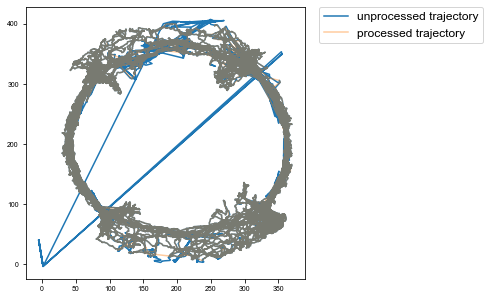

Number of open-to-closed crossings detected: 14
Number of closed-to-open crossings detected: 1
Number of lingerings in transition region detected: 81
Number of prolonged open to closed crossings detected: 25
Number of prolonged closed to open crossings detected: 37
Number of withdraws detected: 19
Number of nosedips detected: 110


In [3]:
events = traj_process(animal[session], behavior='ezm', start_time=0, duration=15)
# # events = pickle.load(open('D:\\ephys\\2021-02-19_mBWfus009_EZM_ephys\ephys_processed\\2021-02-19_mBWfus009_EZM_ephys_results_manually_annotated.pickle',
# #                           "rb"))
f_behavior = 50
f_ephys = 500
behavior_window_duration = 900
ephys_window_duration = 1000
#
# ### extract overall behavioral open/close frame indices
open_idx = [i for i, el in enumerate(
    events['rois_stats']['roi_at_each_frame'][
    int(f_behavior * behavior_trigger):int(f_behavior * behavior_trigger) + f_behavior * behavior_window_duration])
            if
            el == 'open']
close_idx = [i for i, el in enumerate(
    events['rois_stats']['roi_at_each_frame'][
    int(f_behavior * behavior_trigger):int(f_behavior * behavior_trigger) + f_behavior * behavior_window_duration])
             if
             el == 'closed']
open_to_close_idx = np.array(events['transitions']['open_closed_exittime']) - int(f_behavior * behavior_trigger)
prolonged_close_to_open_idx = np.array(events['transitions']['prolonged_open_closed_exittime']) - int(
    f_behavior * behavior_trigger)
prolonged_open_to_close_idx = np.array(events['transitions']['prolonged_closed_open_exittime']) - int(
    f_behavior * behavior_trigger)

In [4]:
dataset = ephys.load_data(animal[session])

2021-02-19_mBWfus009_EZM_ephys


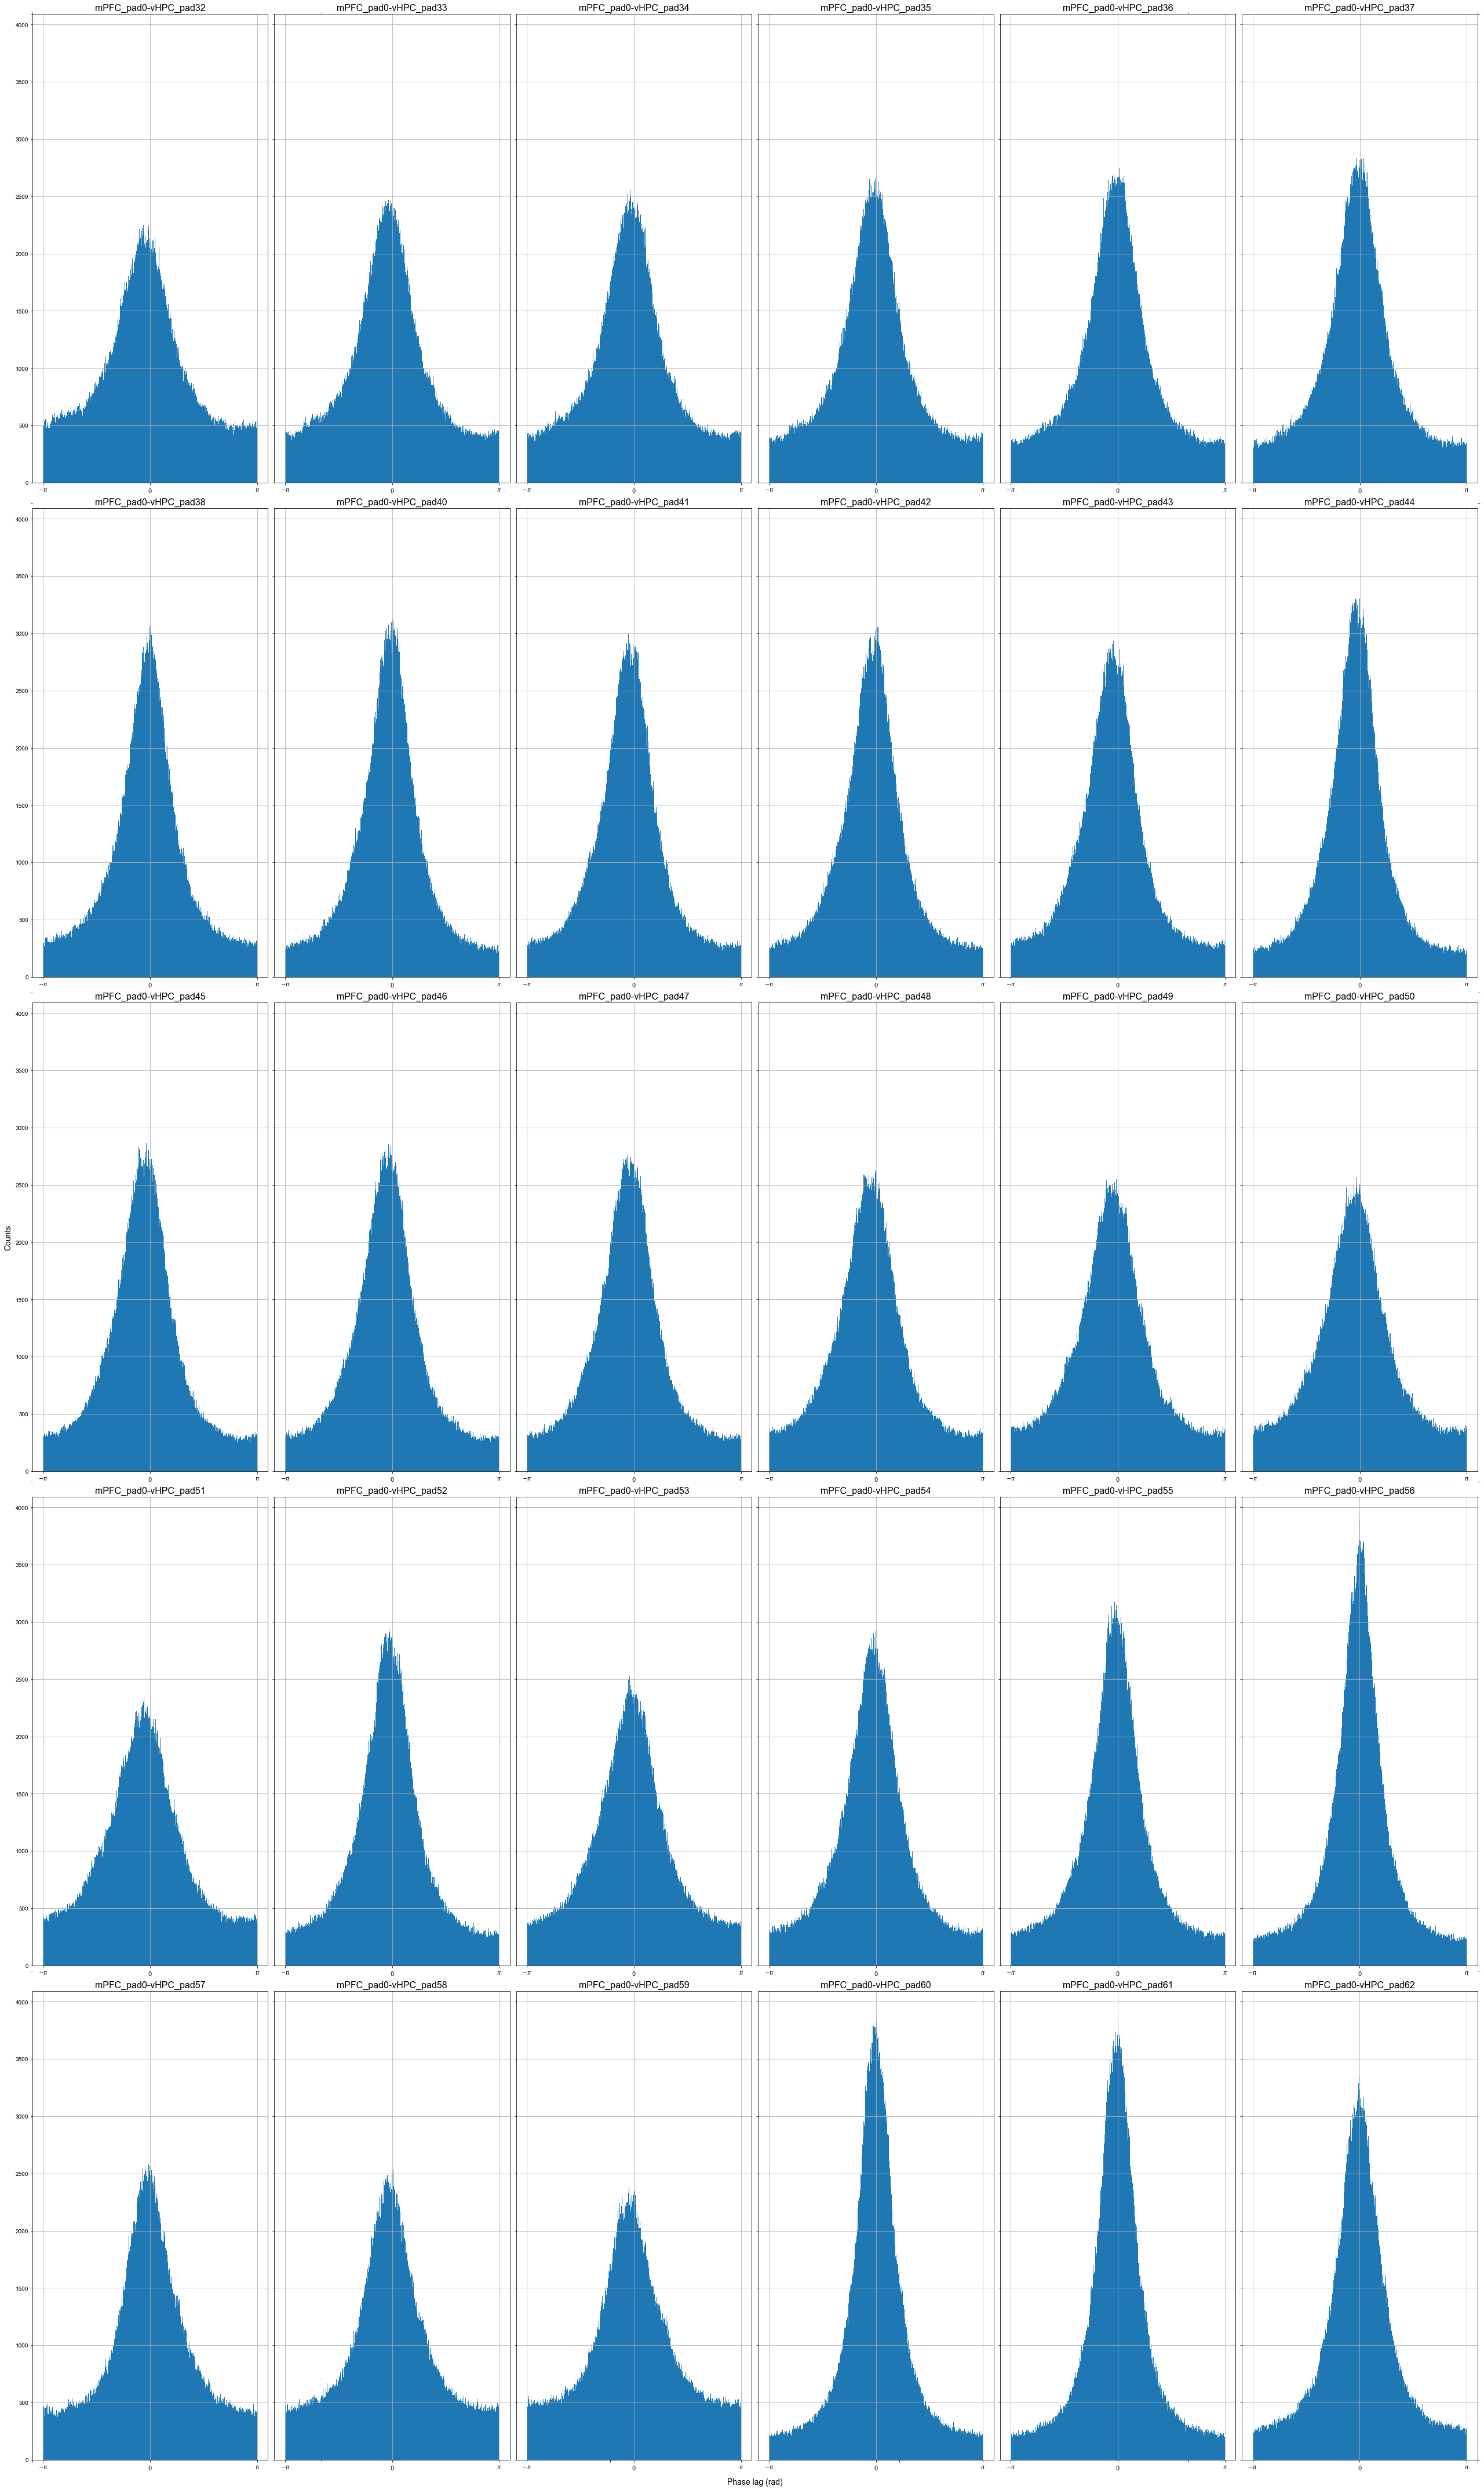

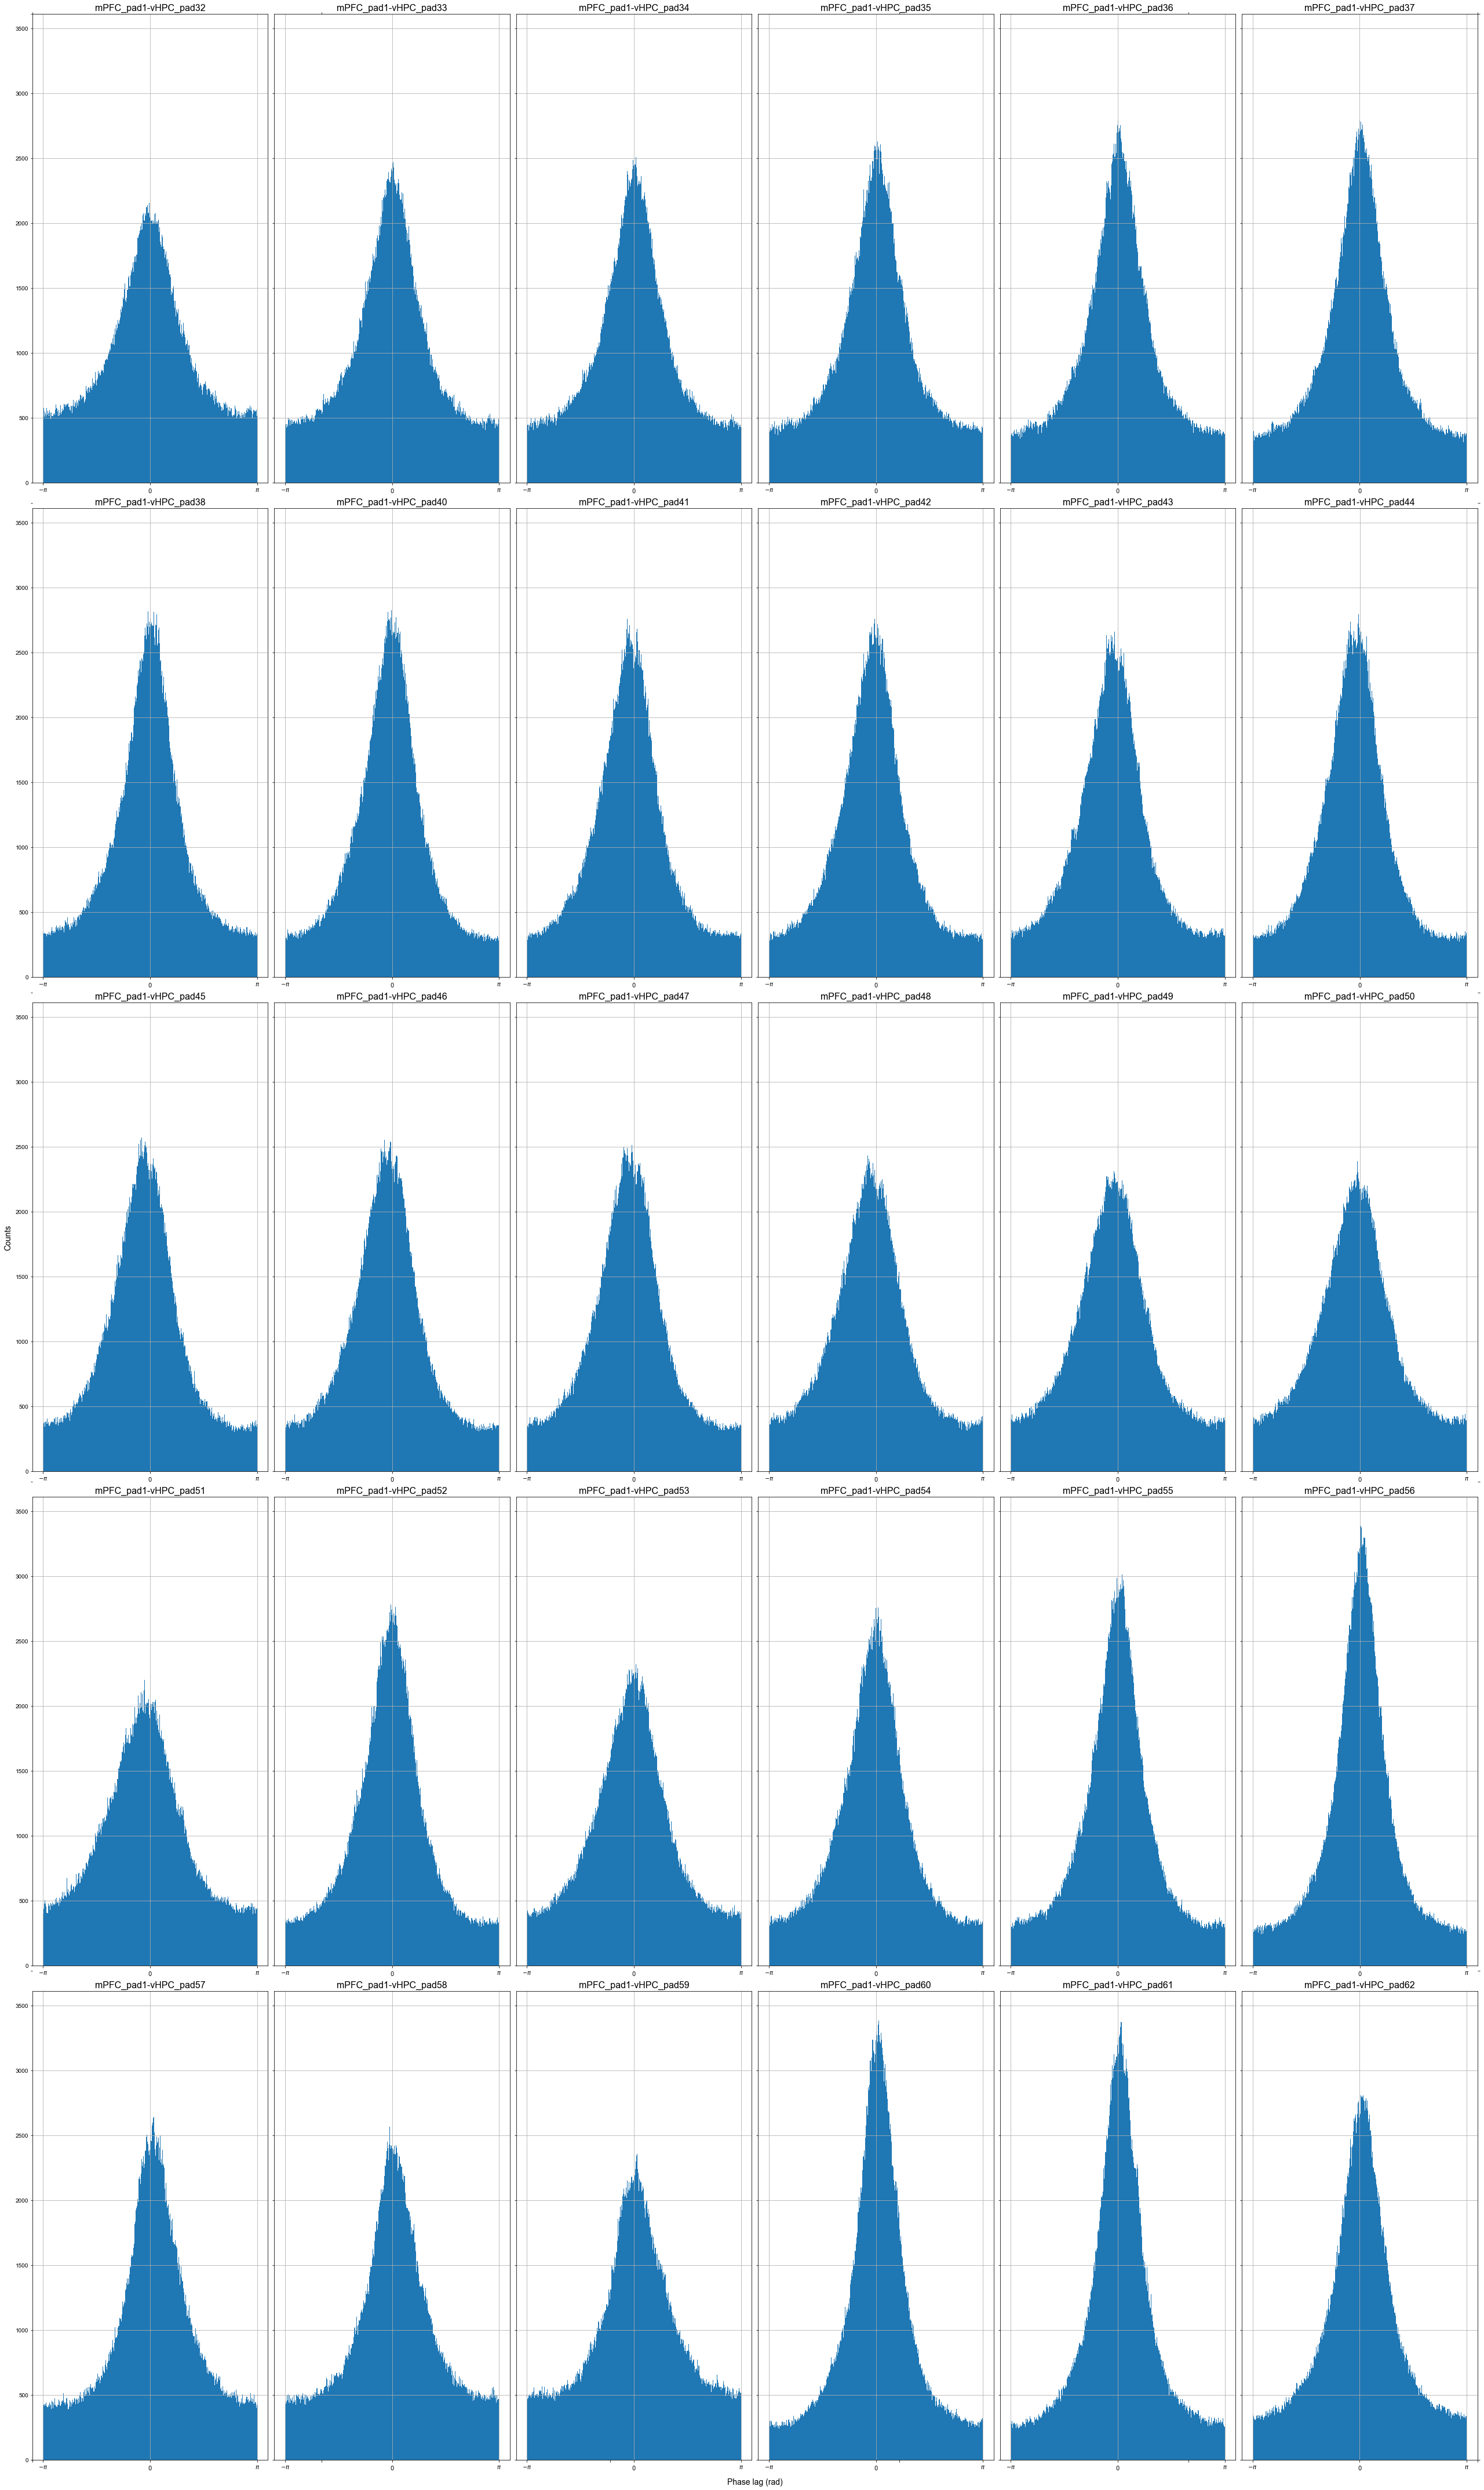

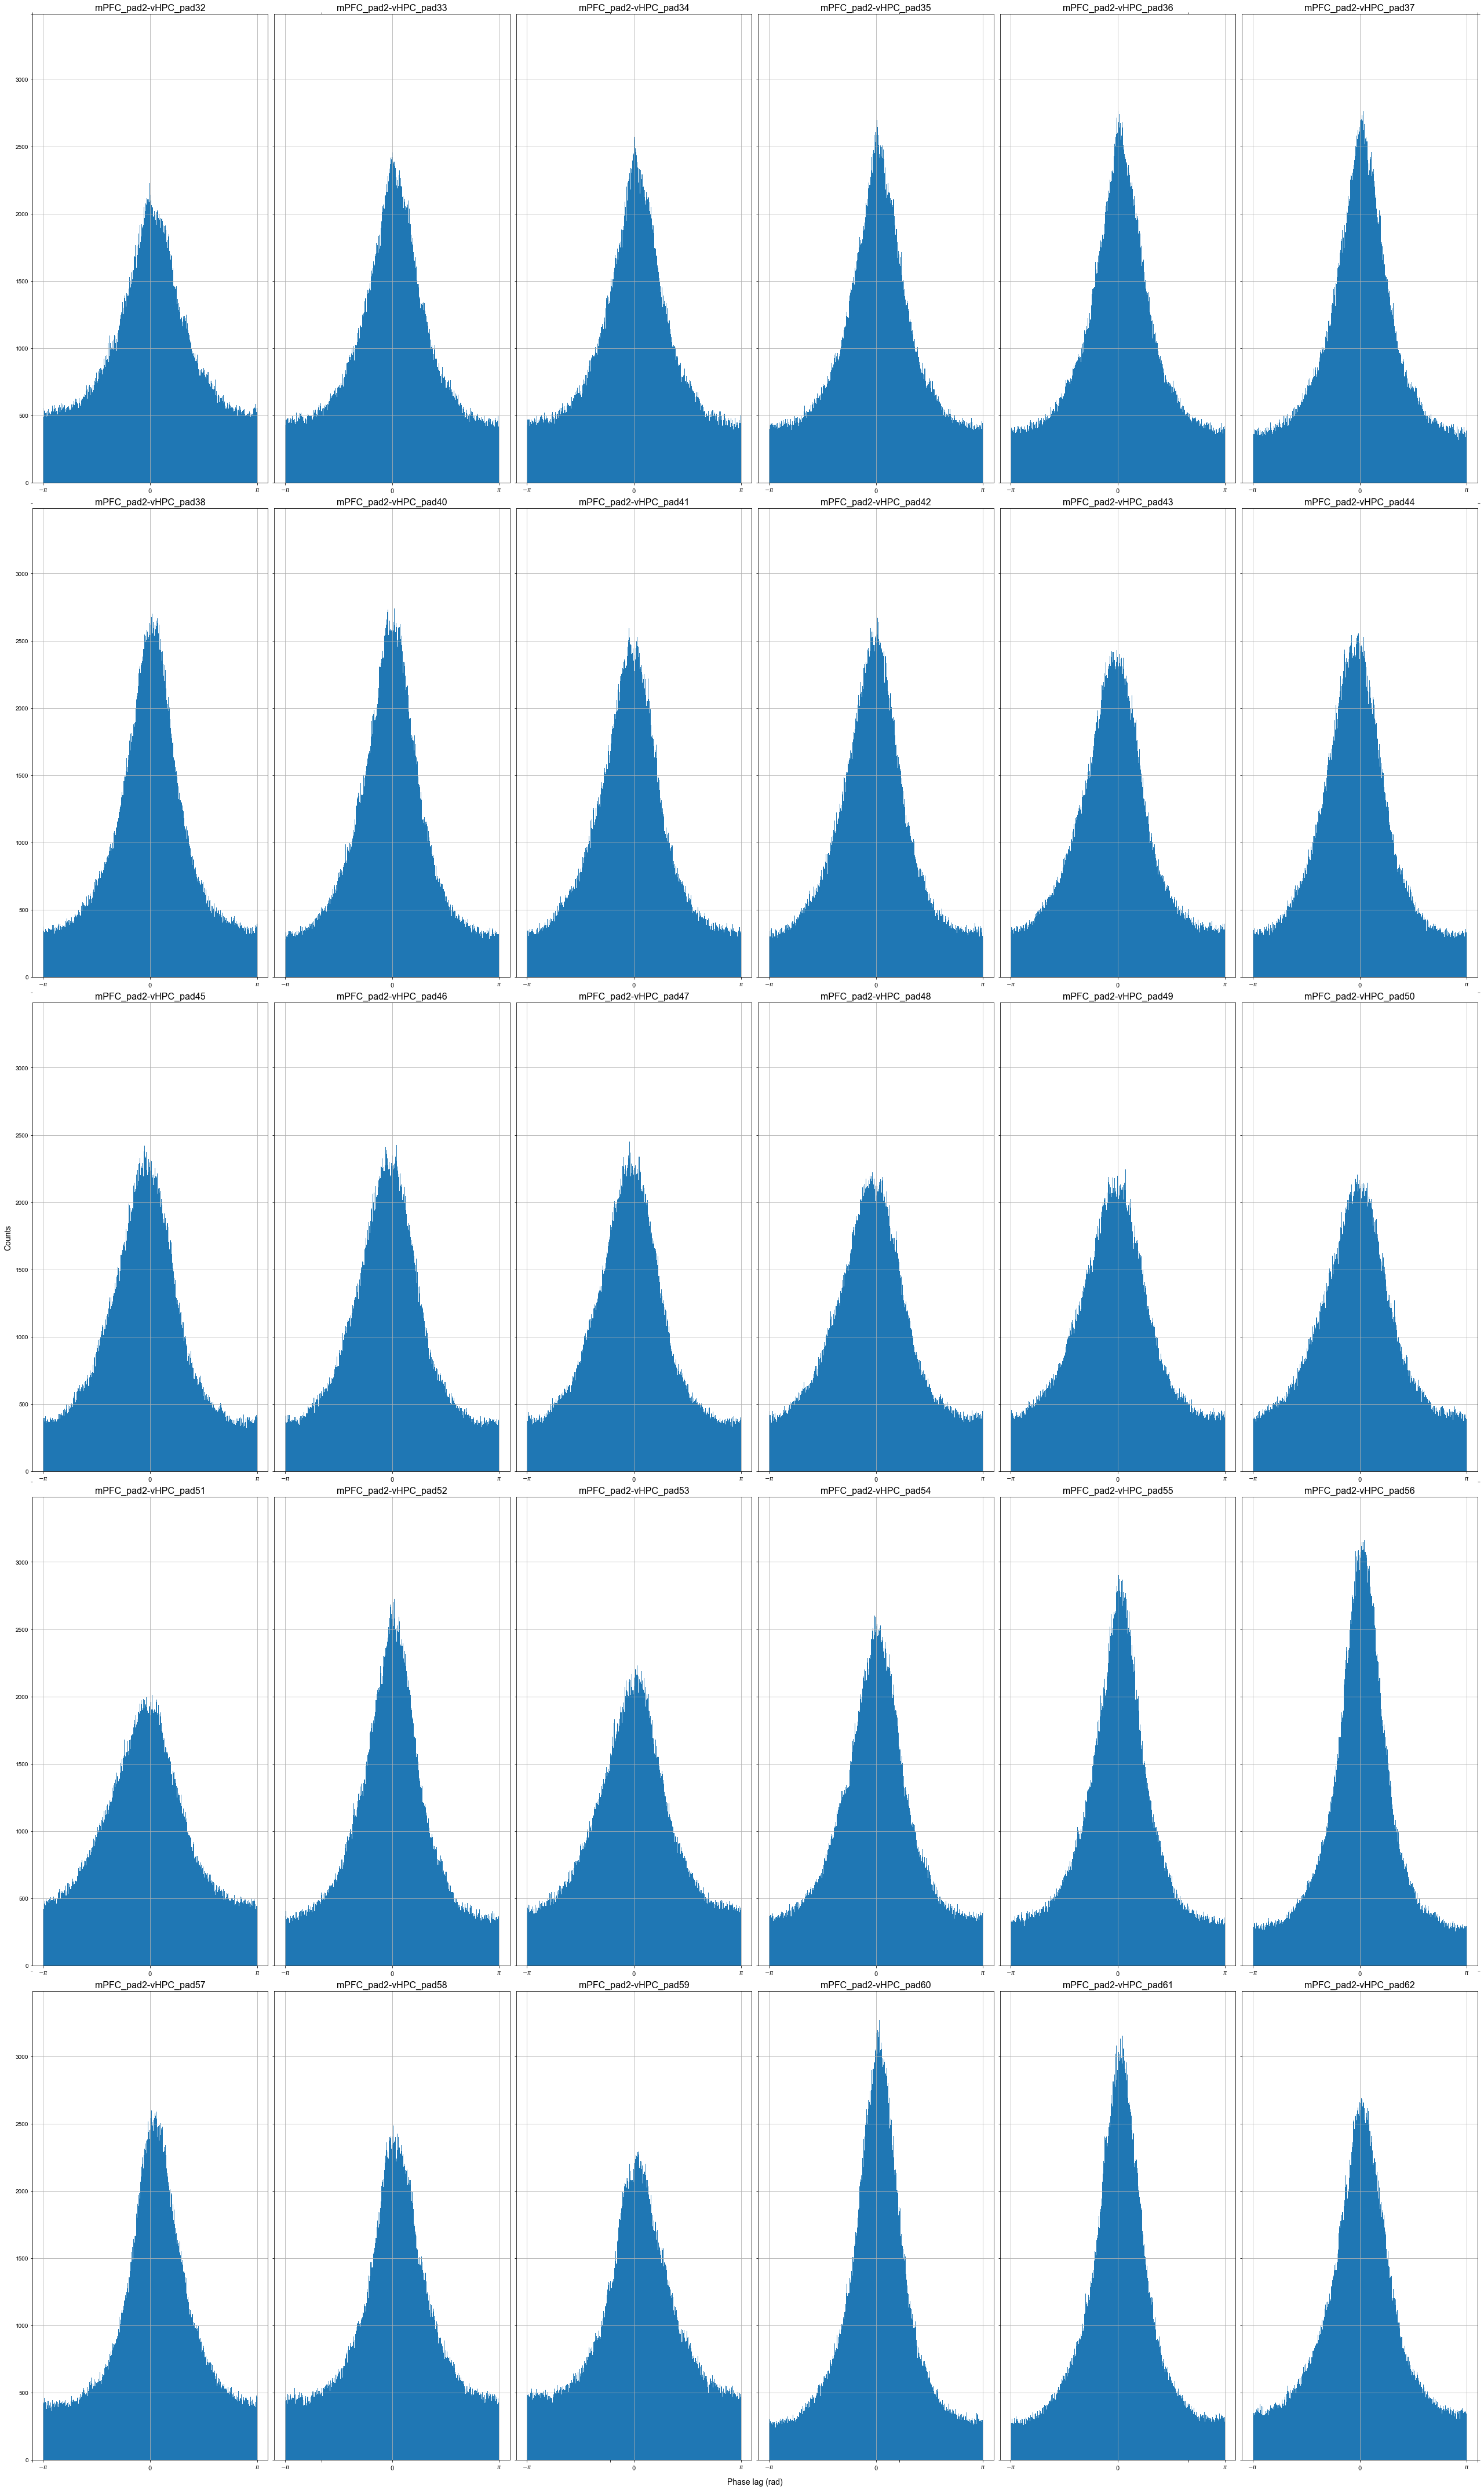

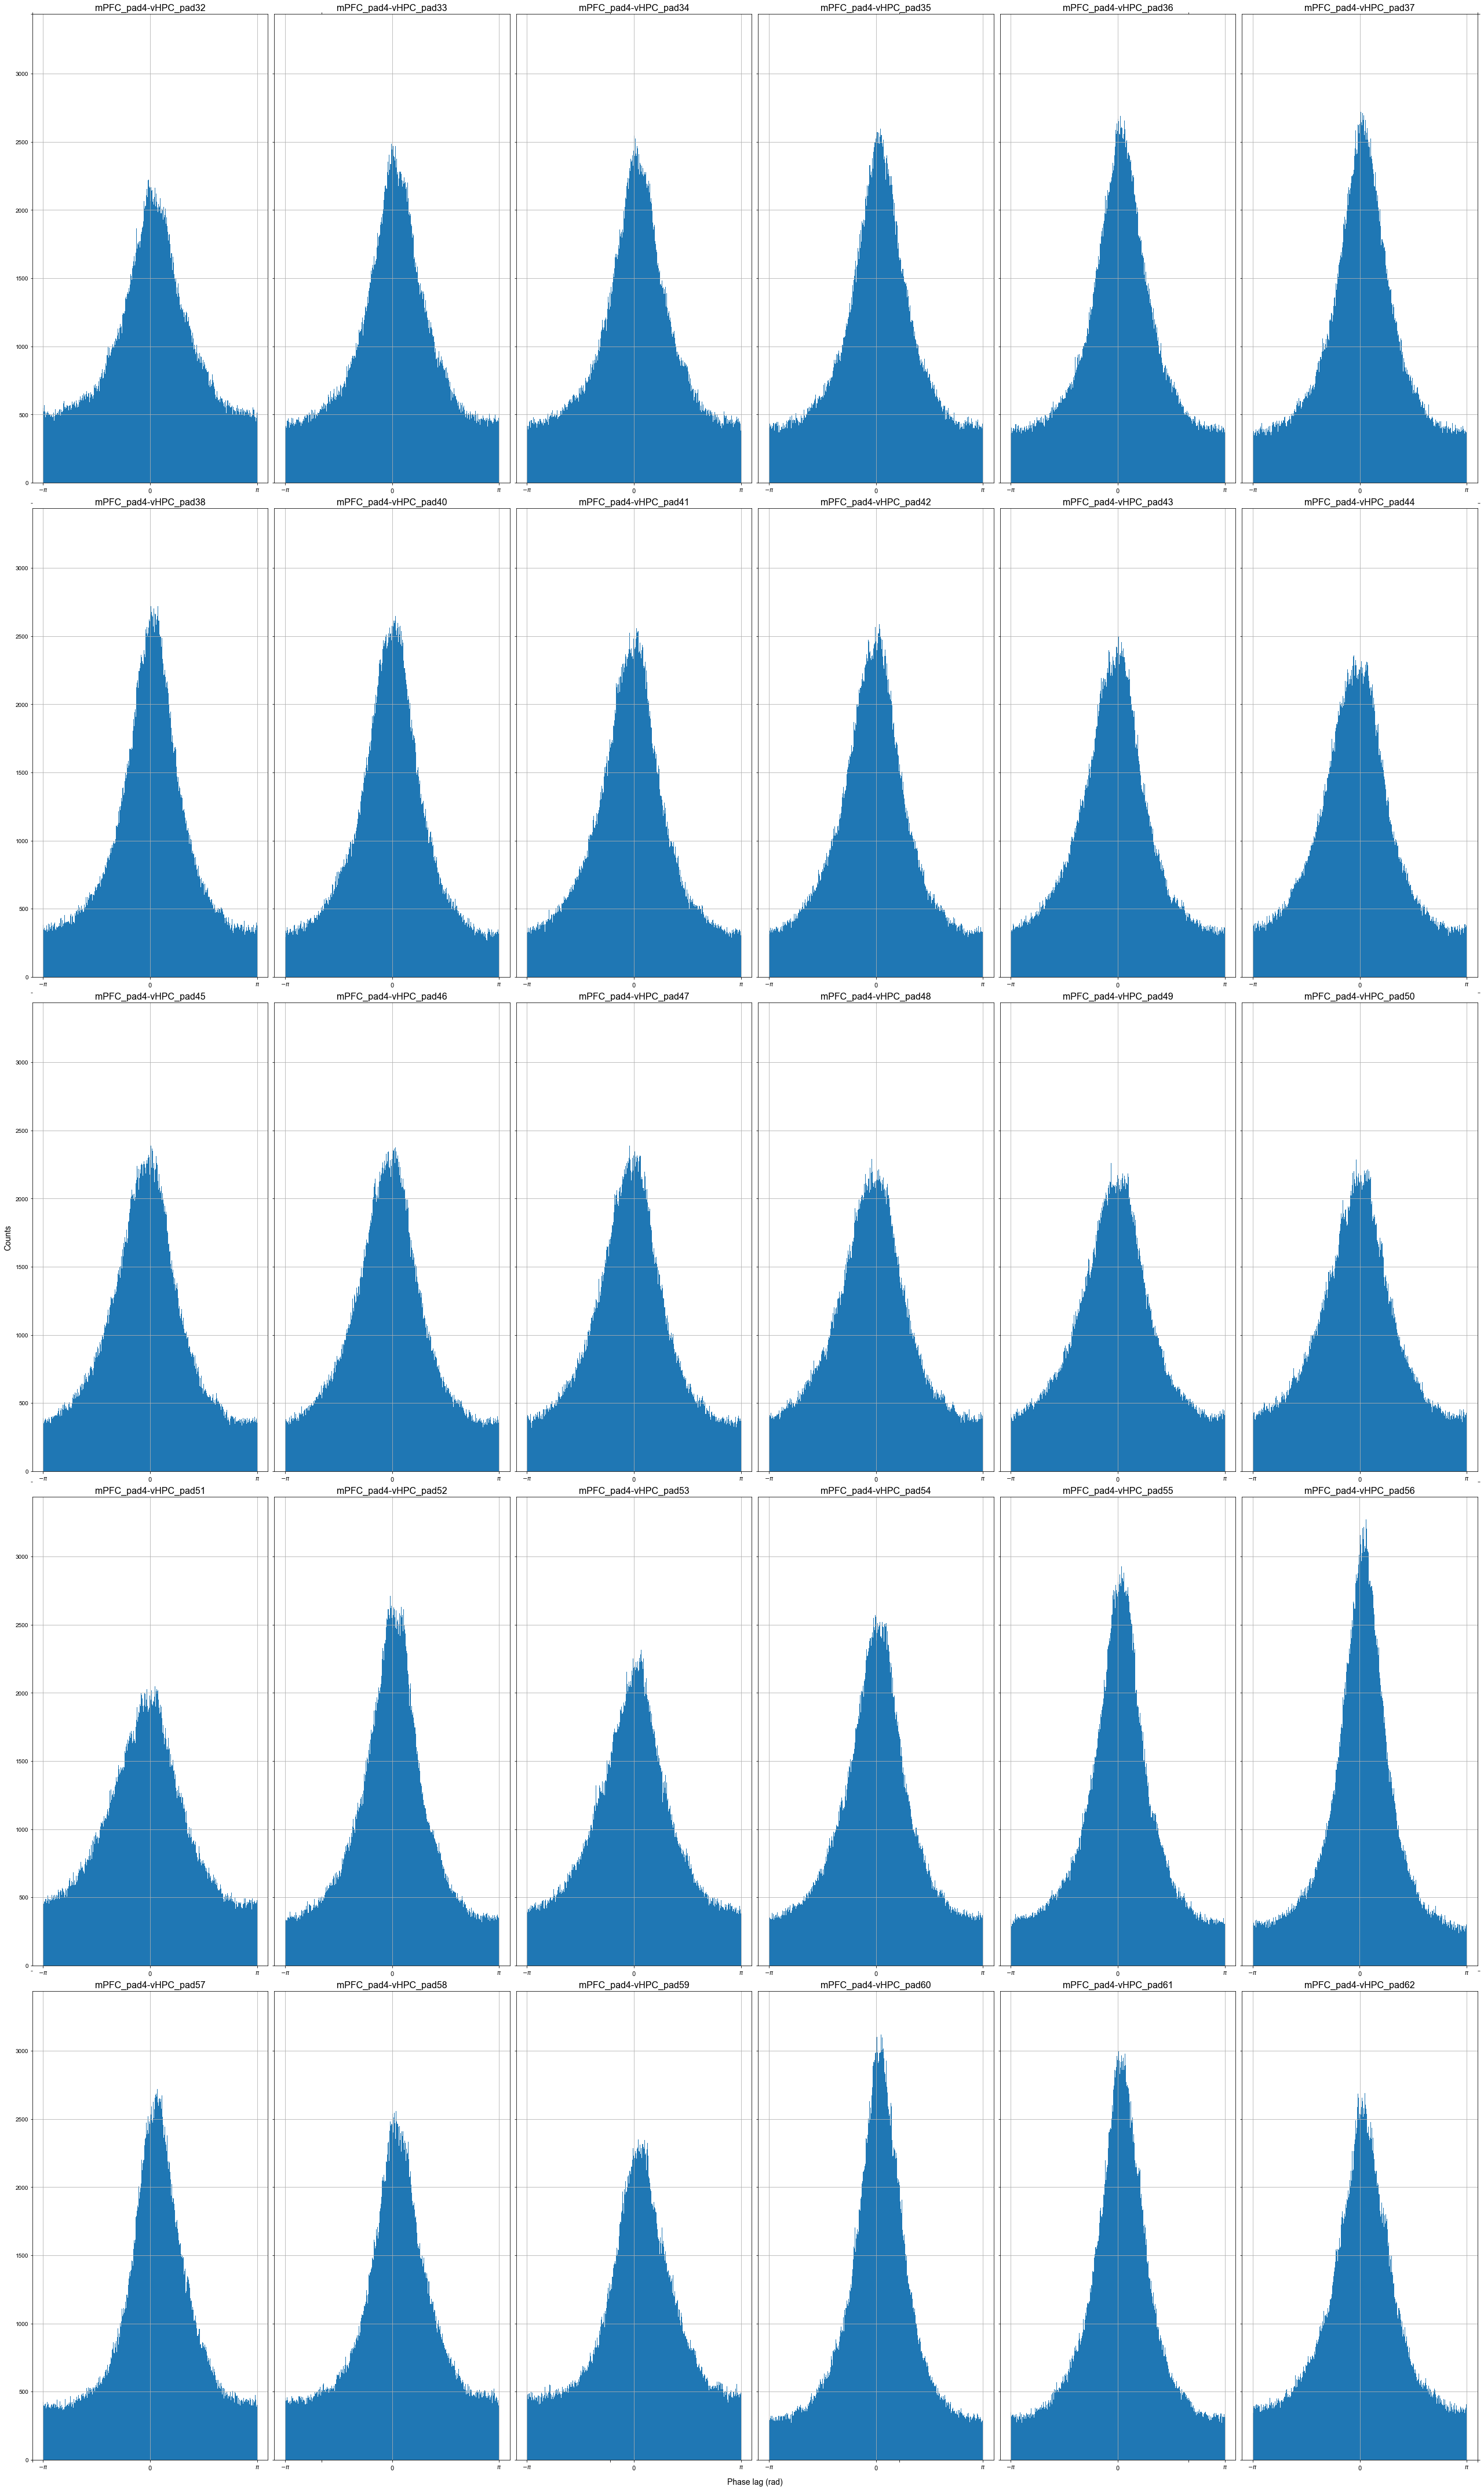

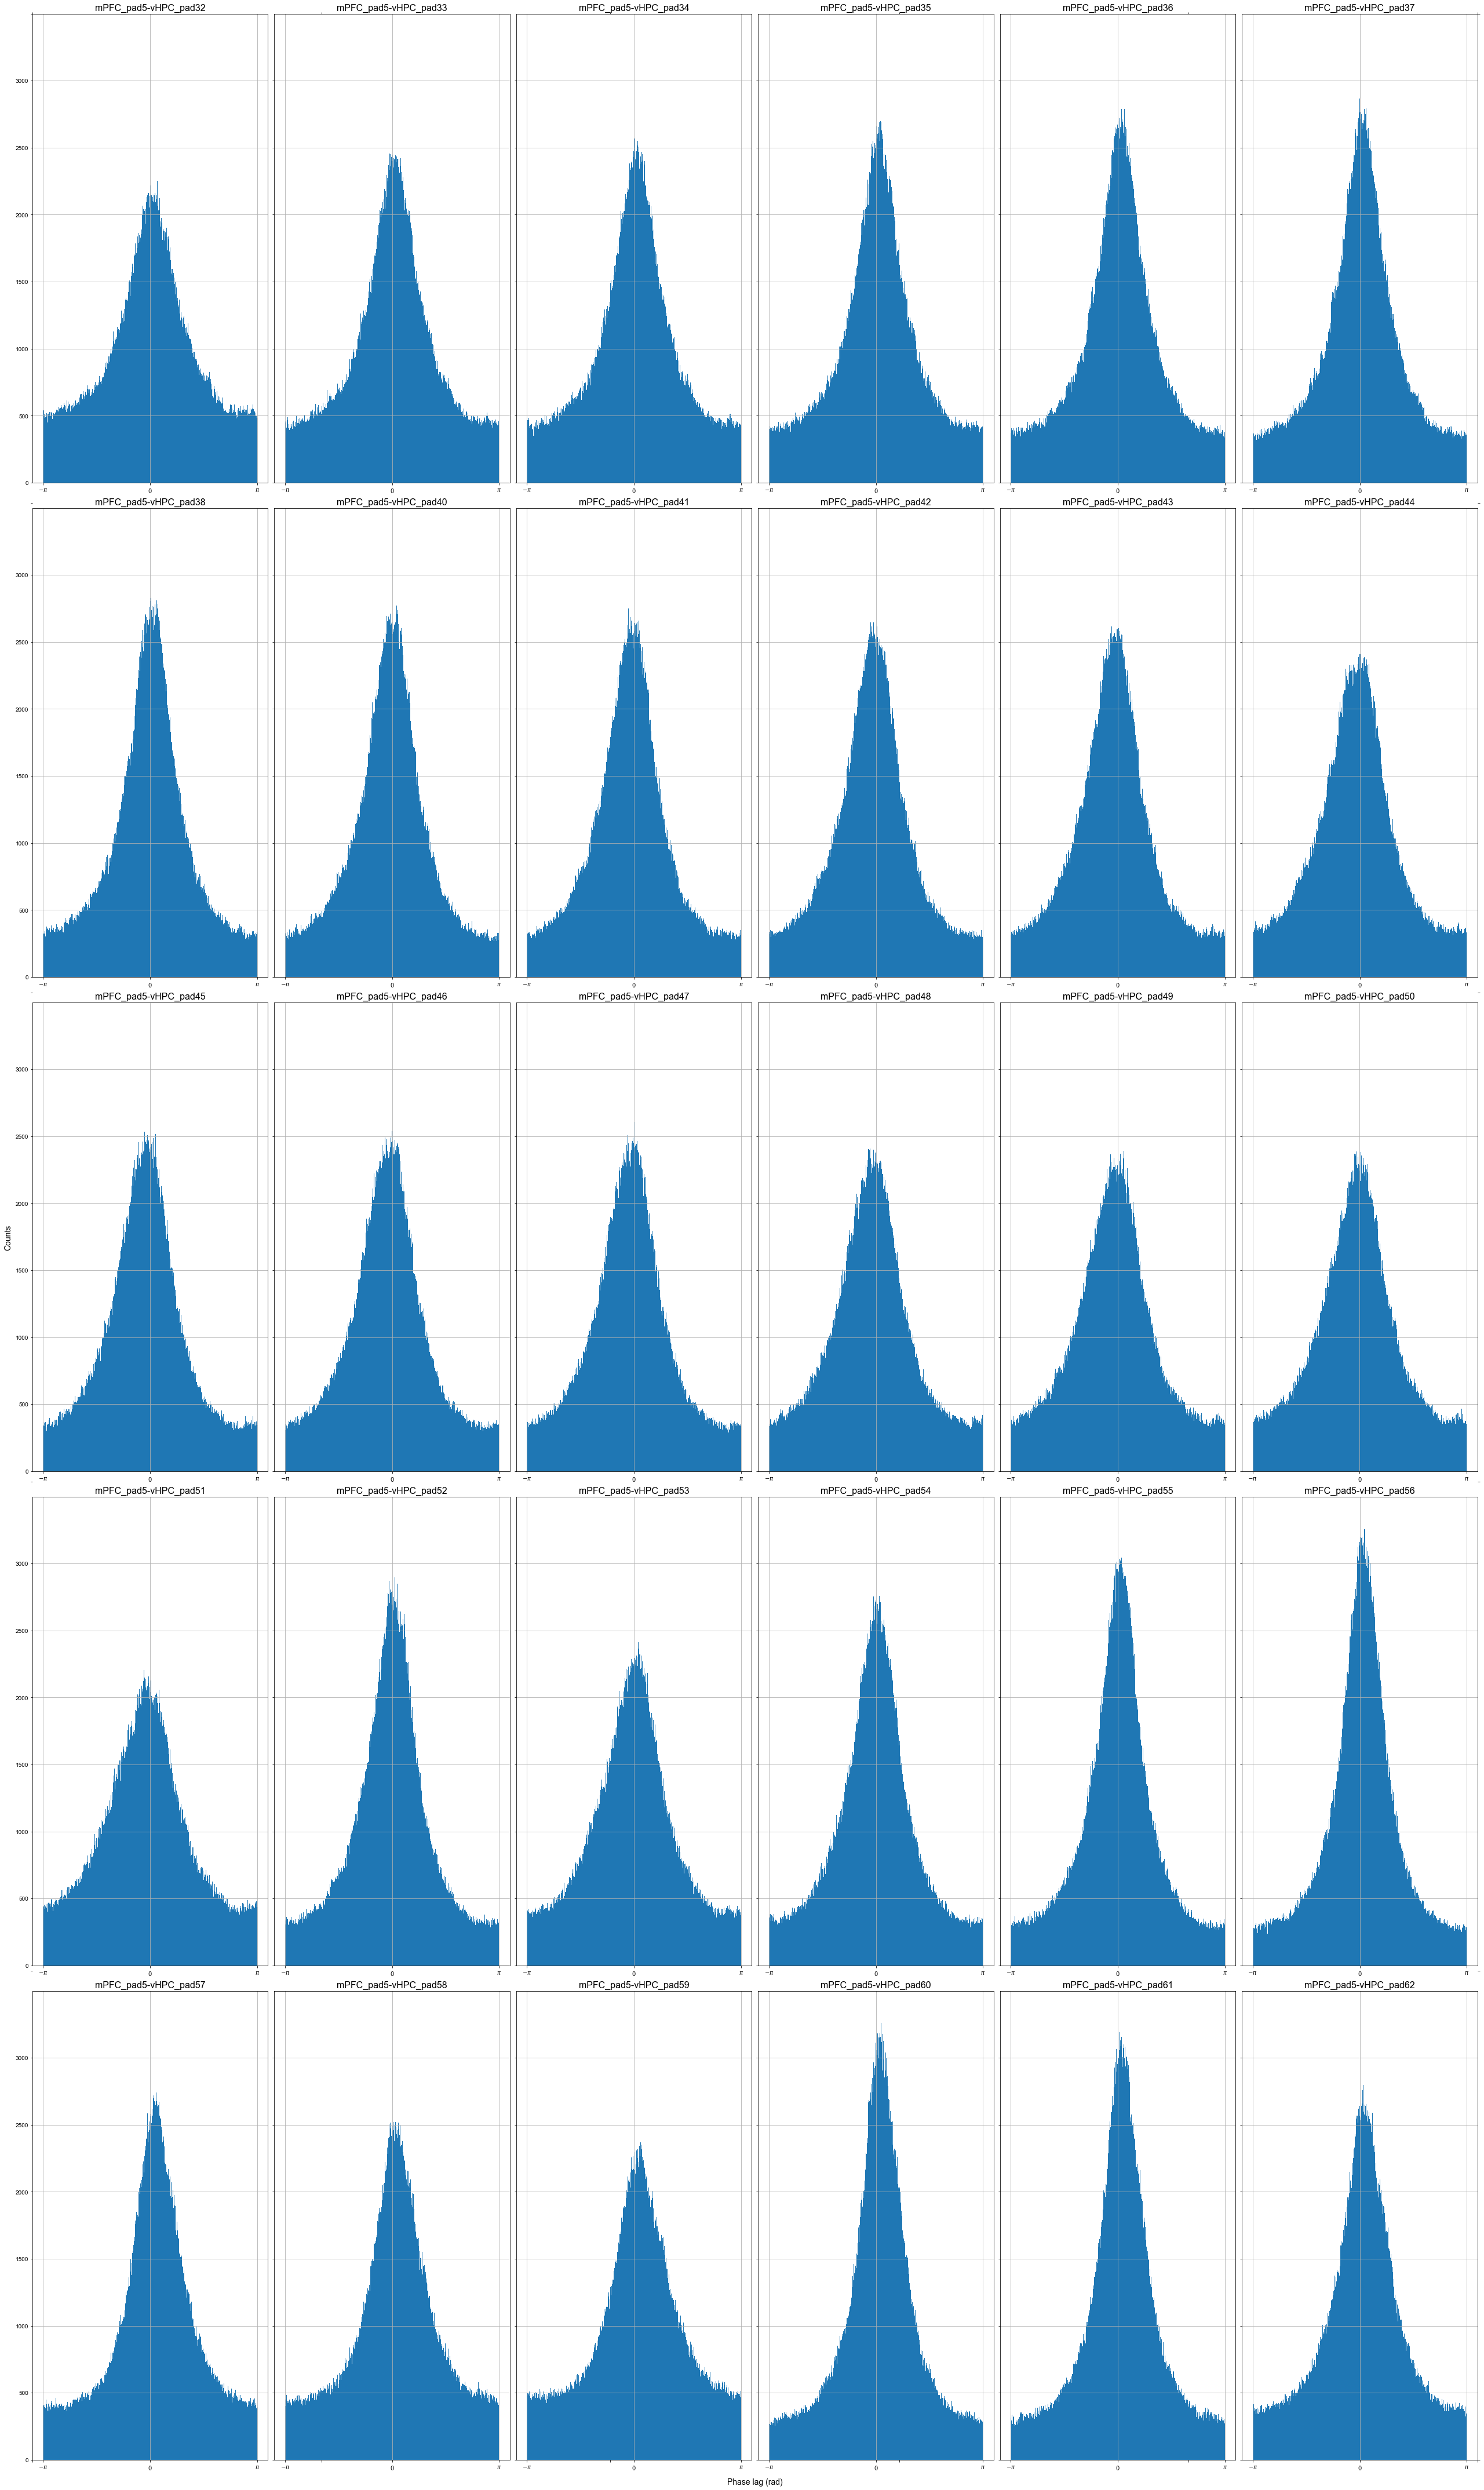

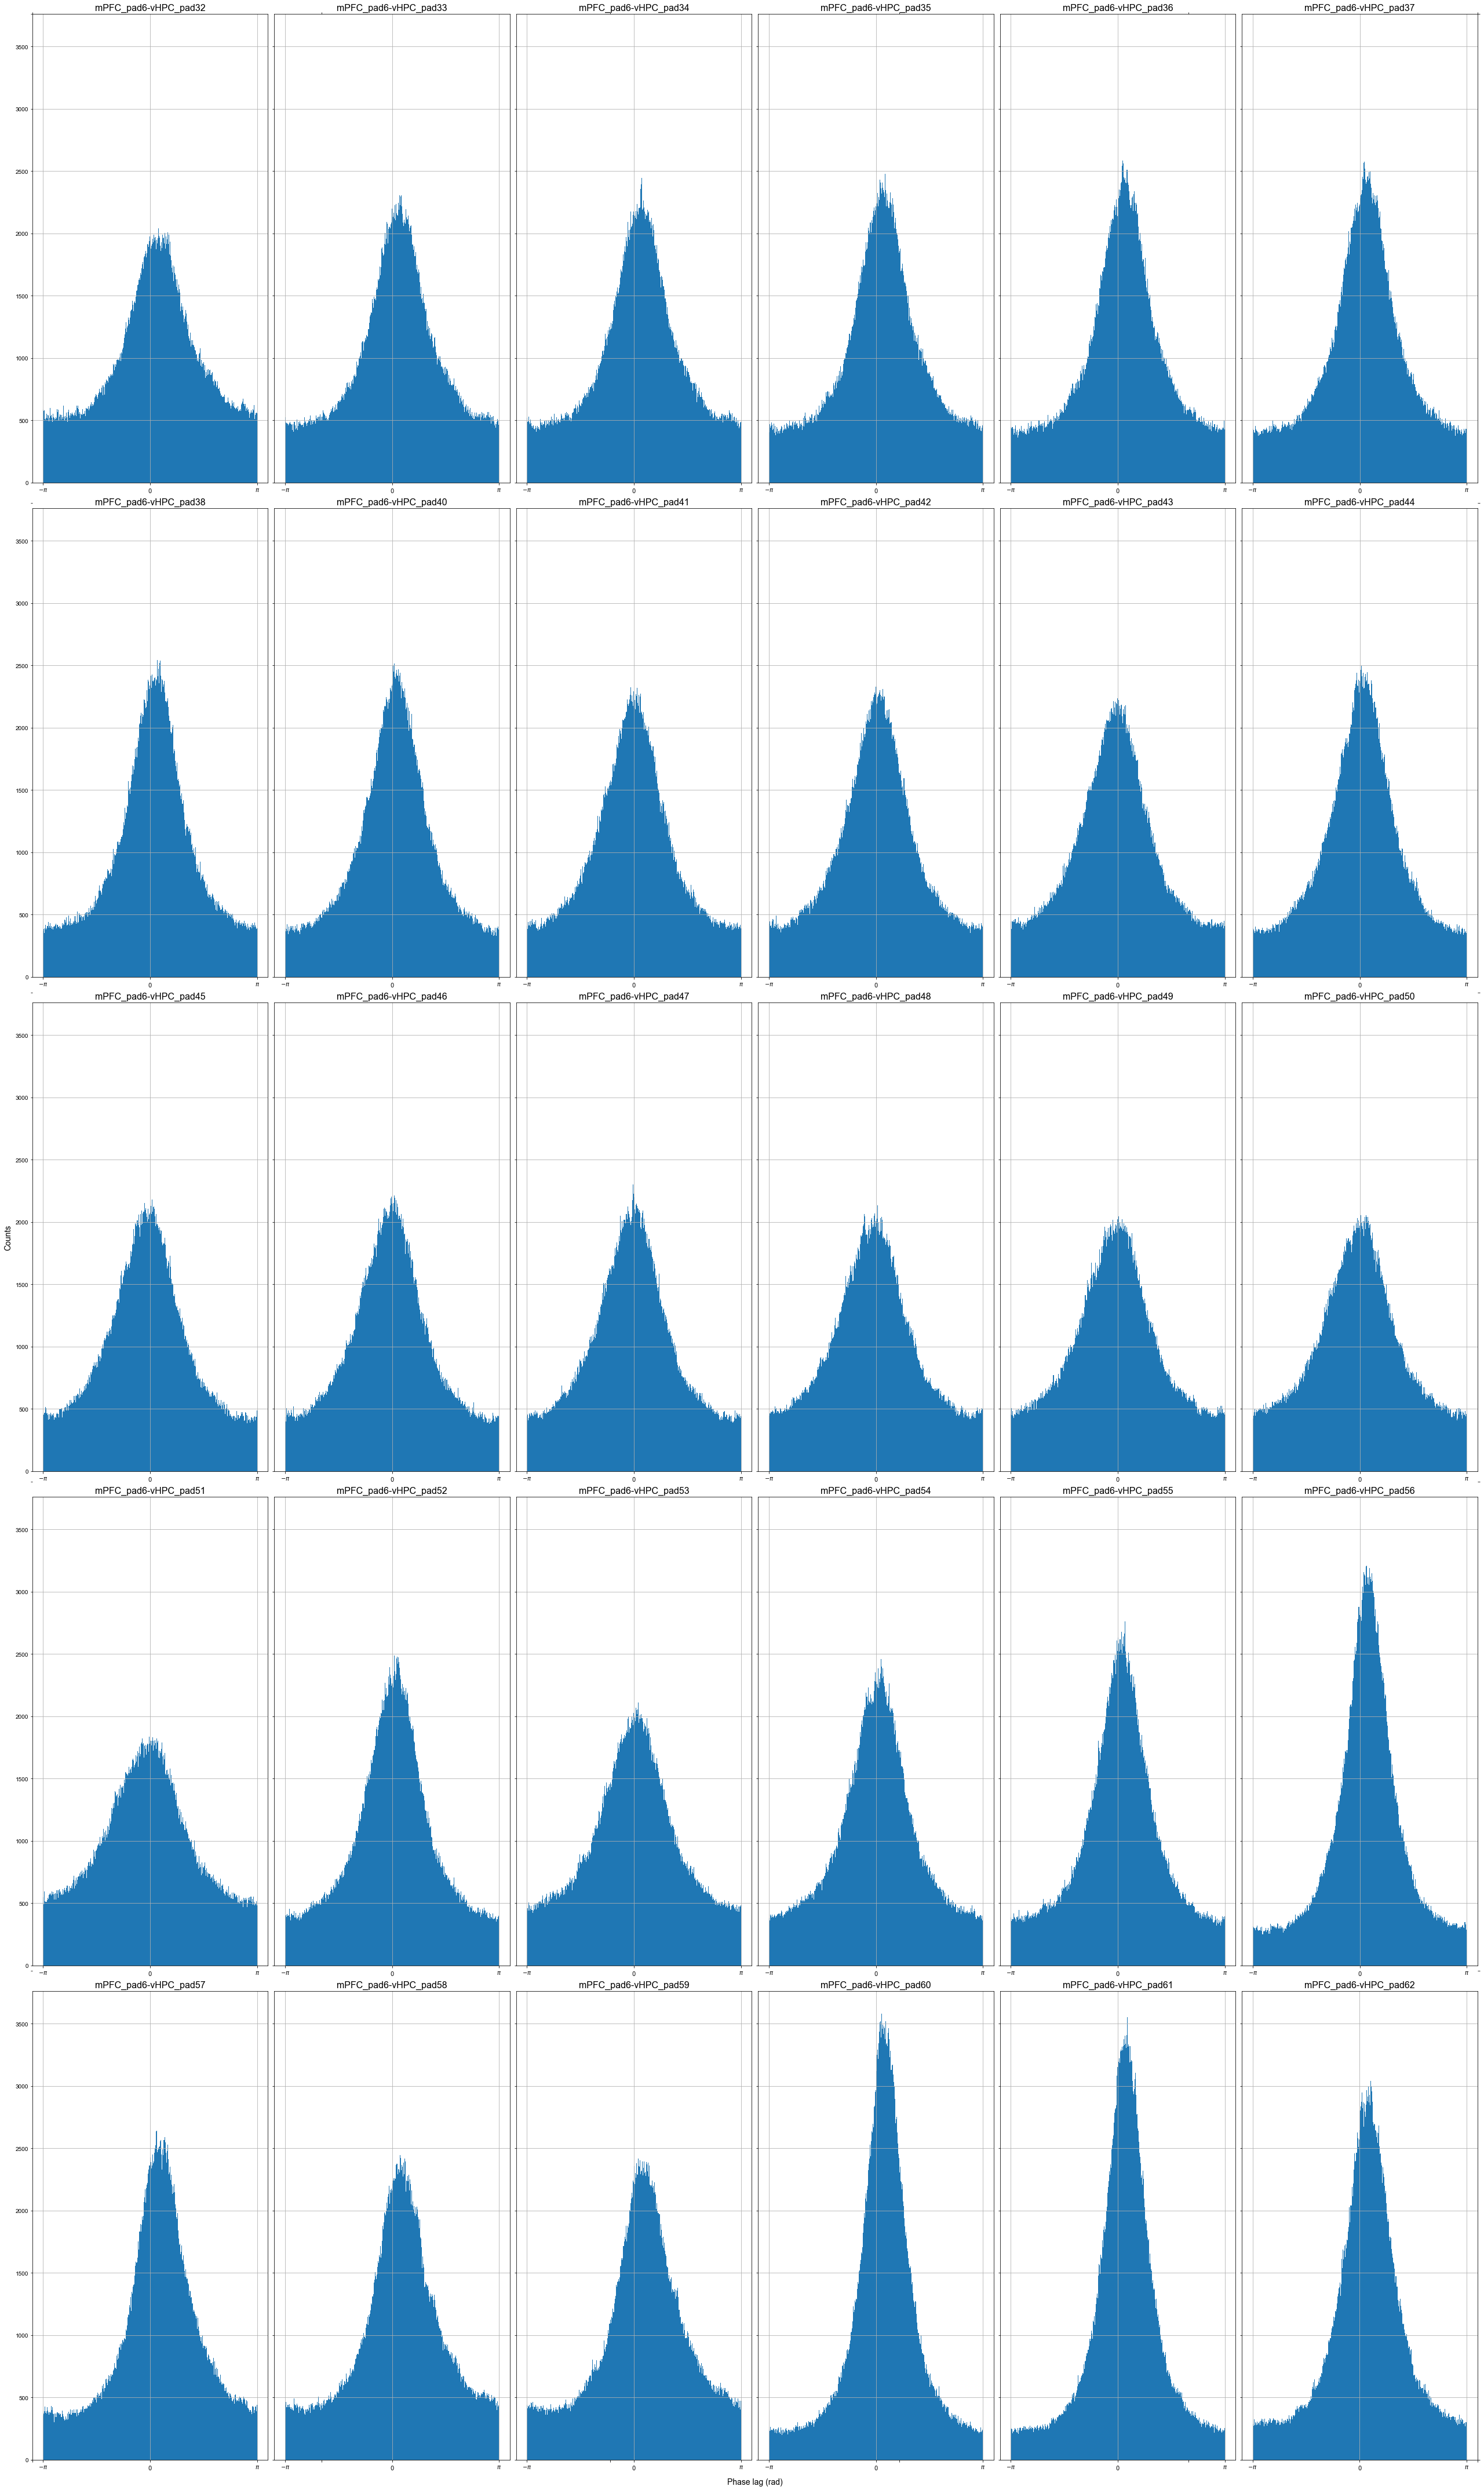

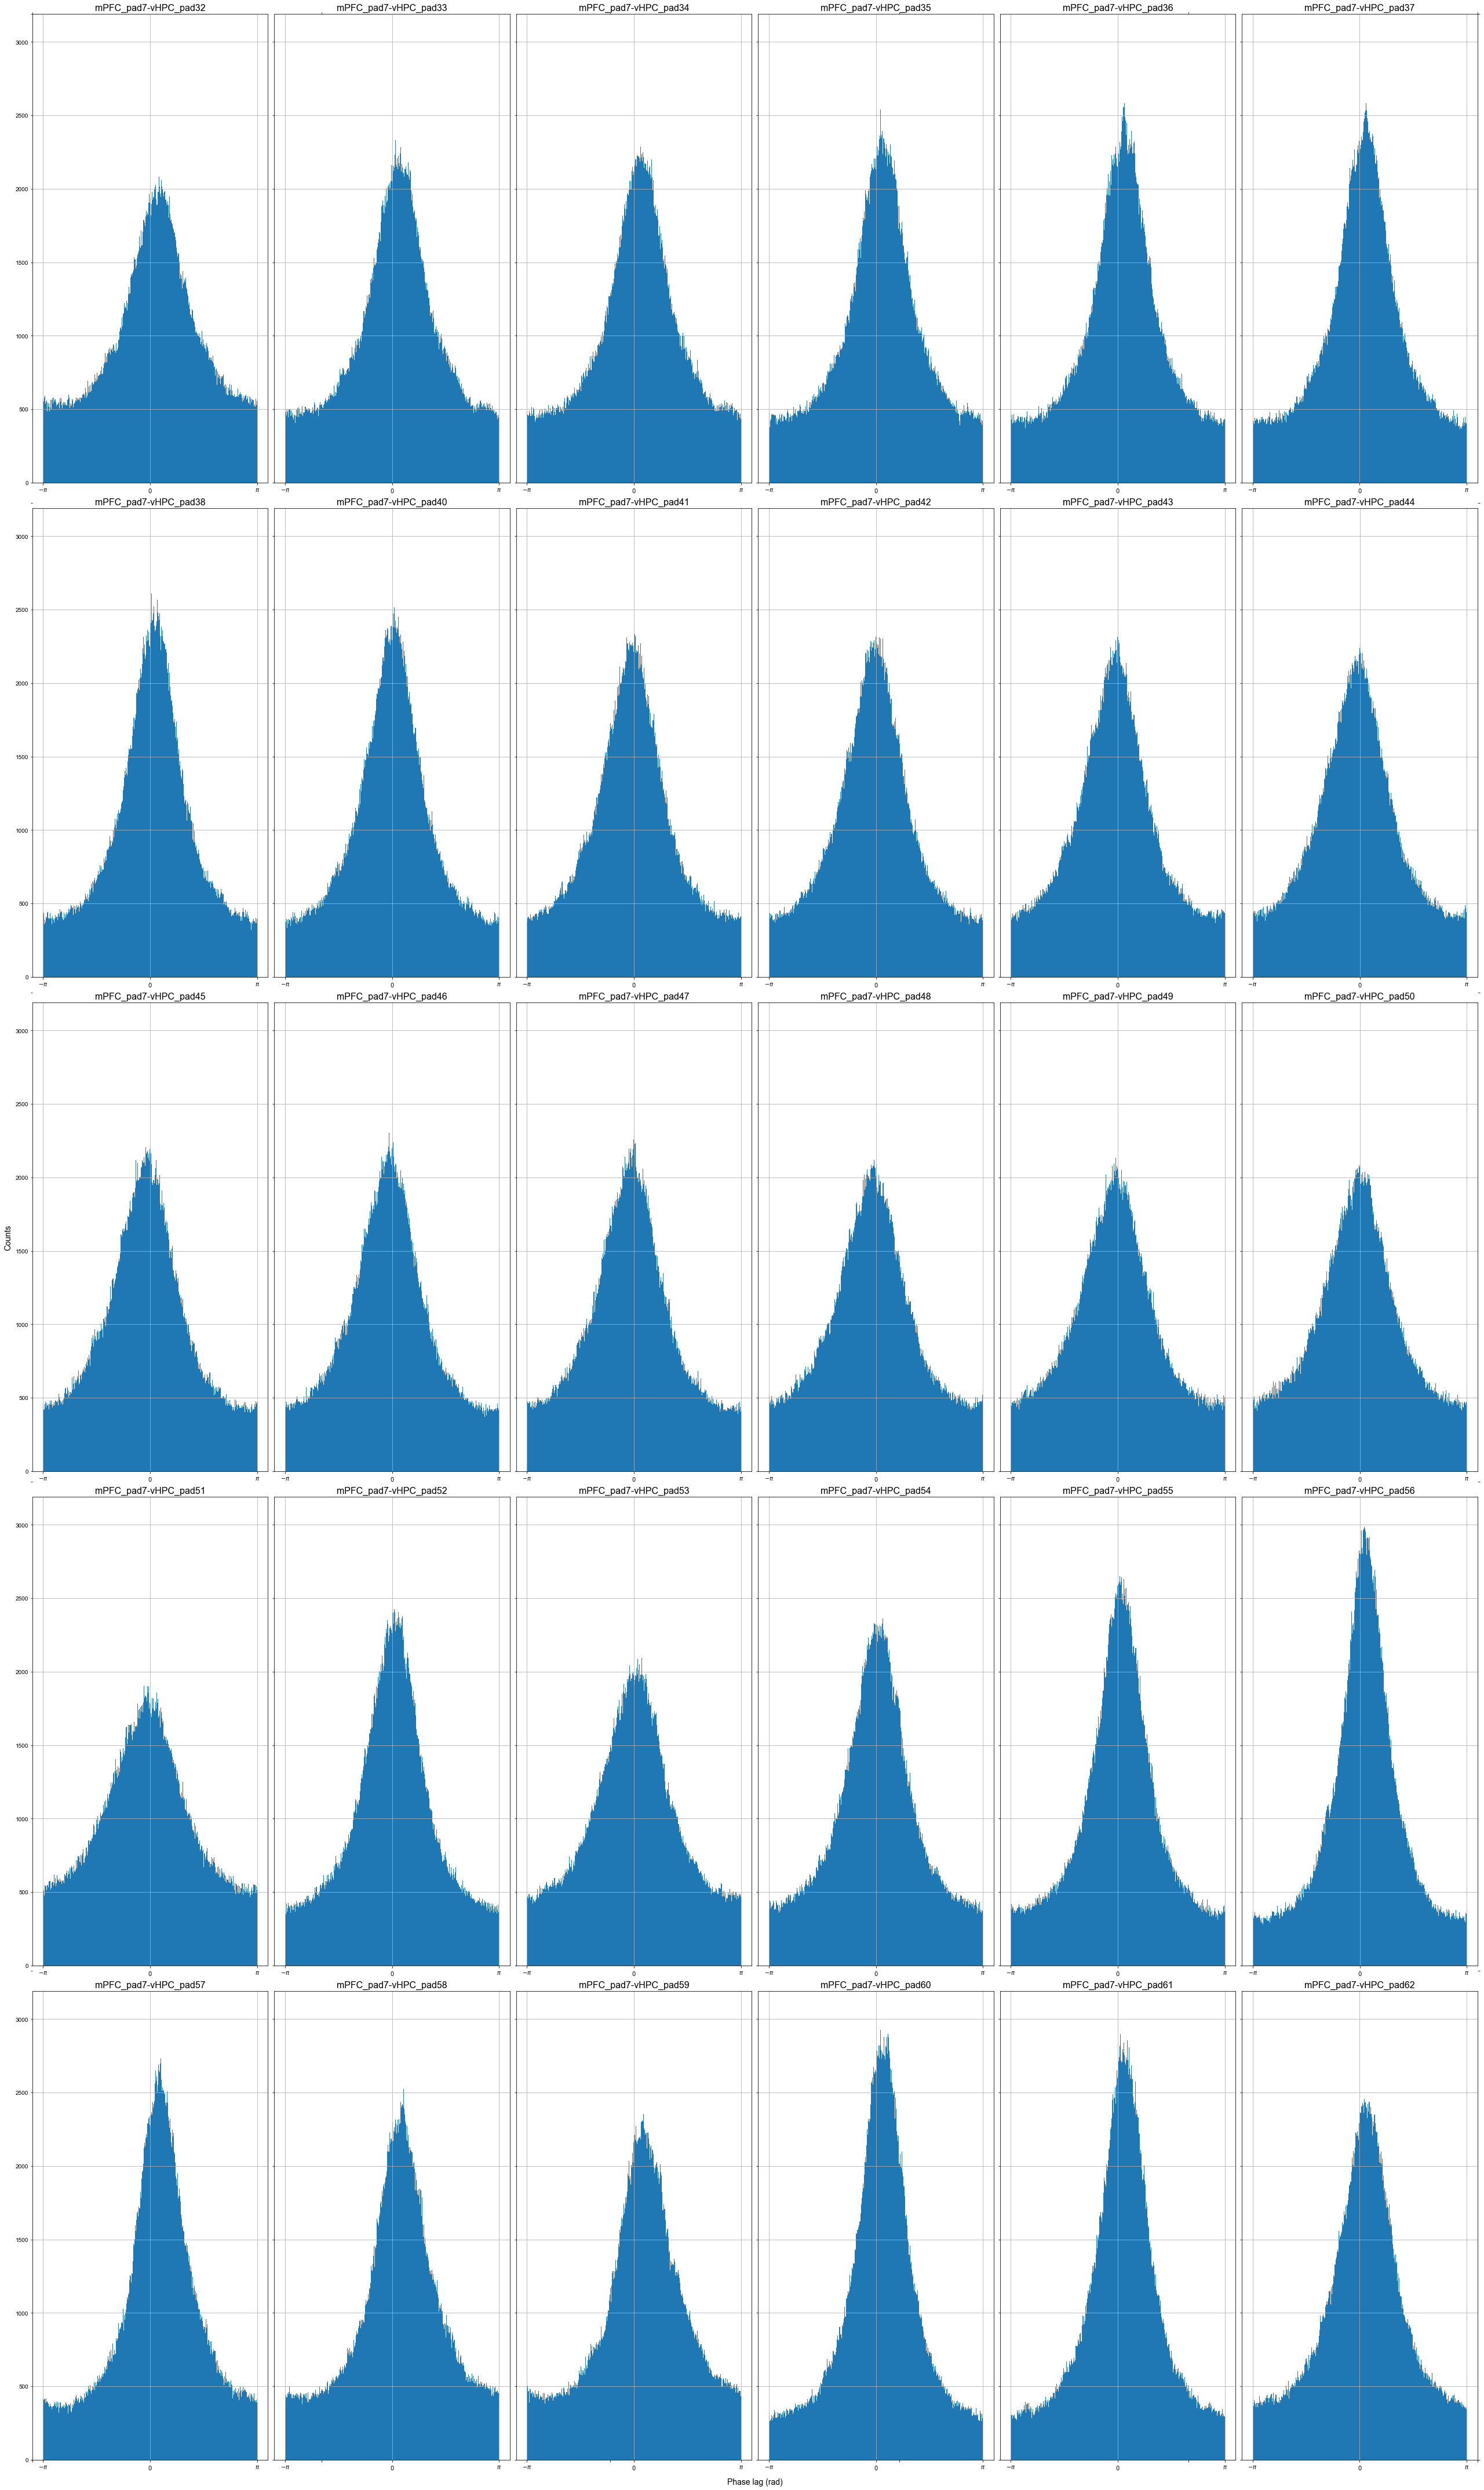

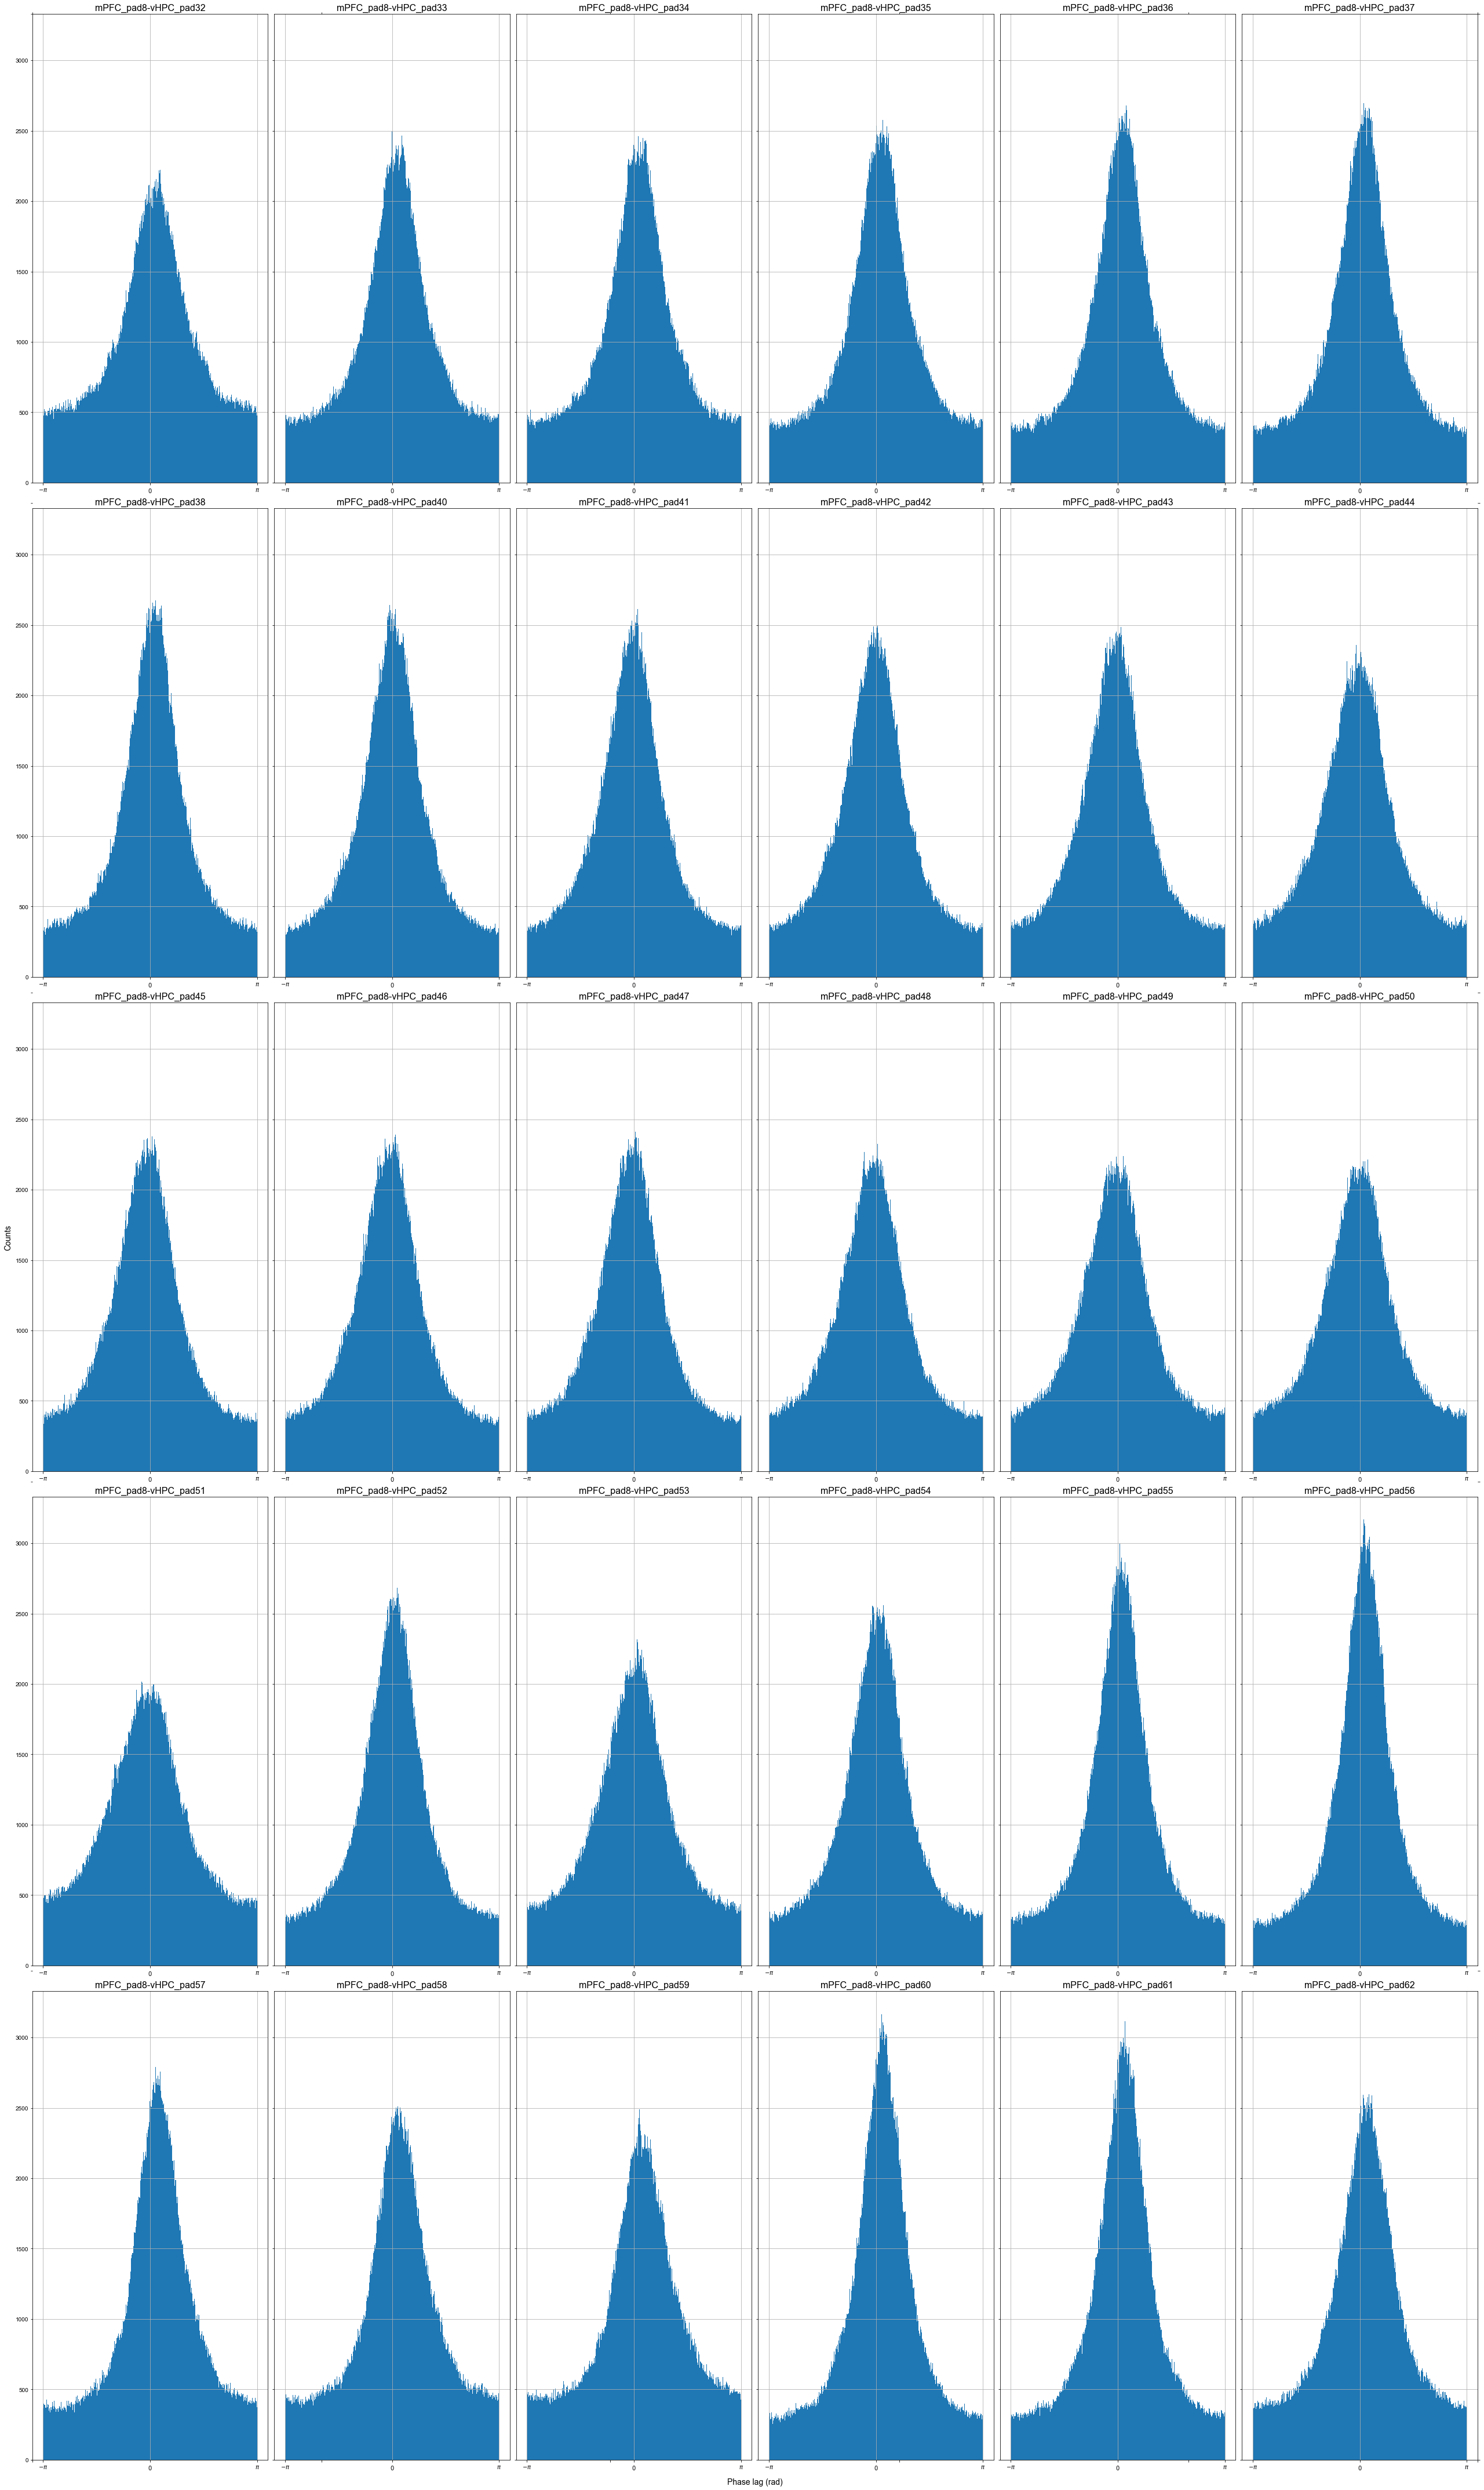

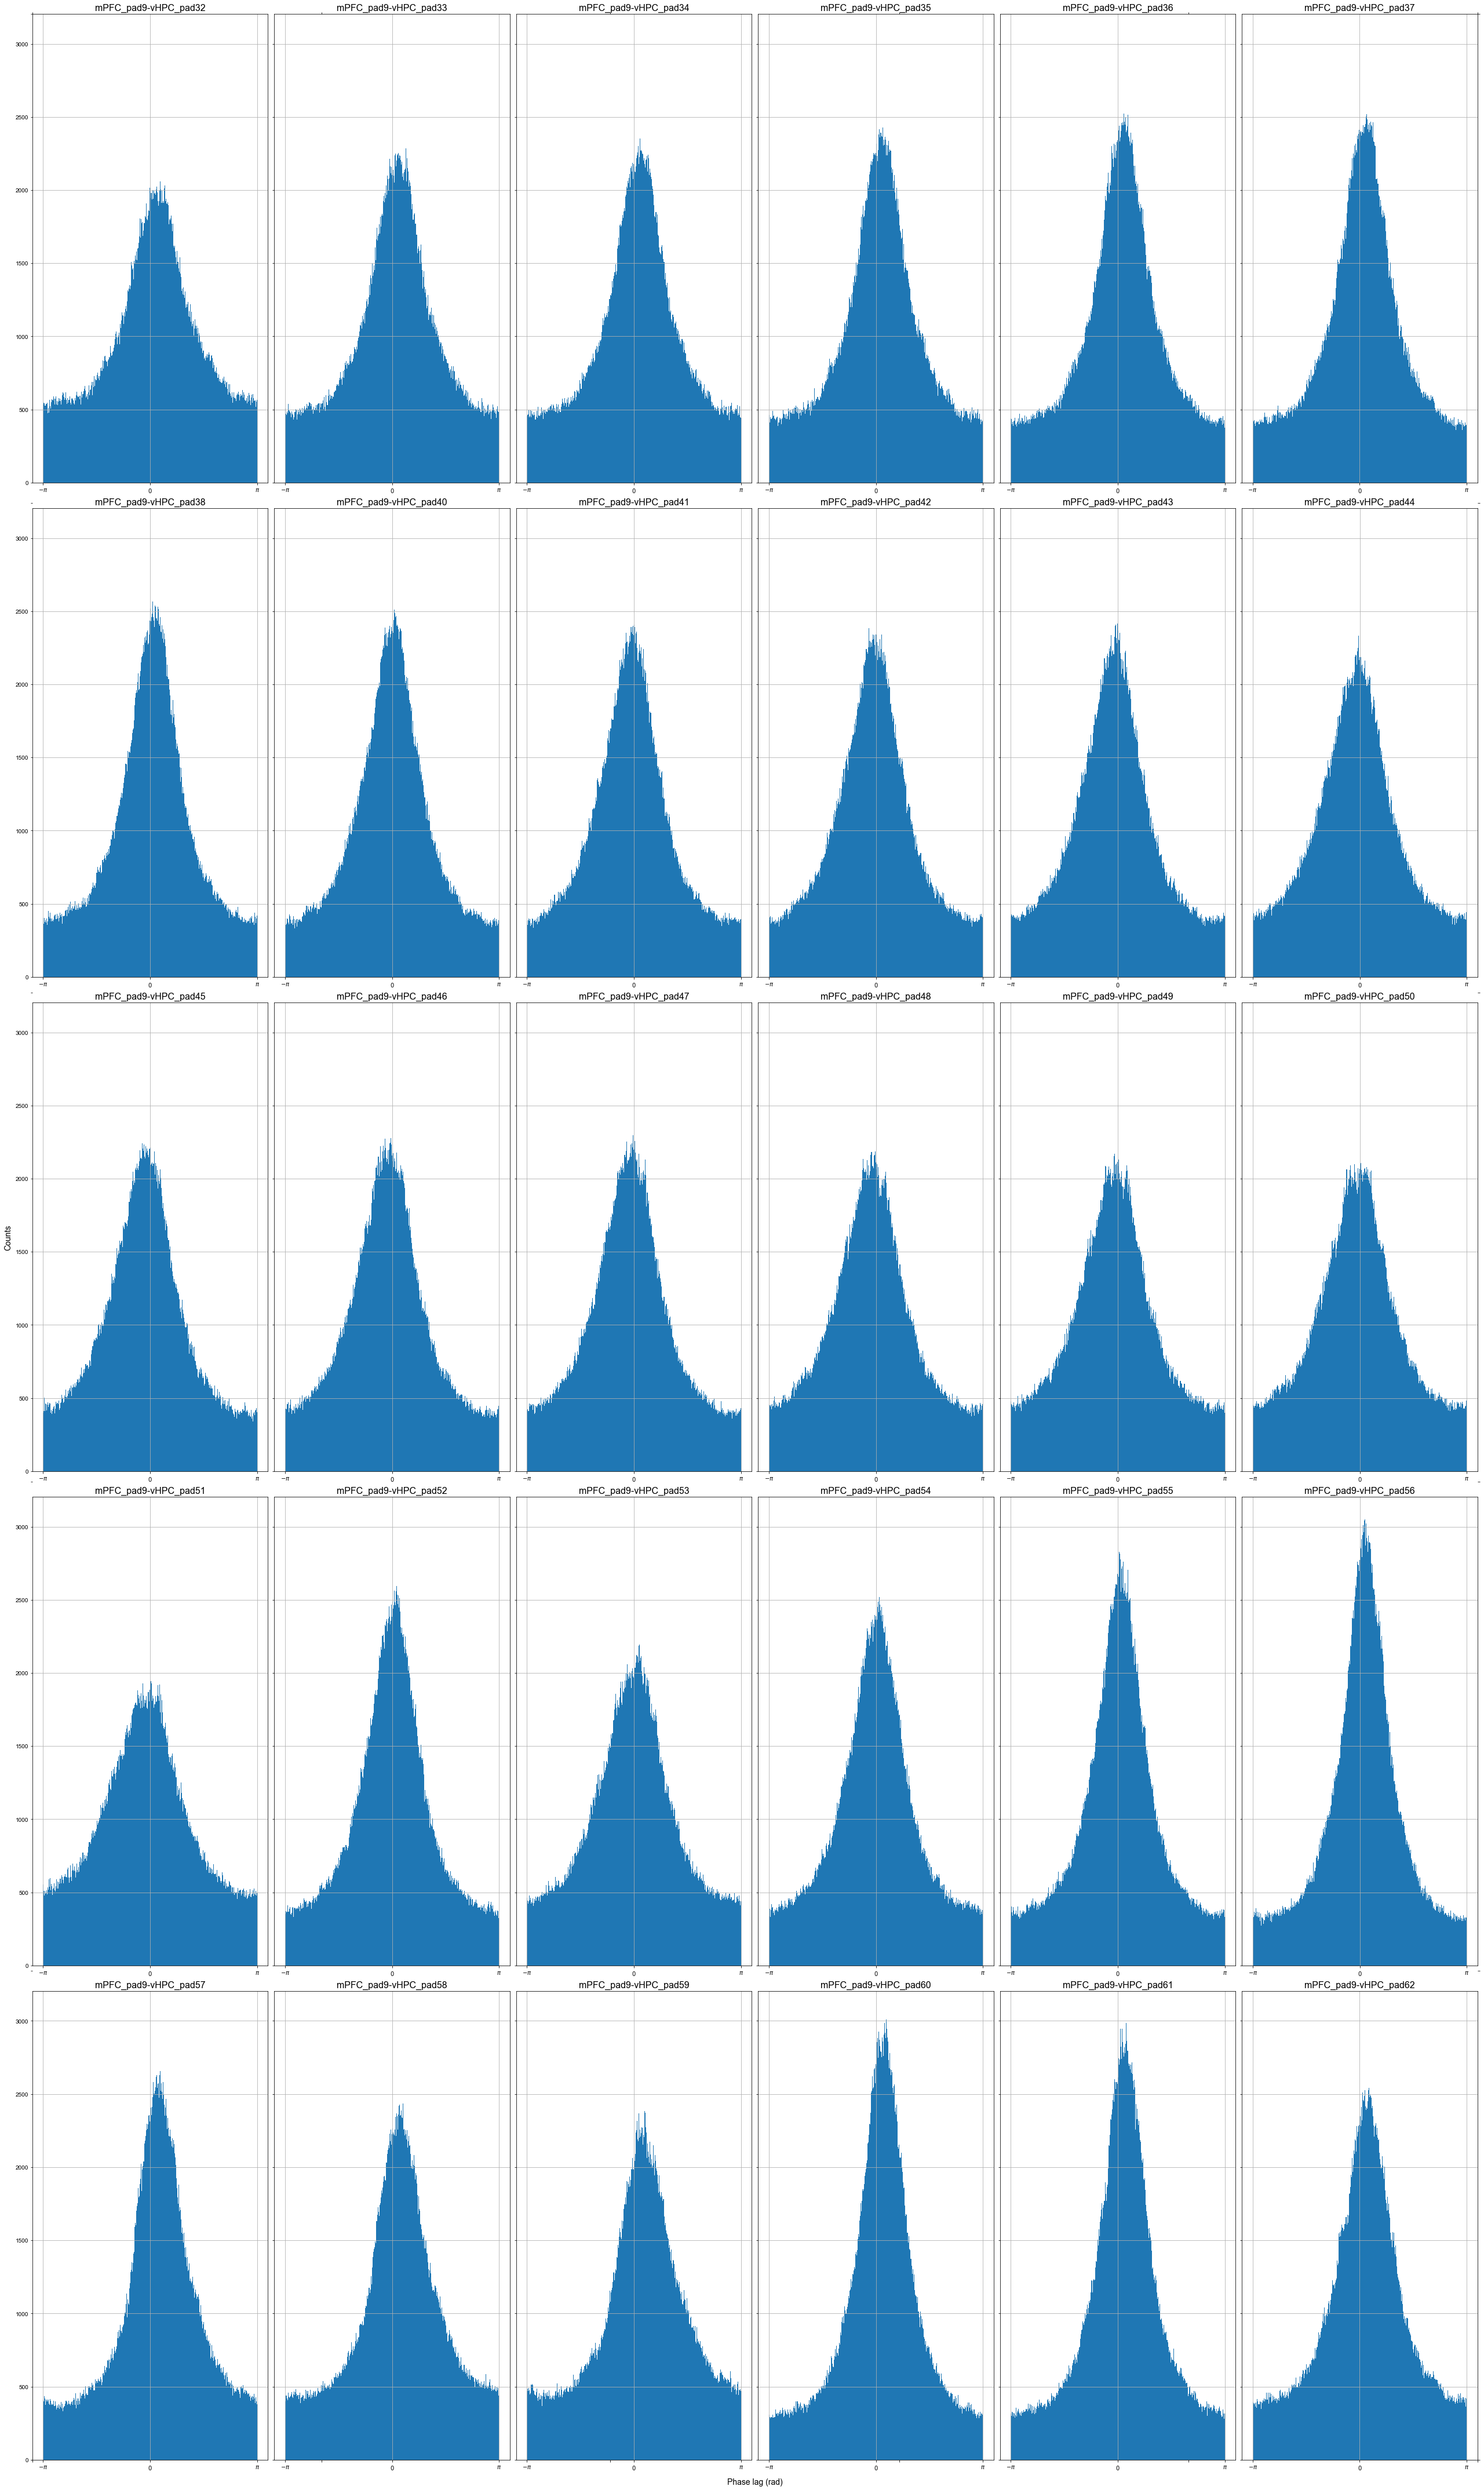

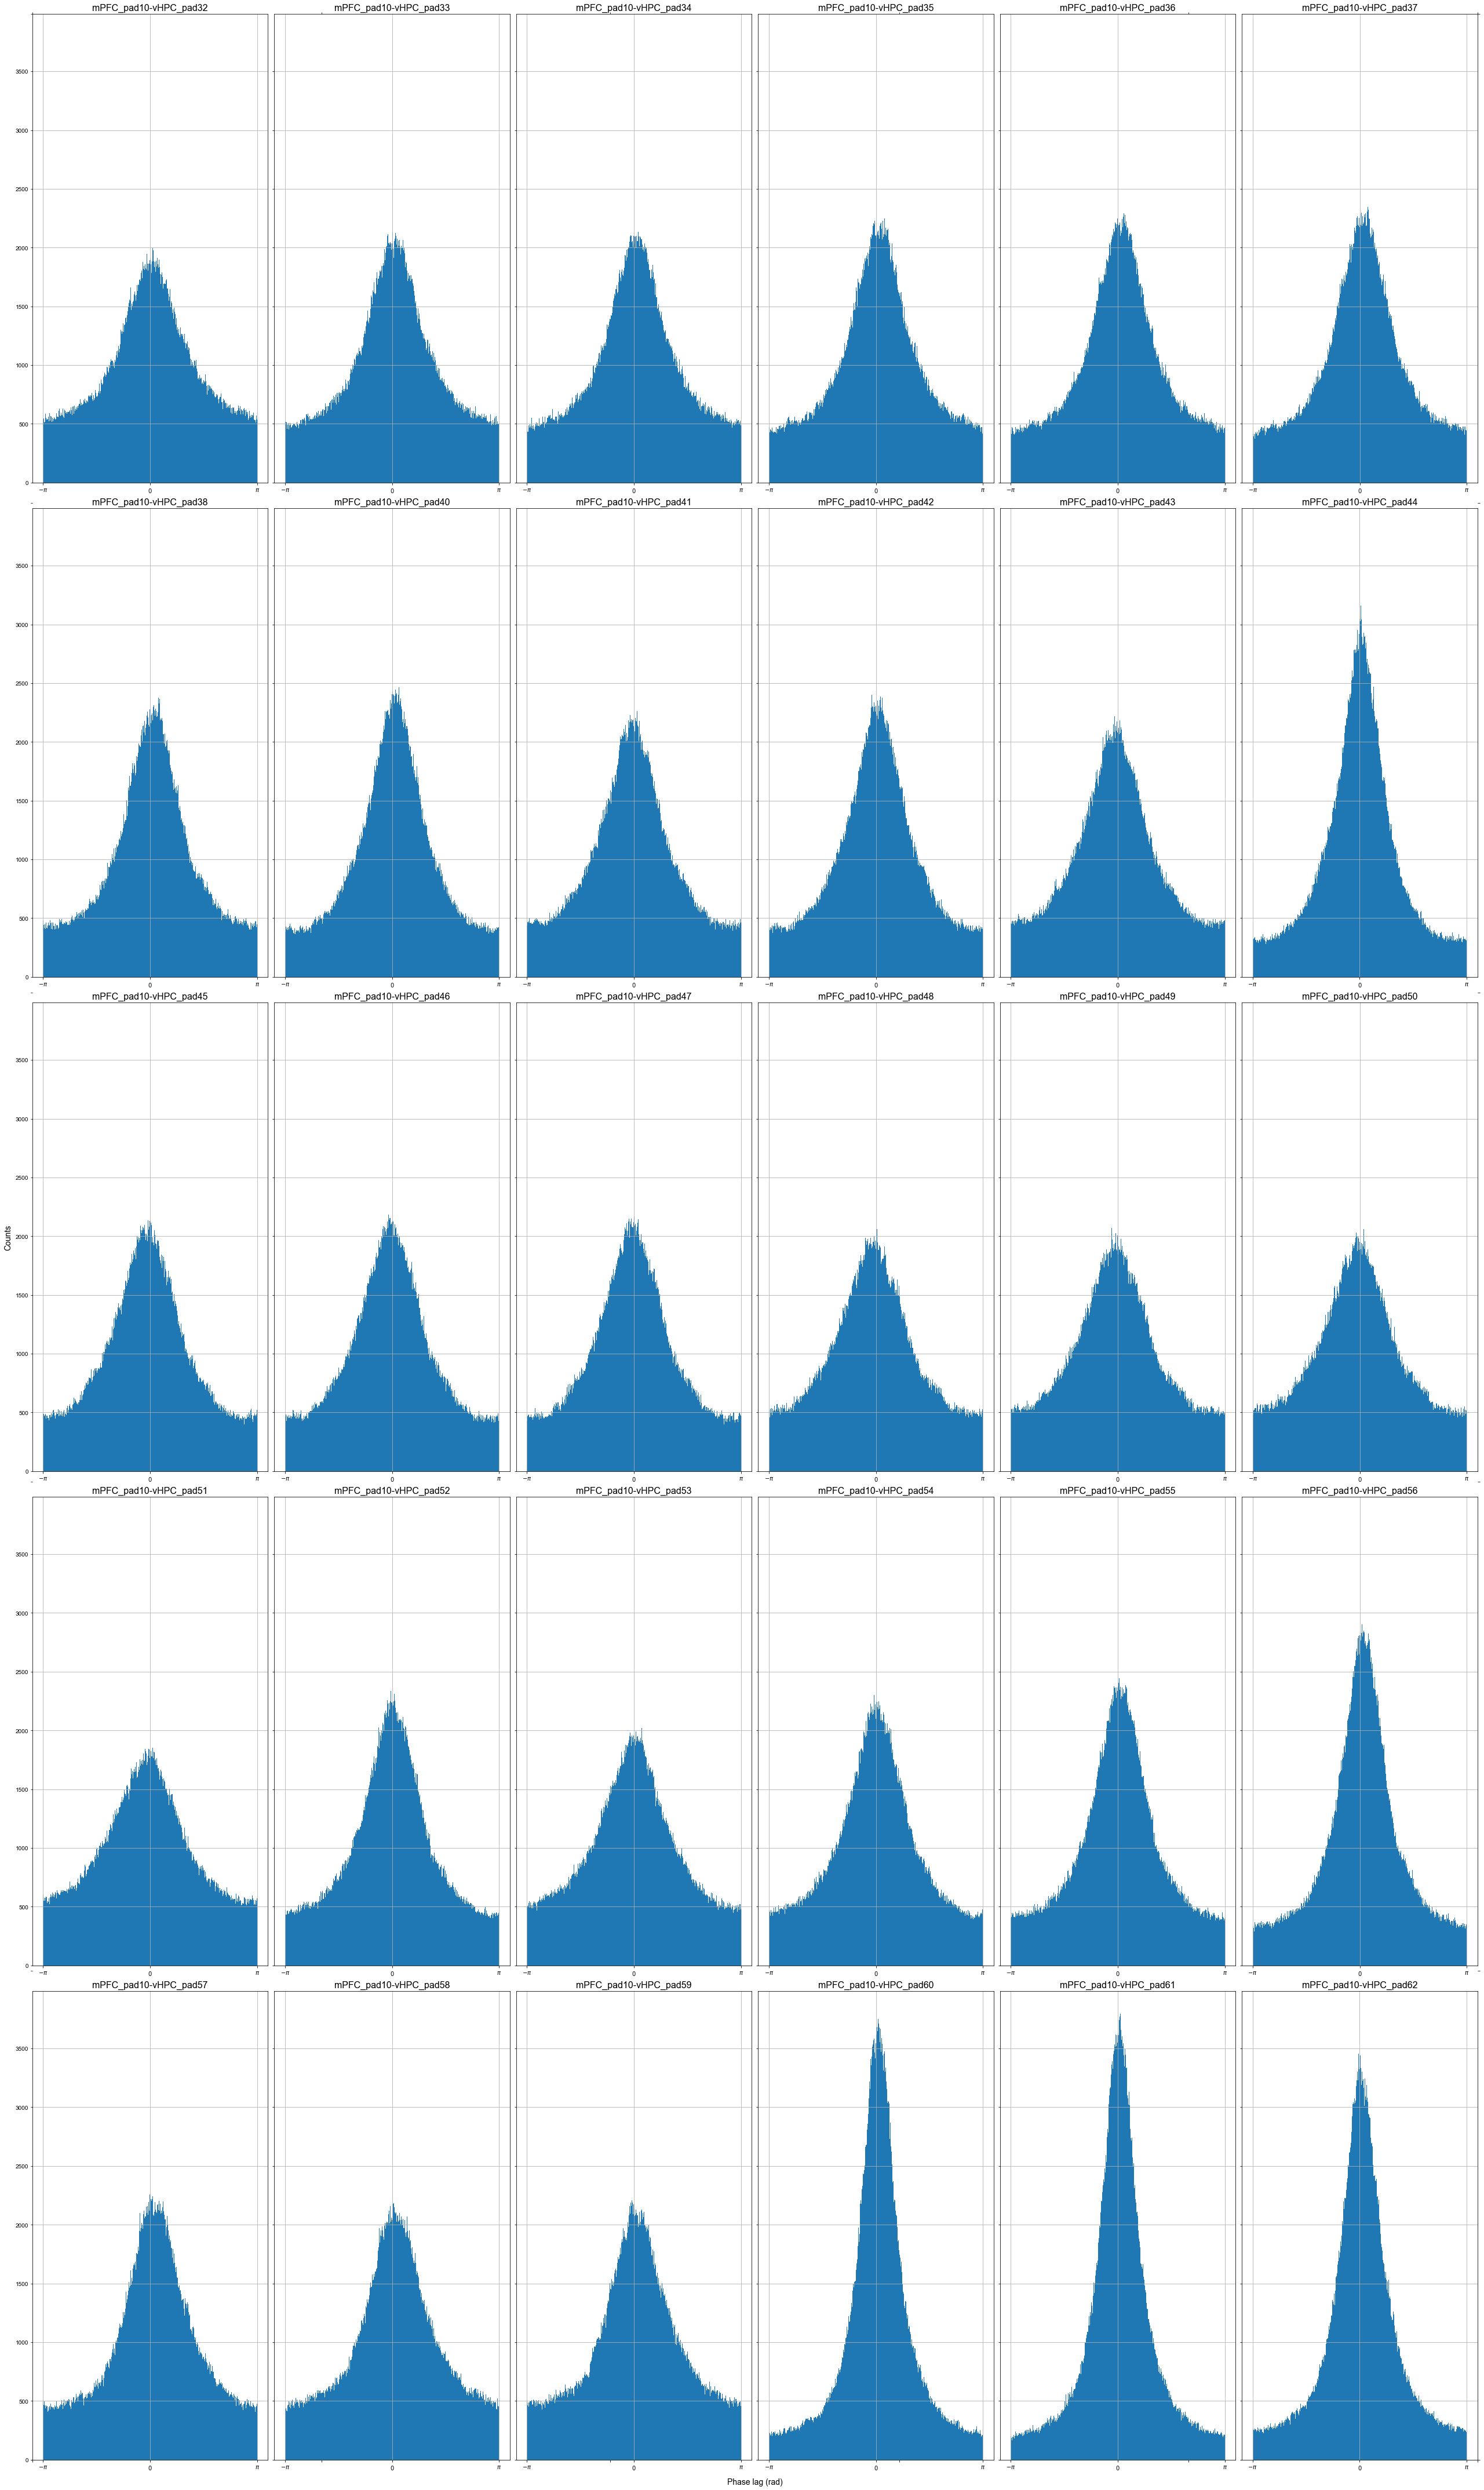

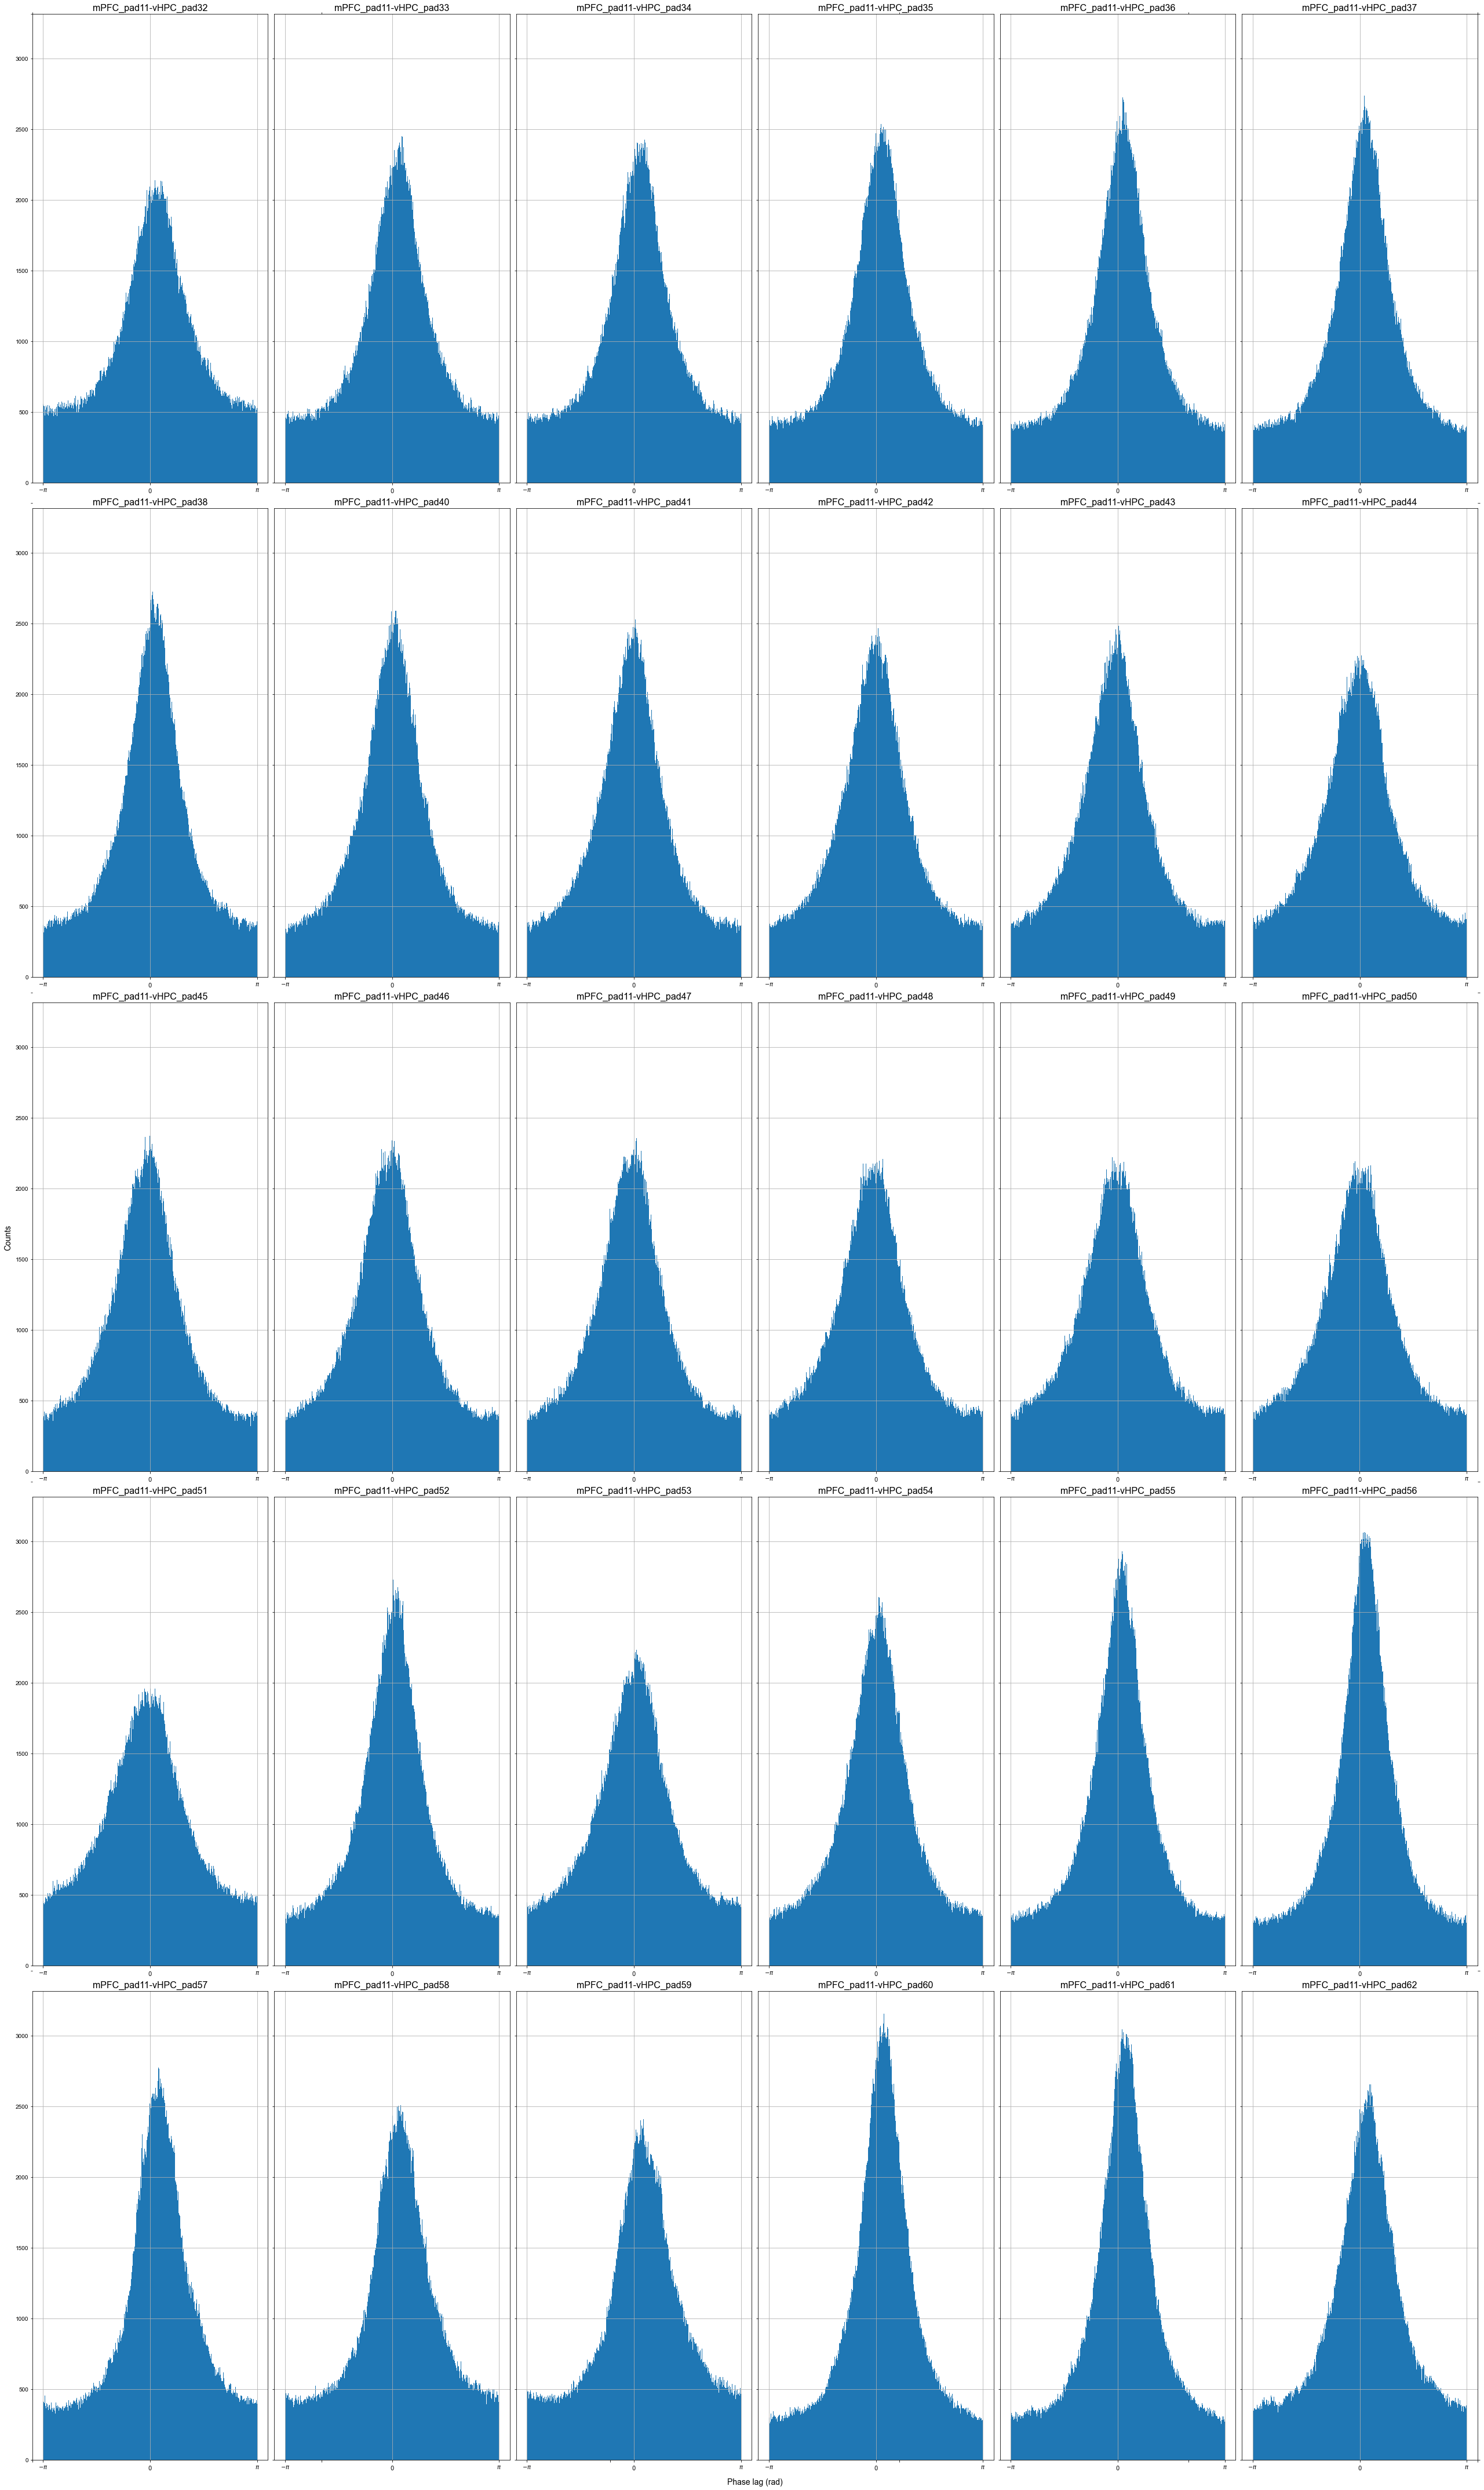

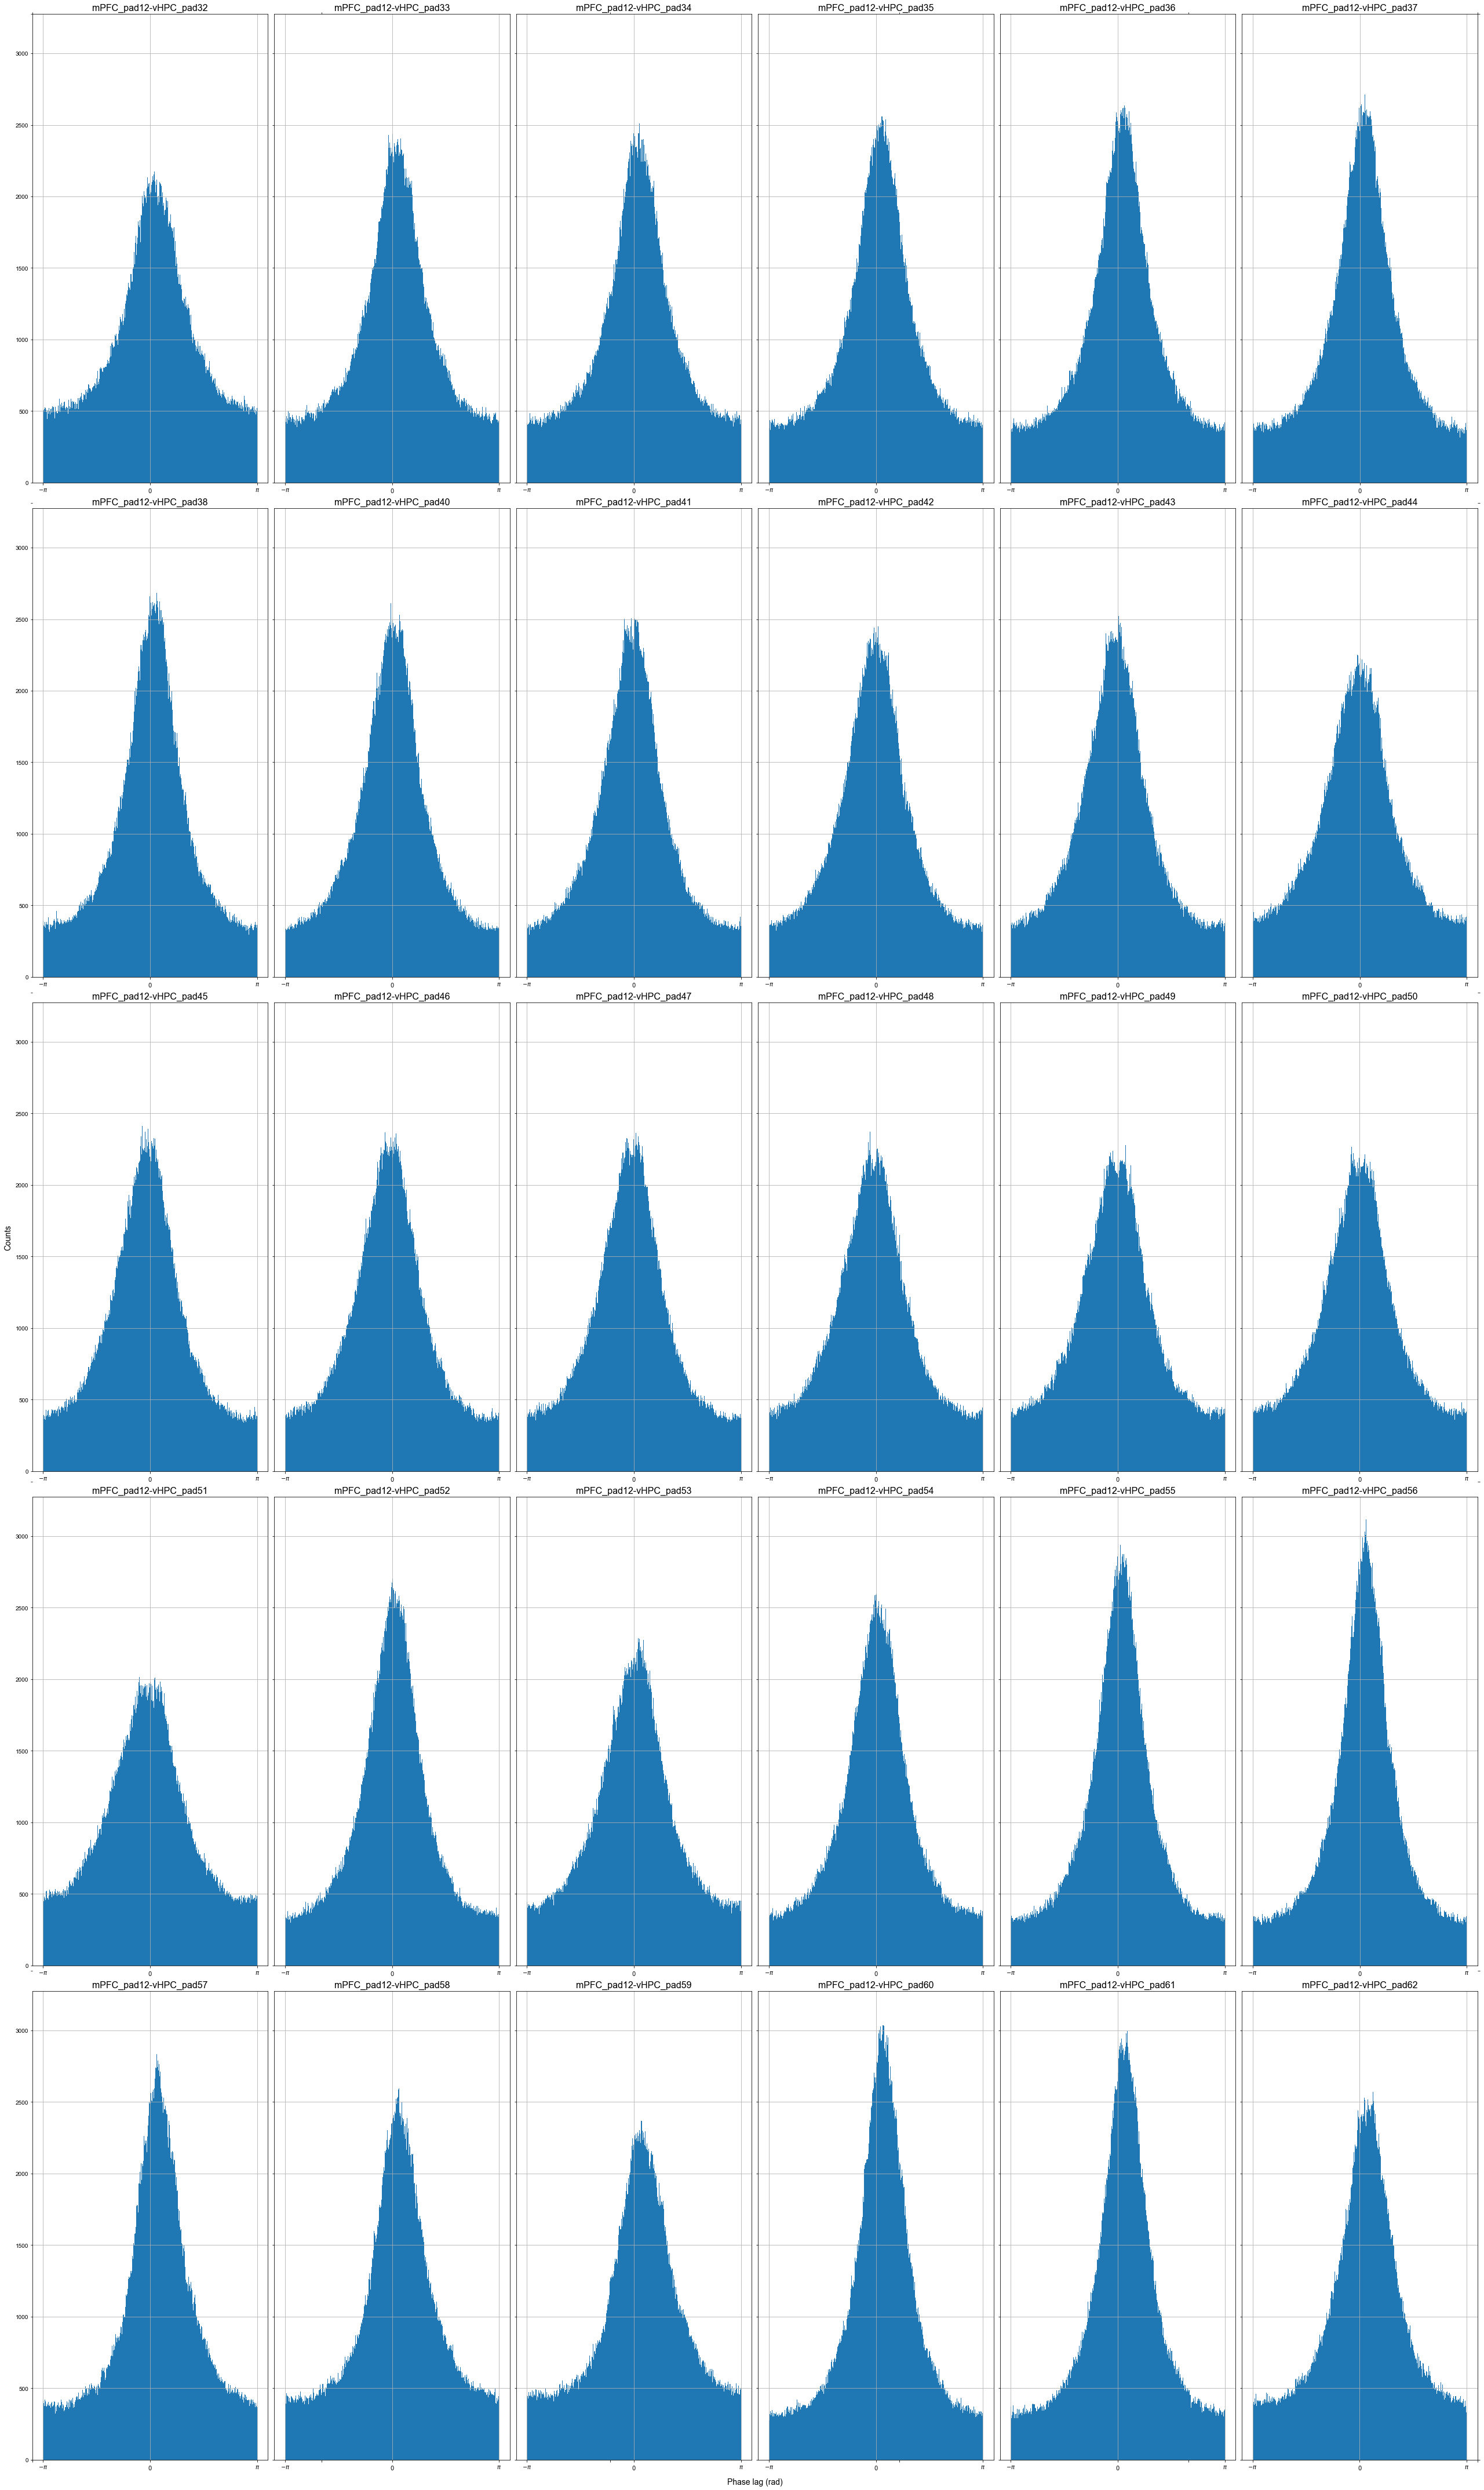

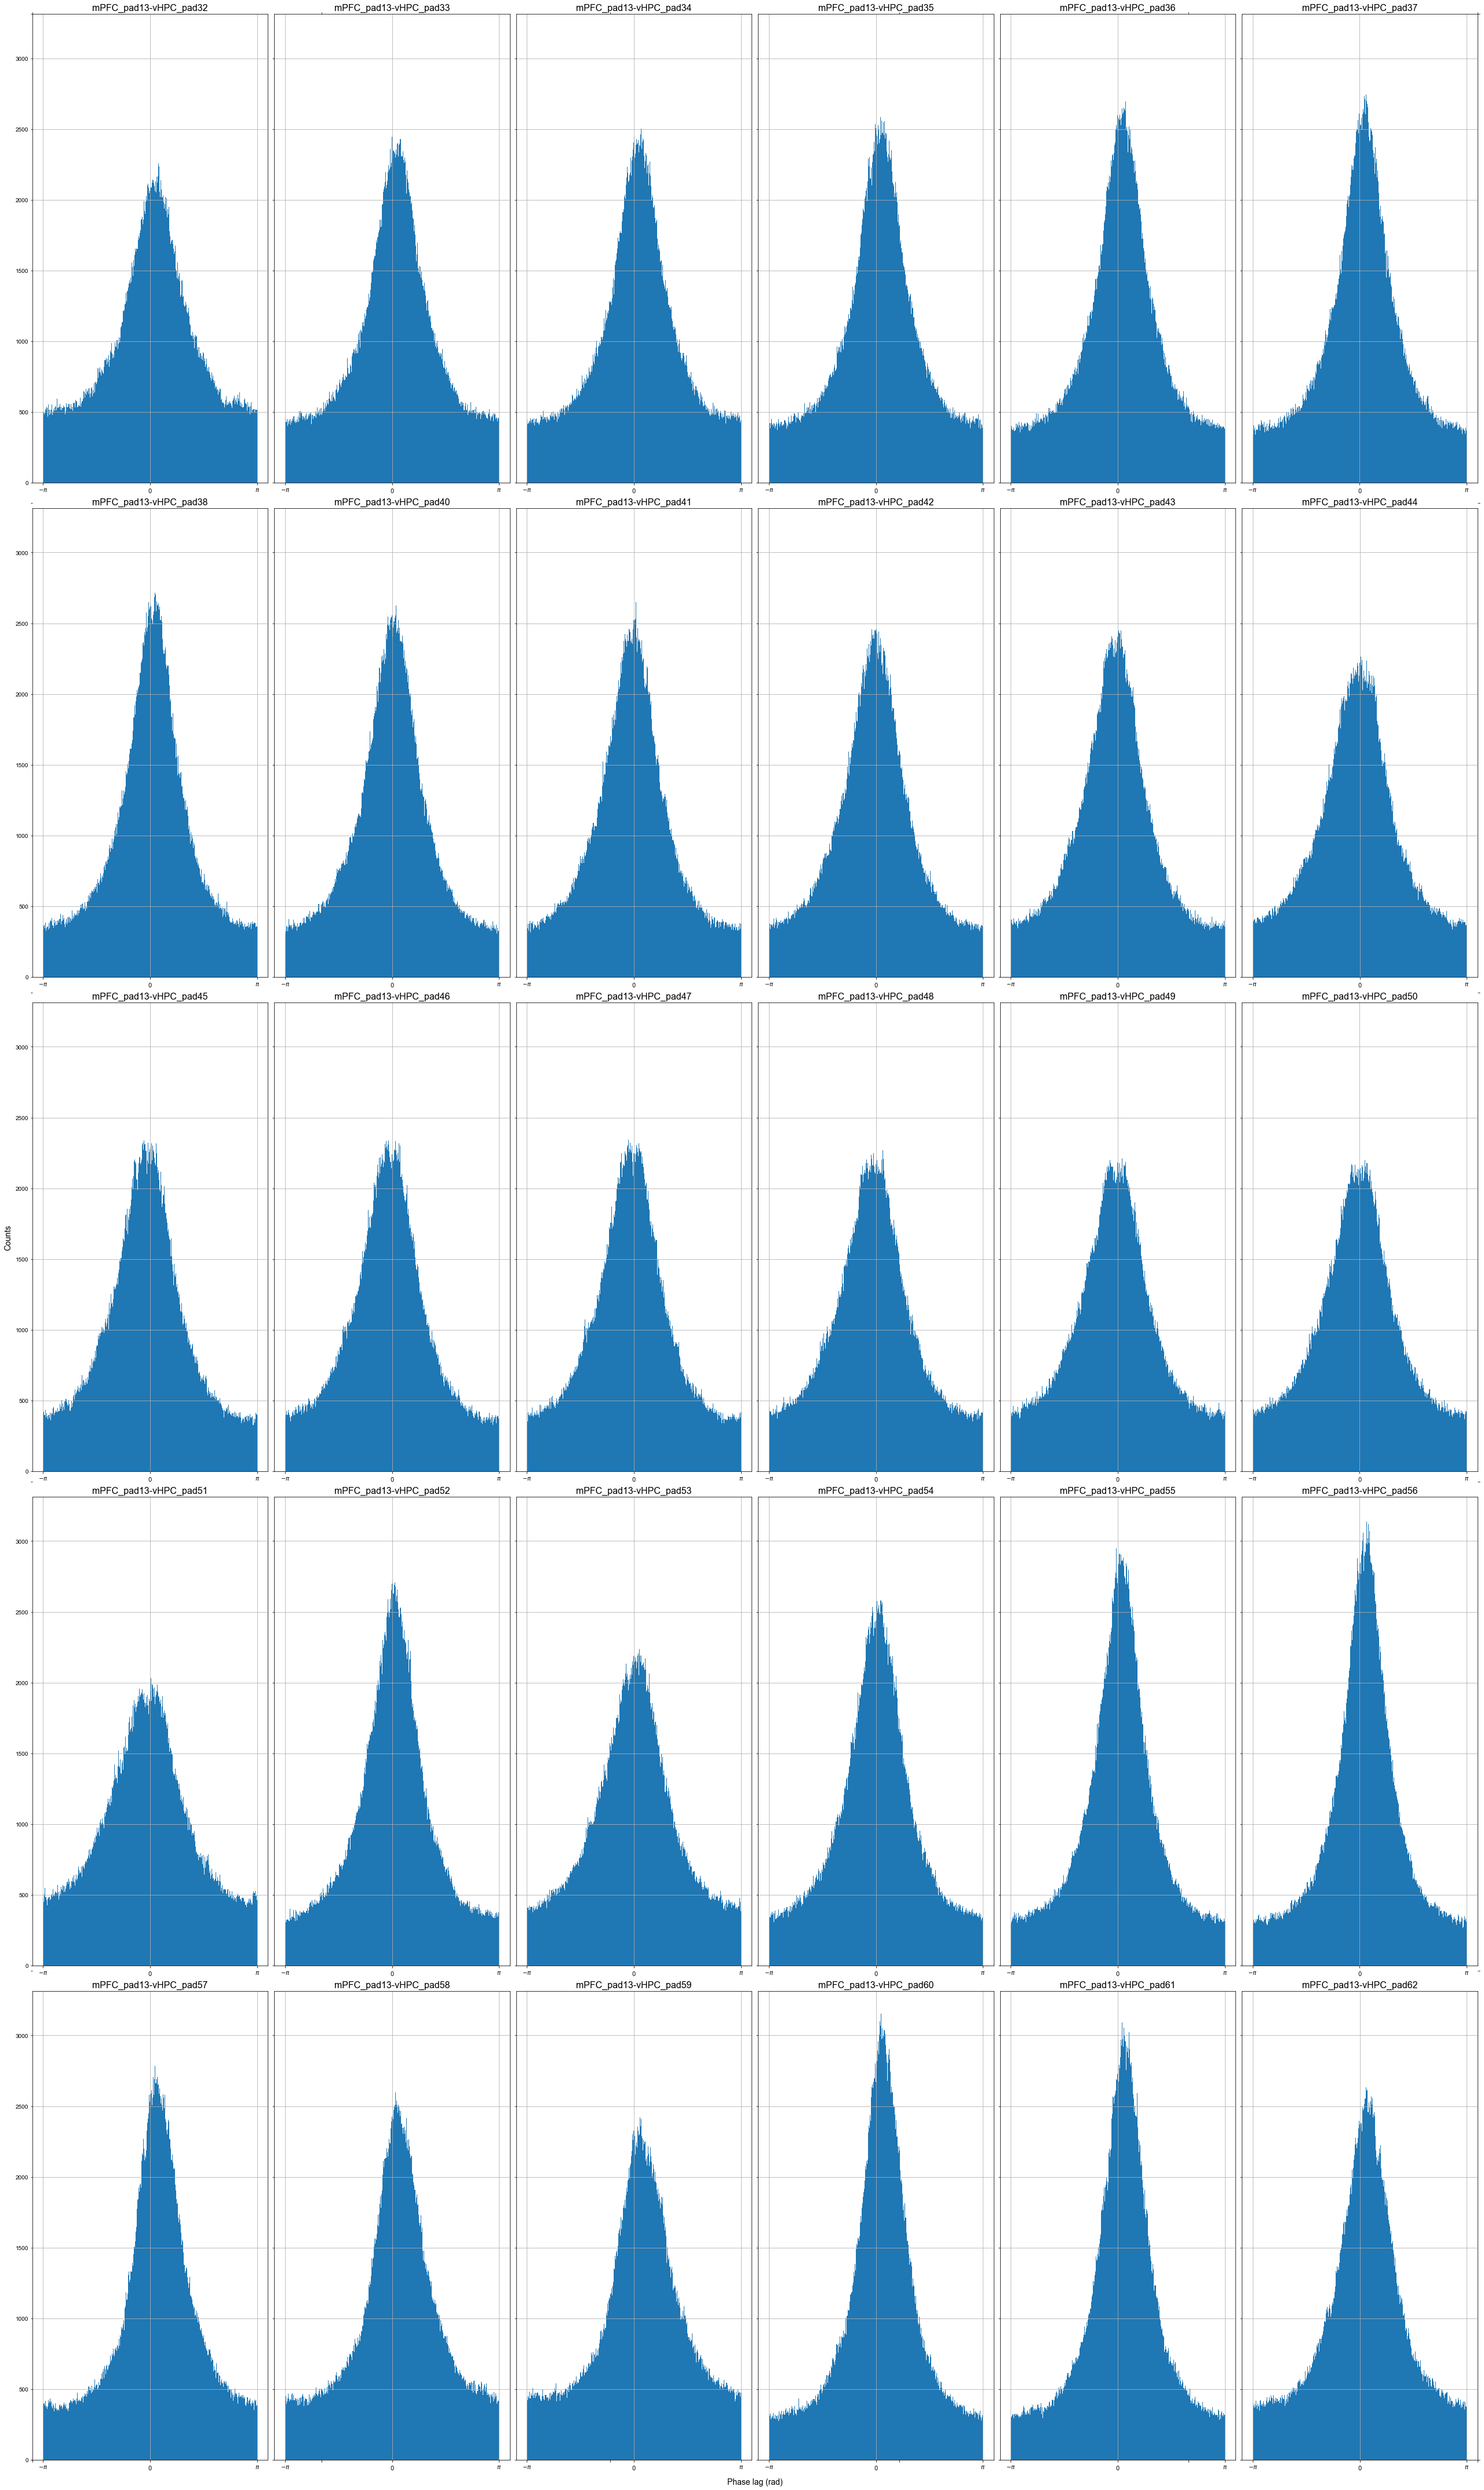

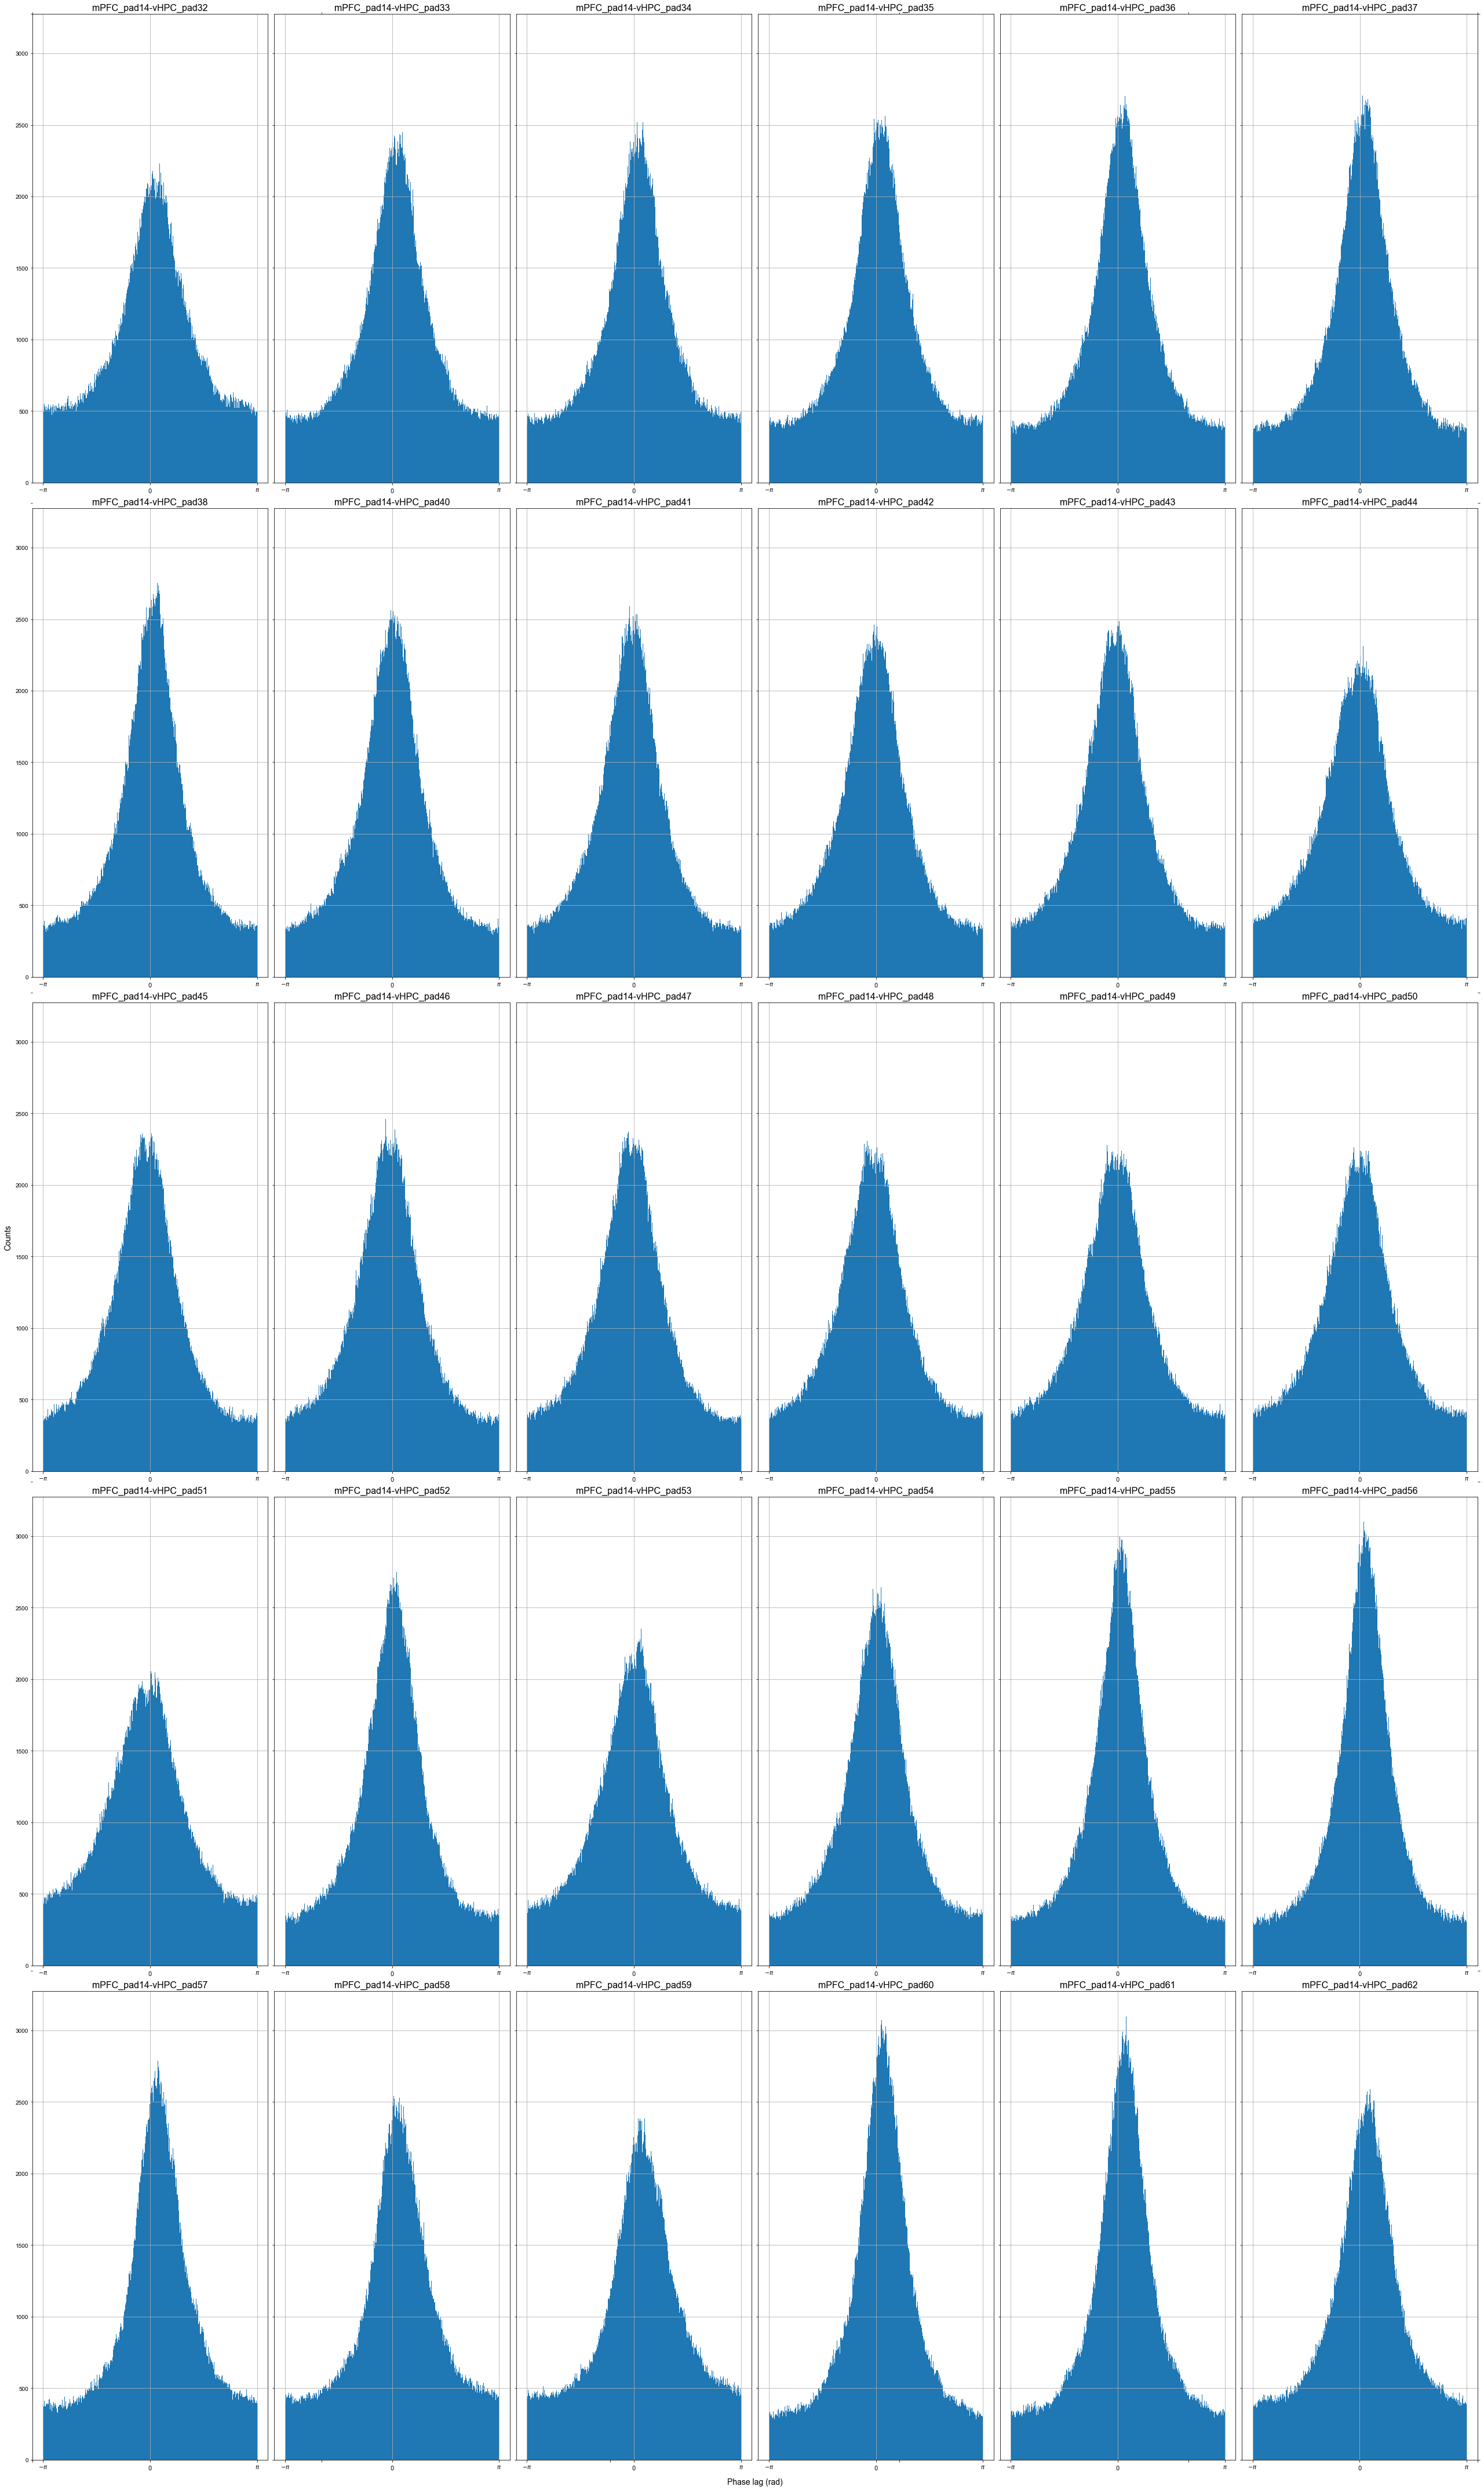

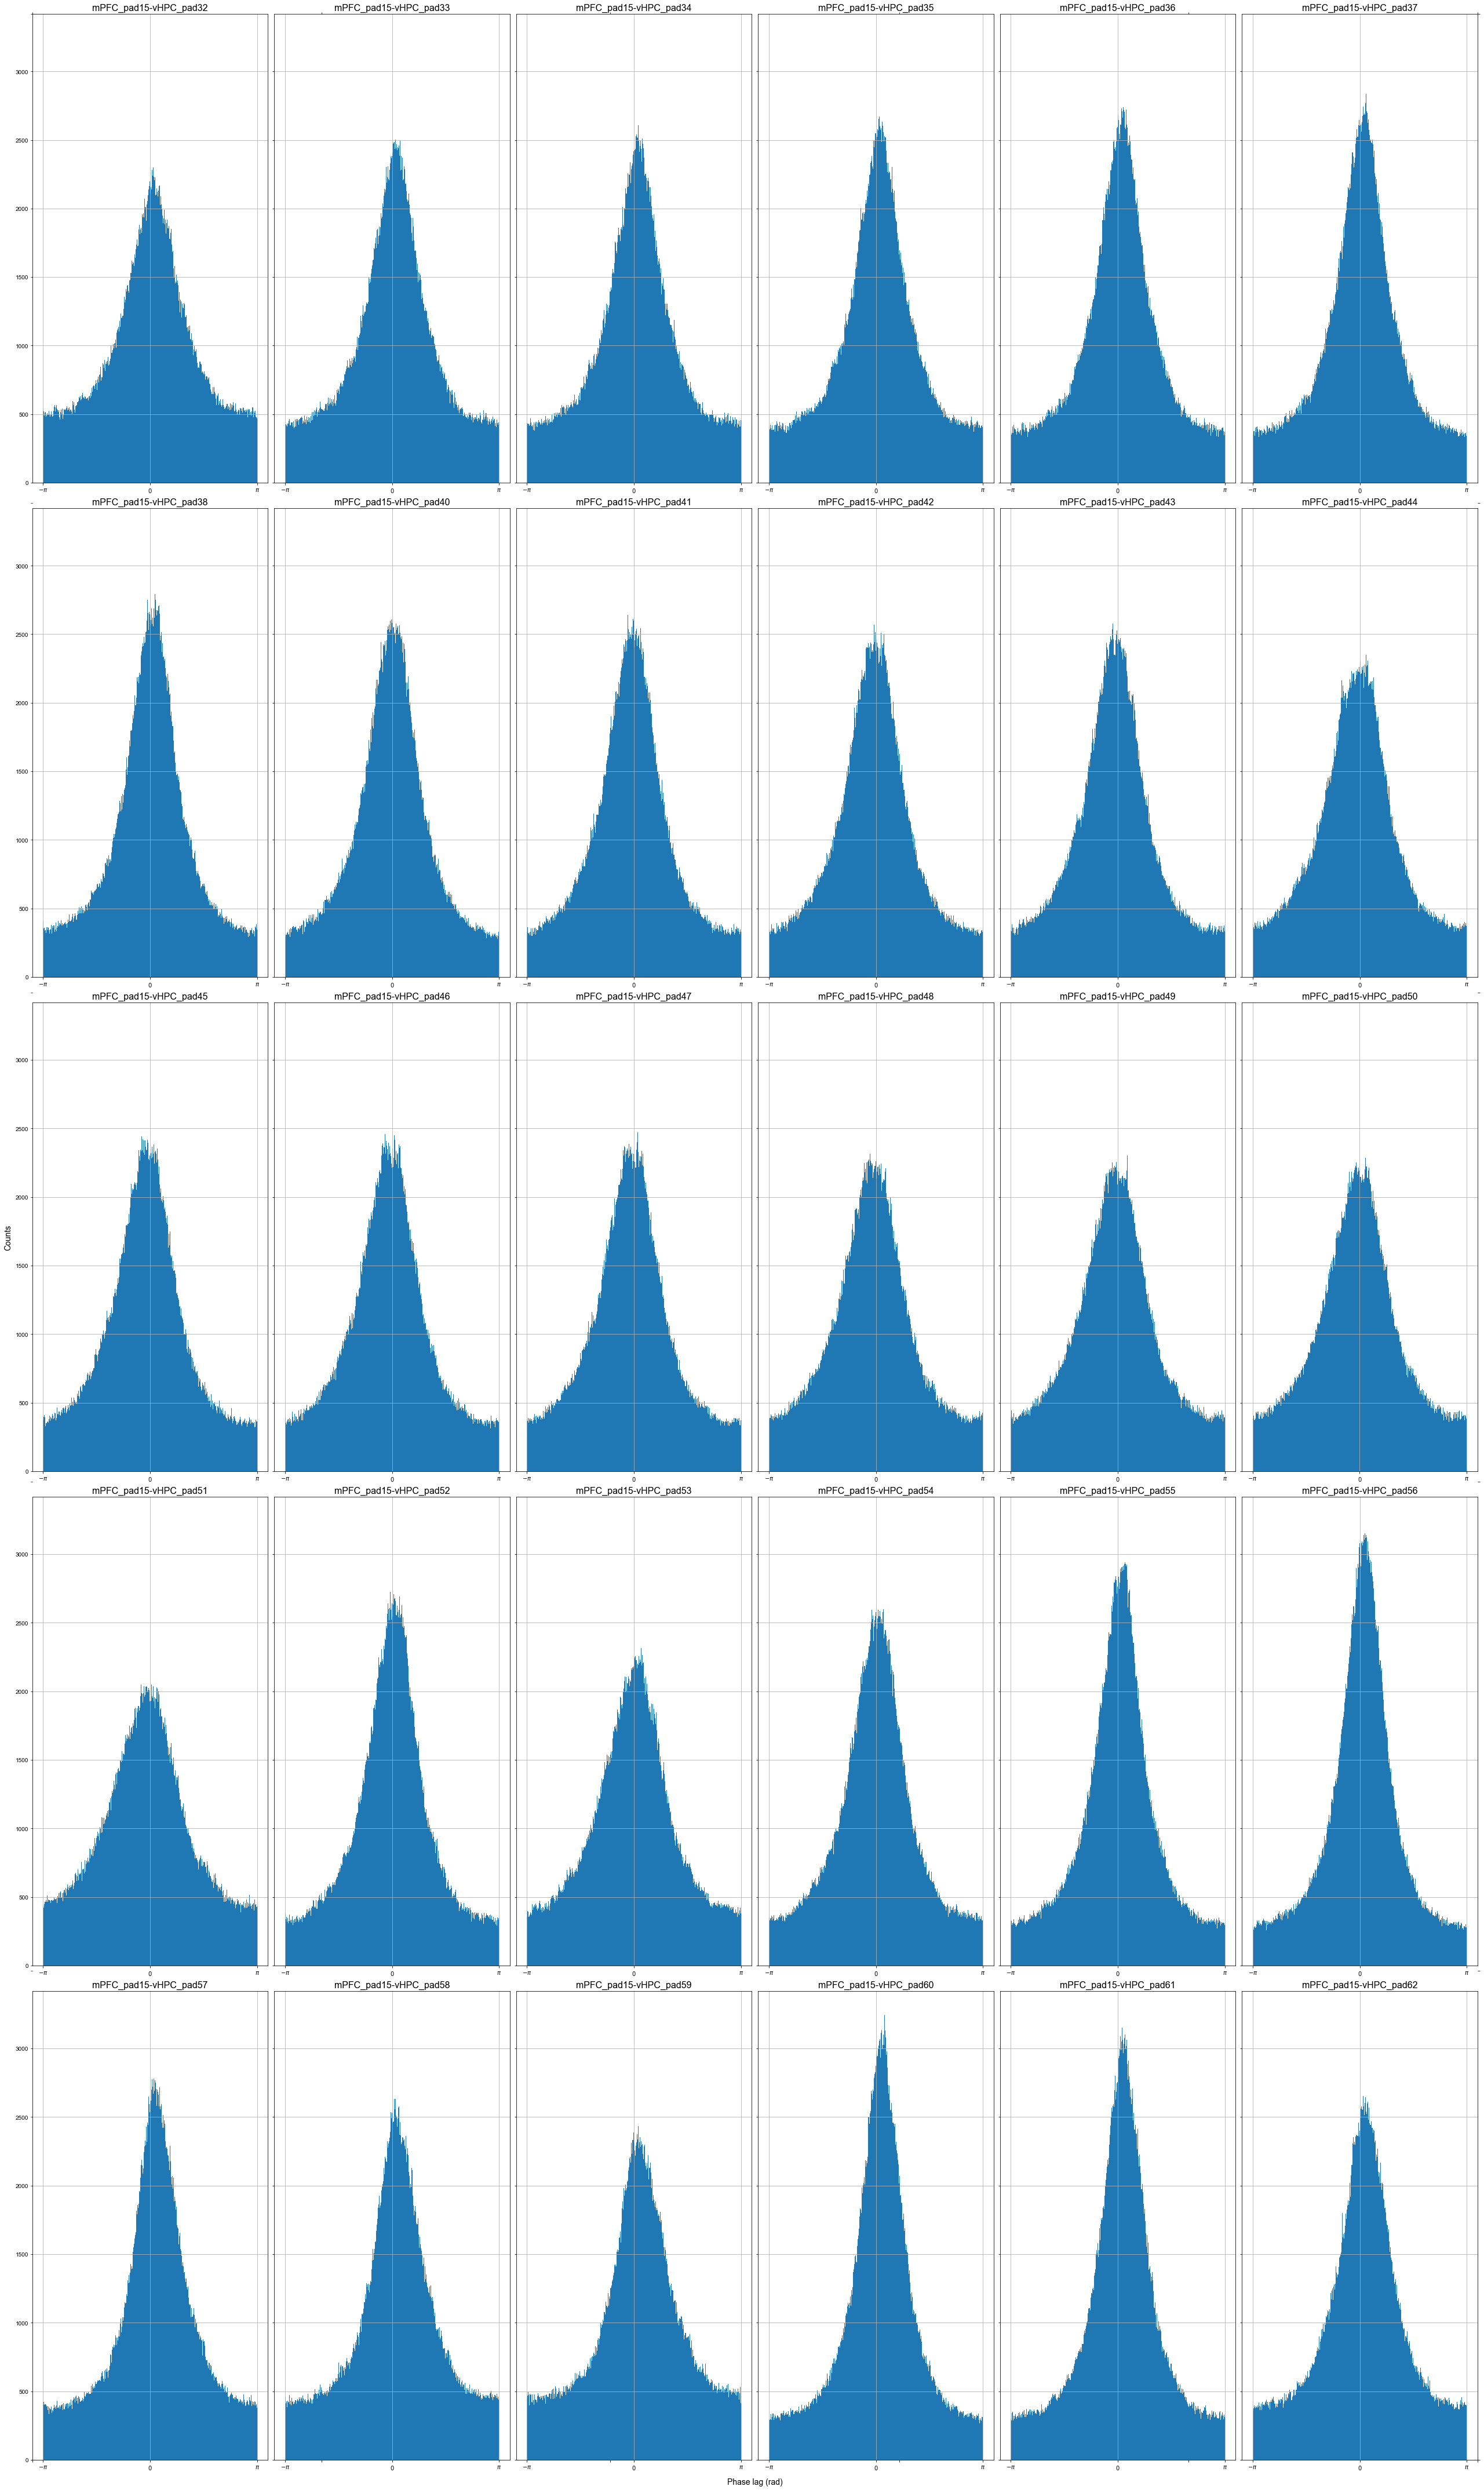

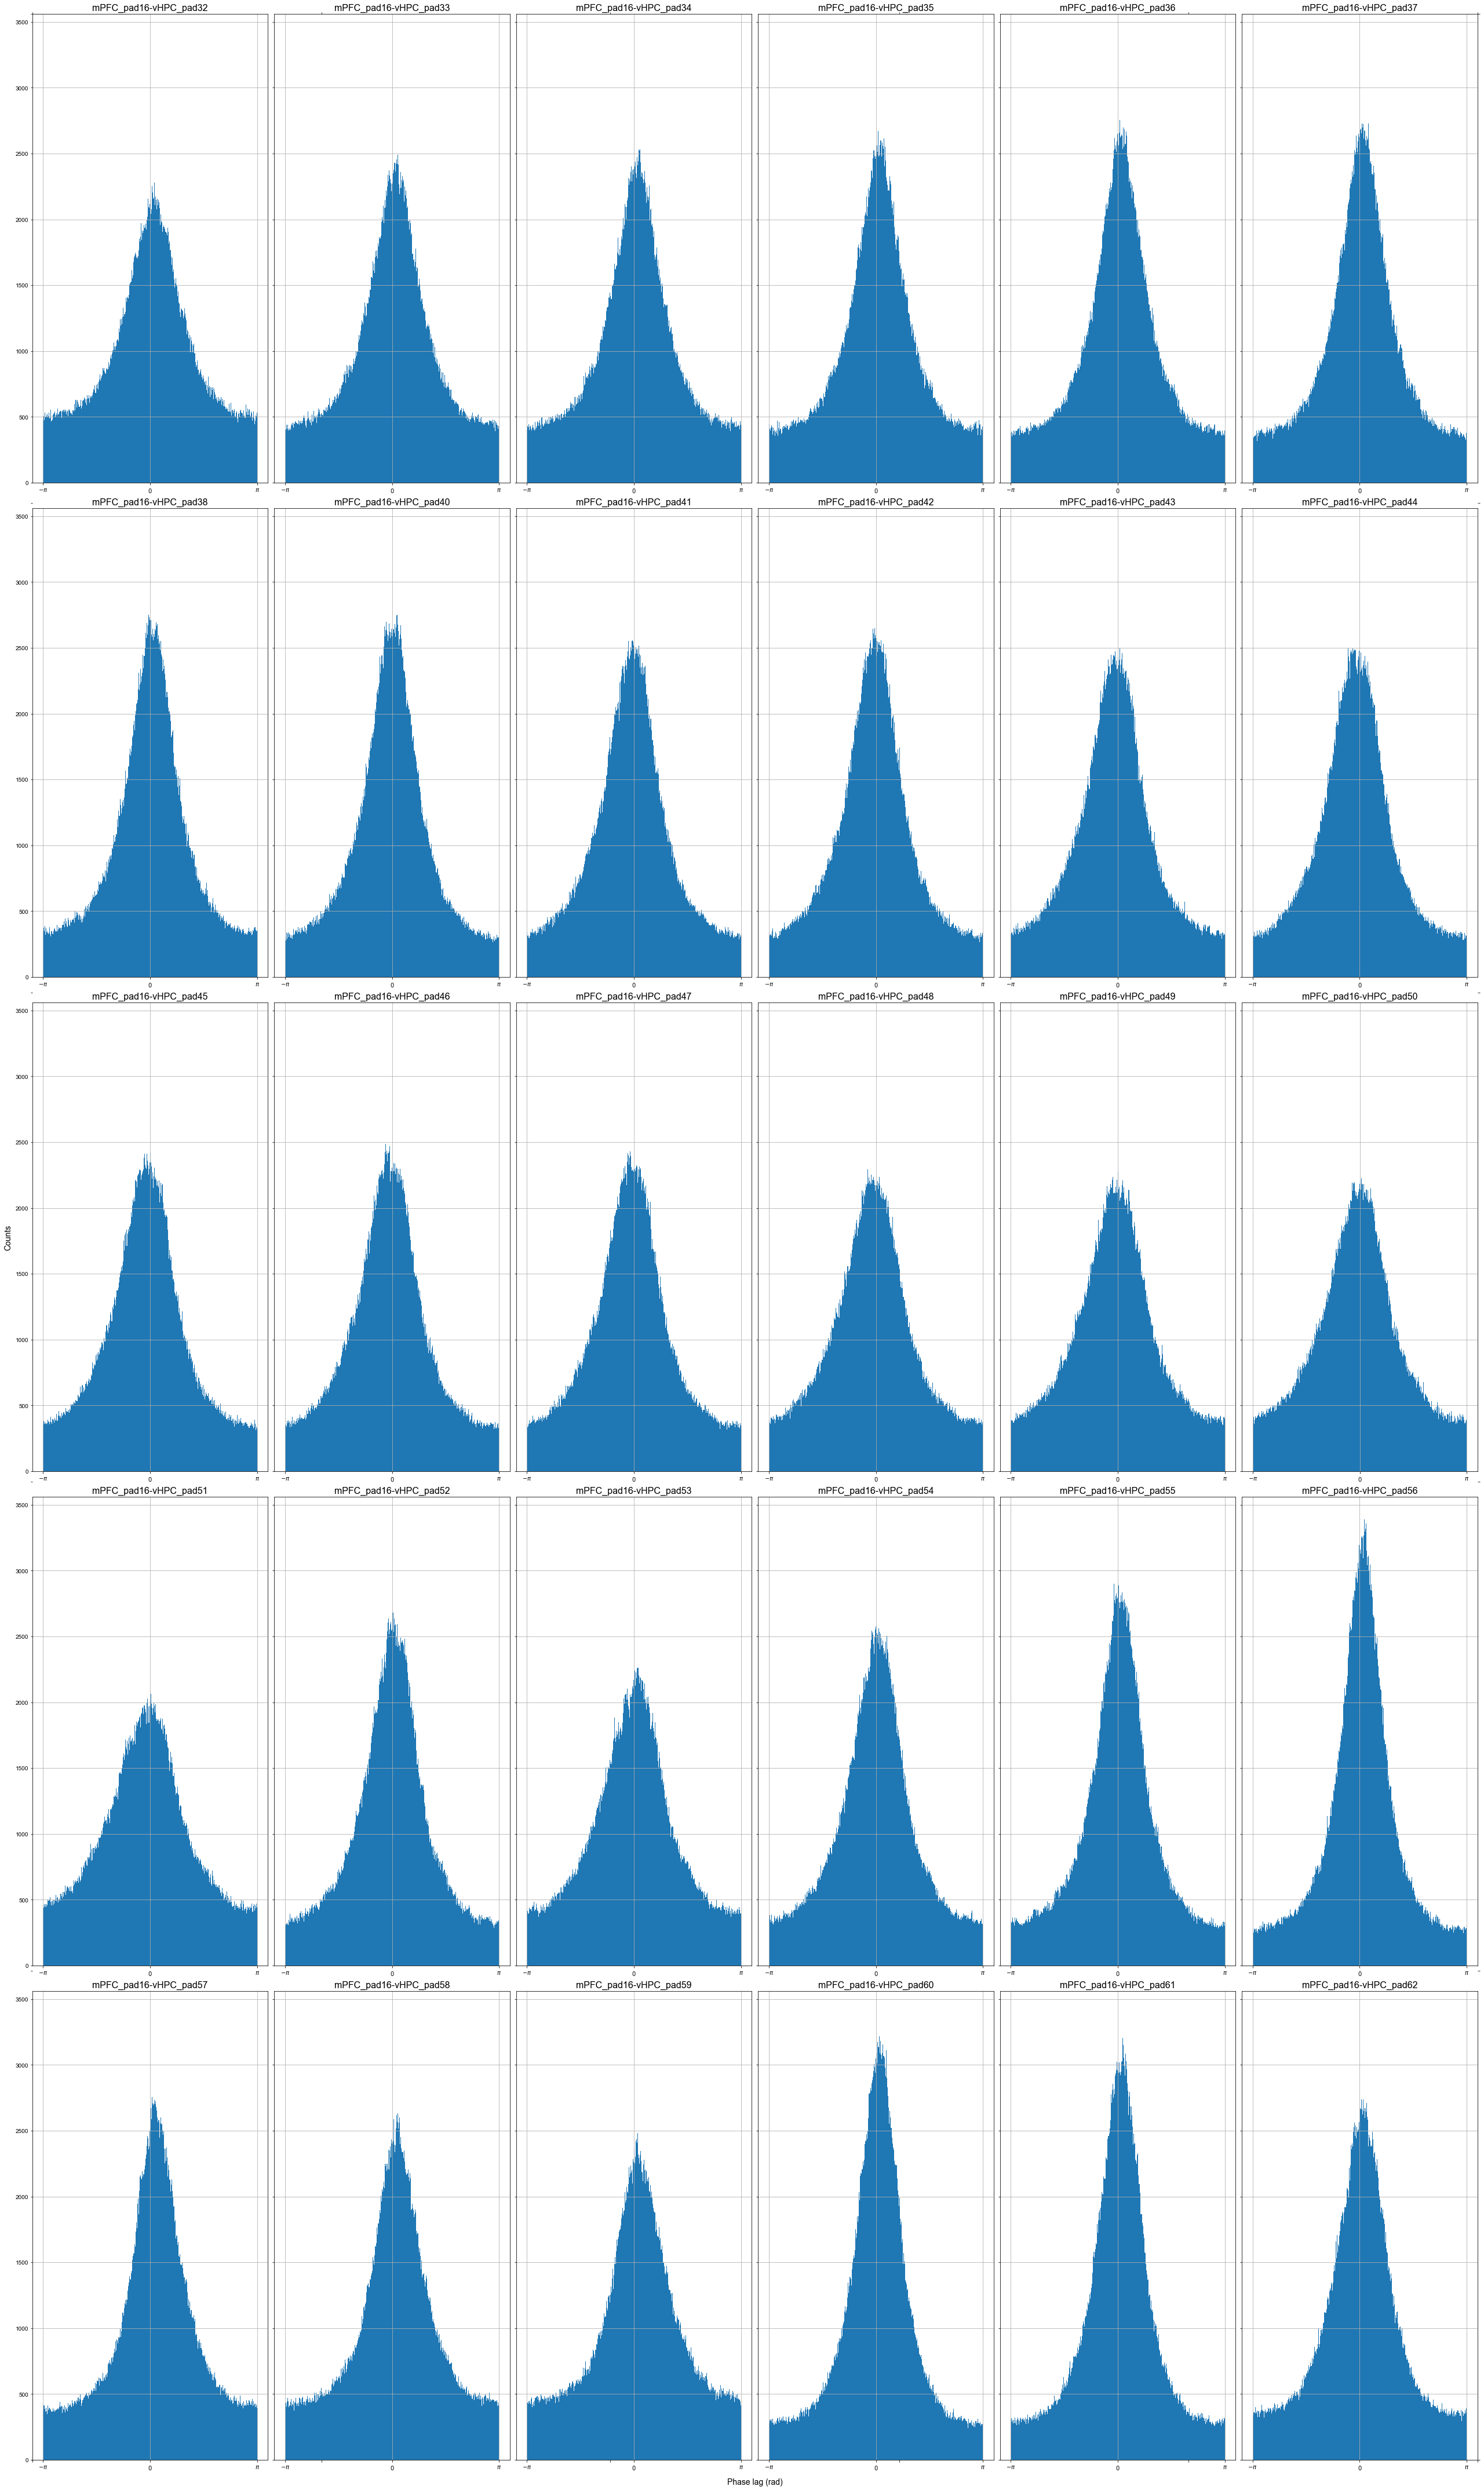

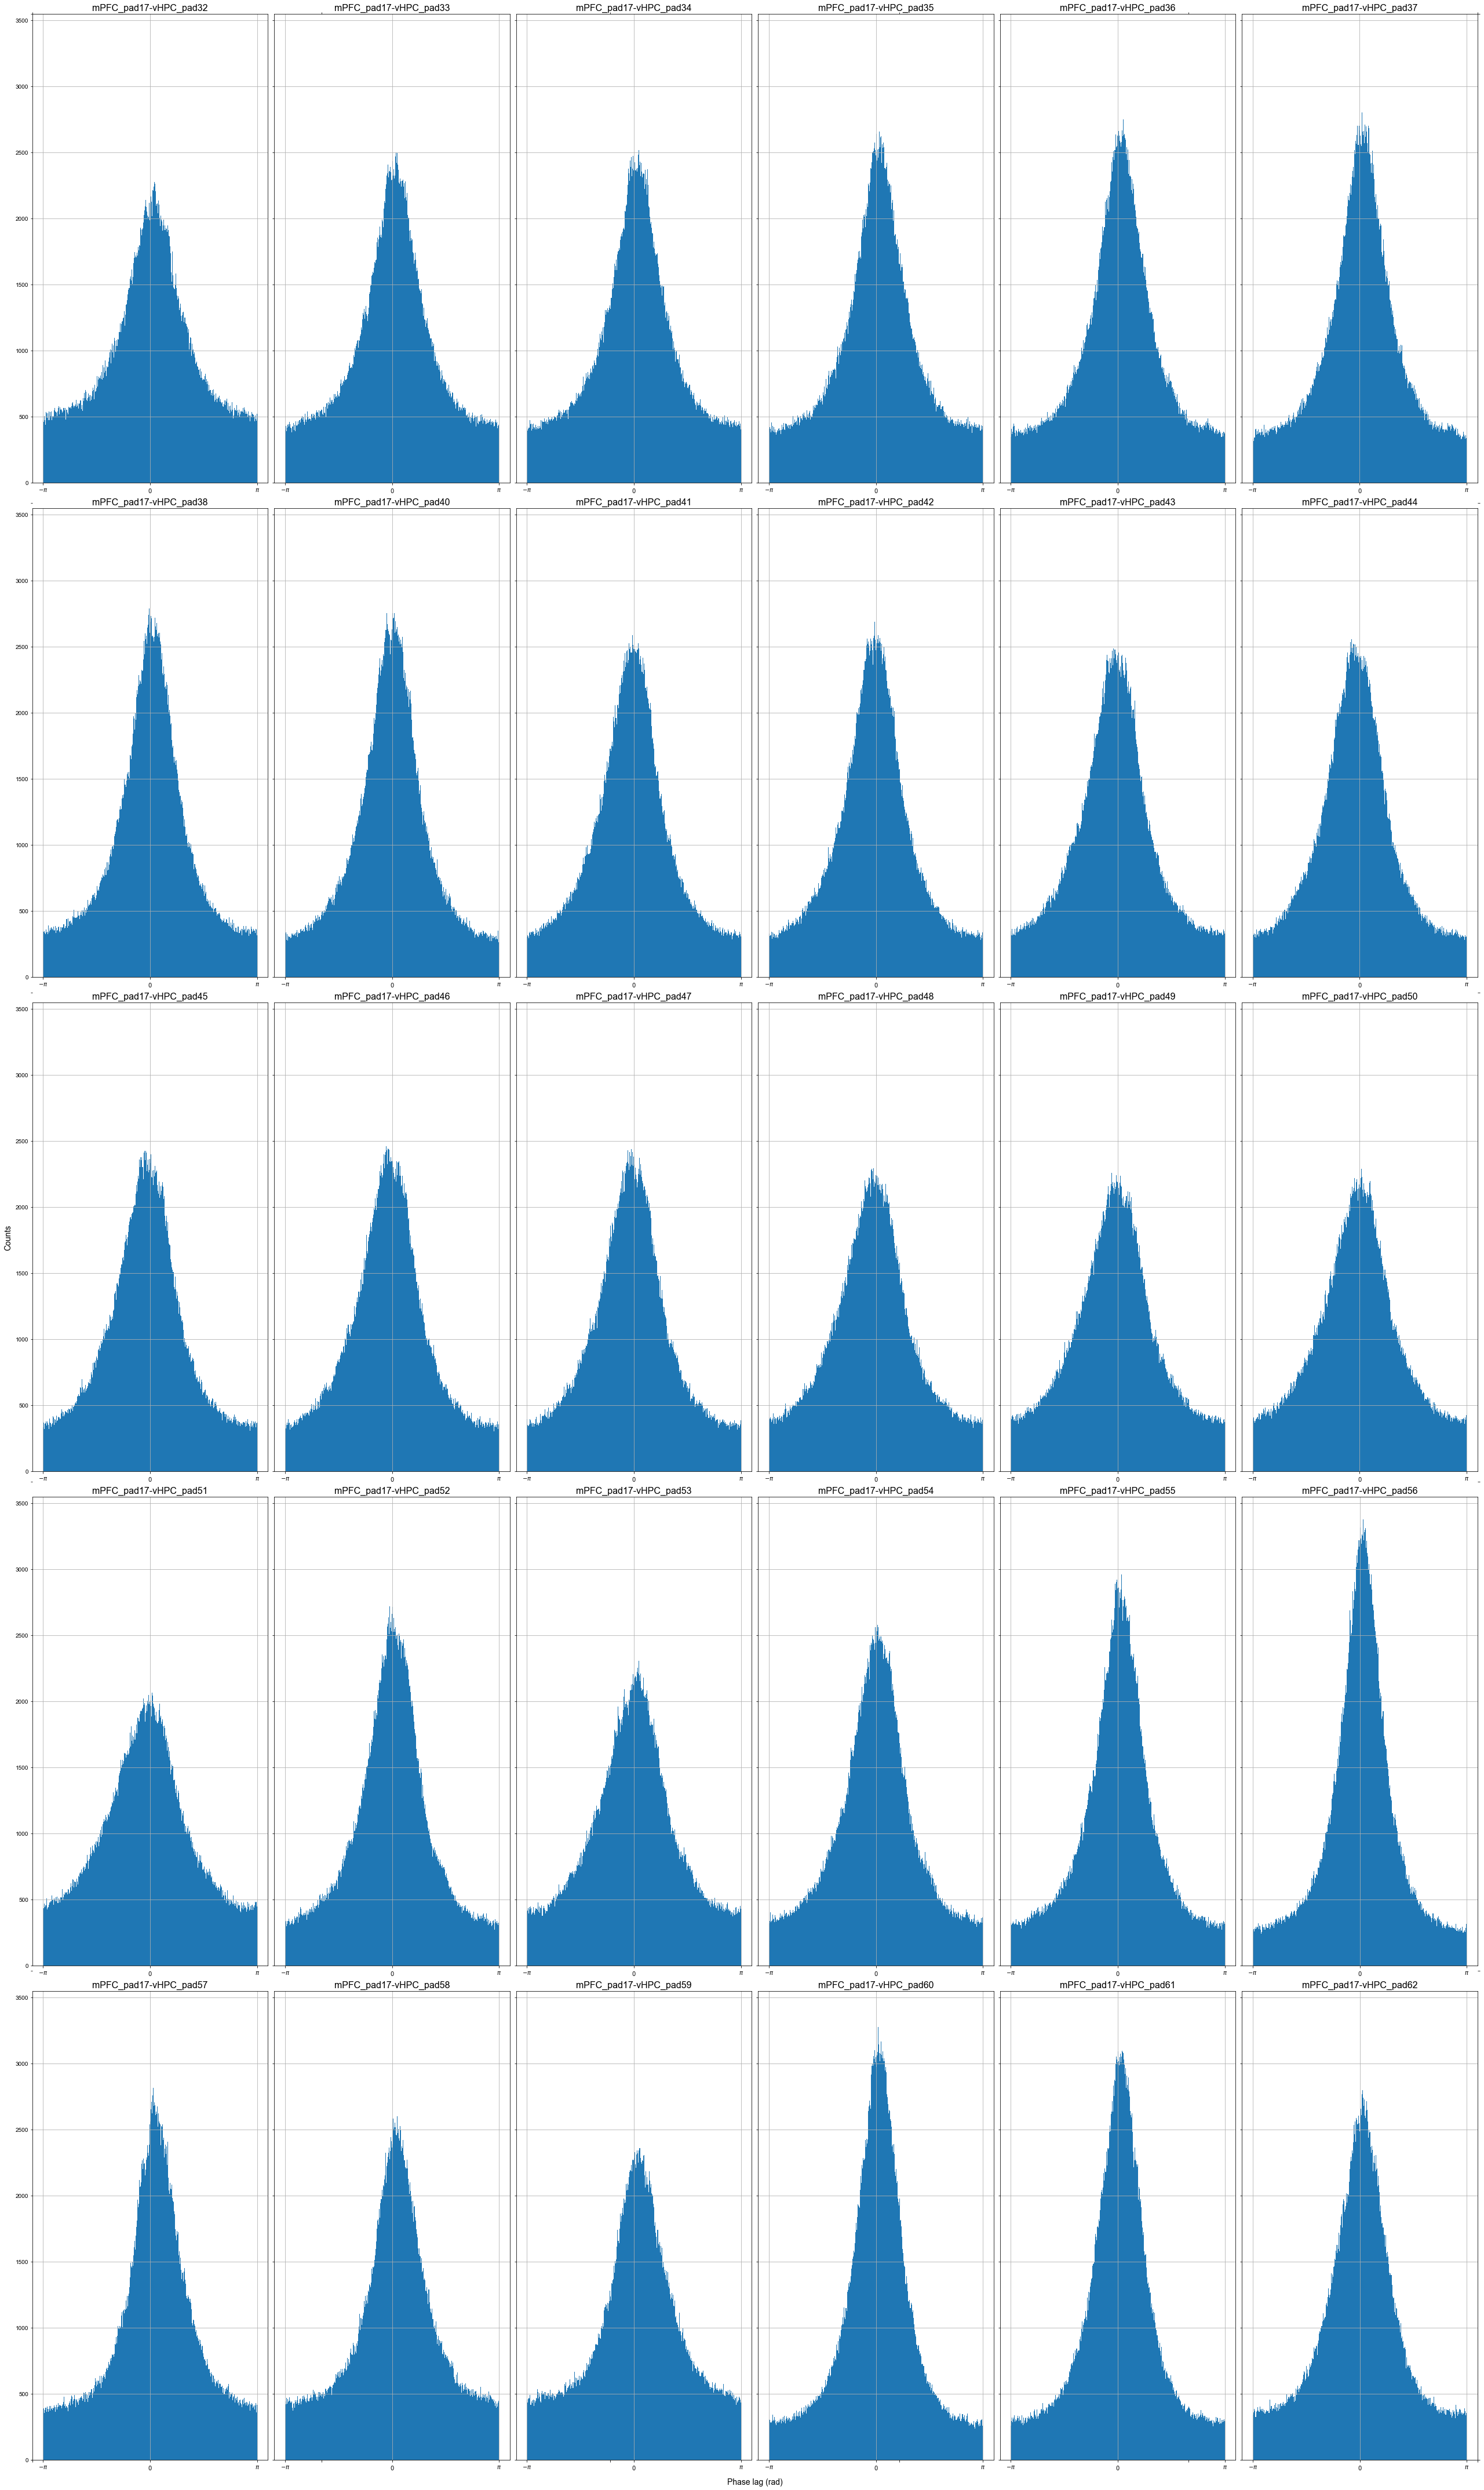

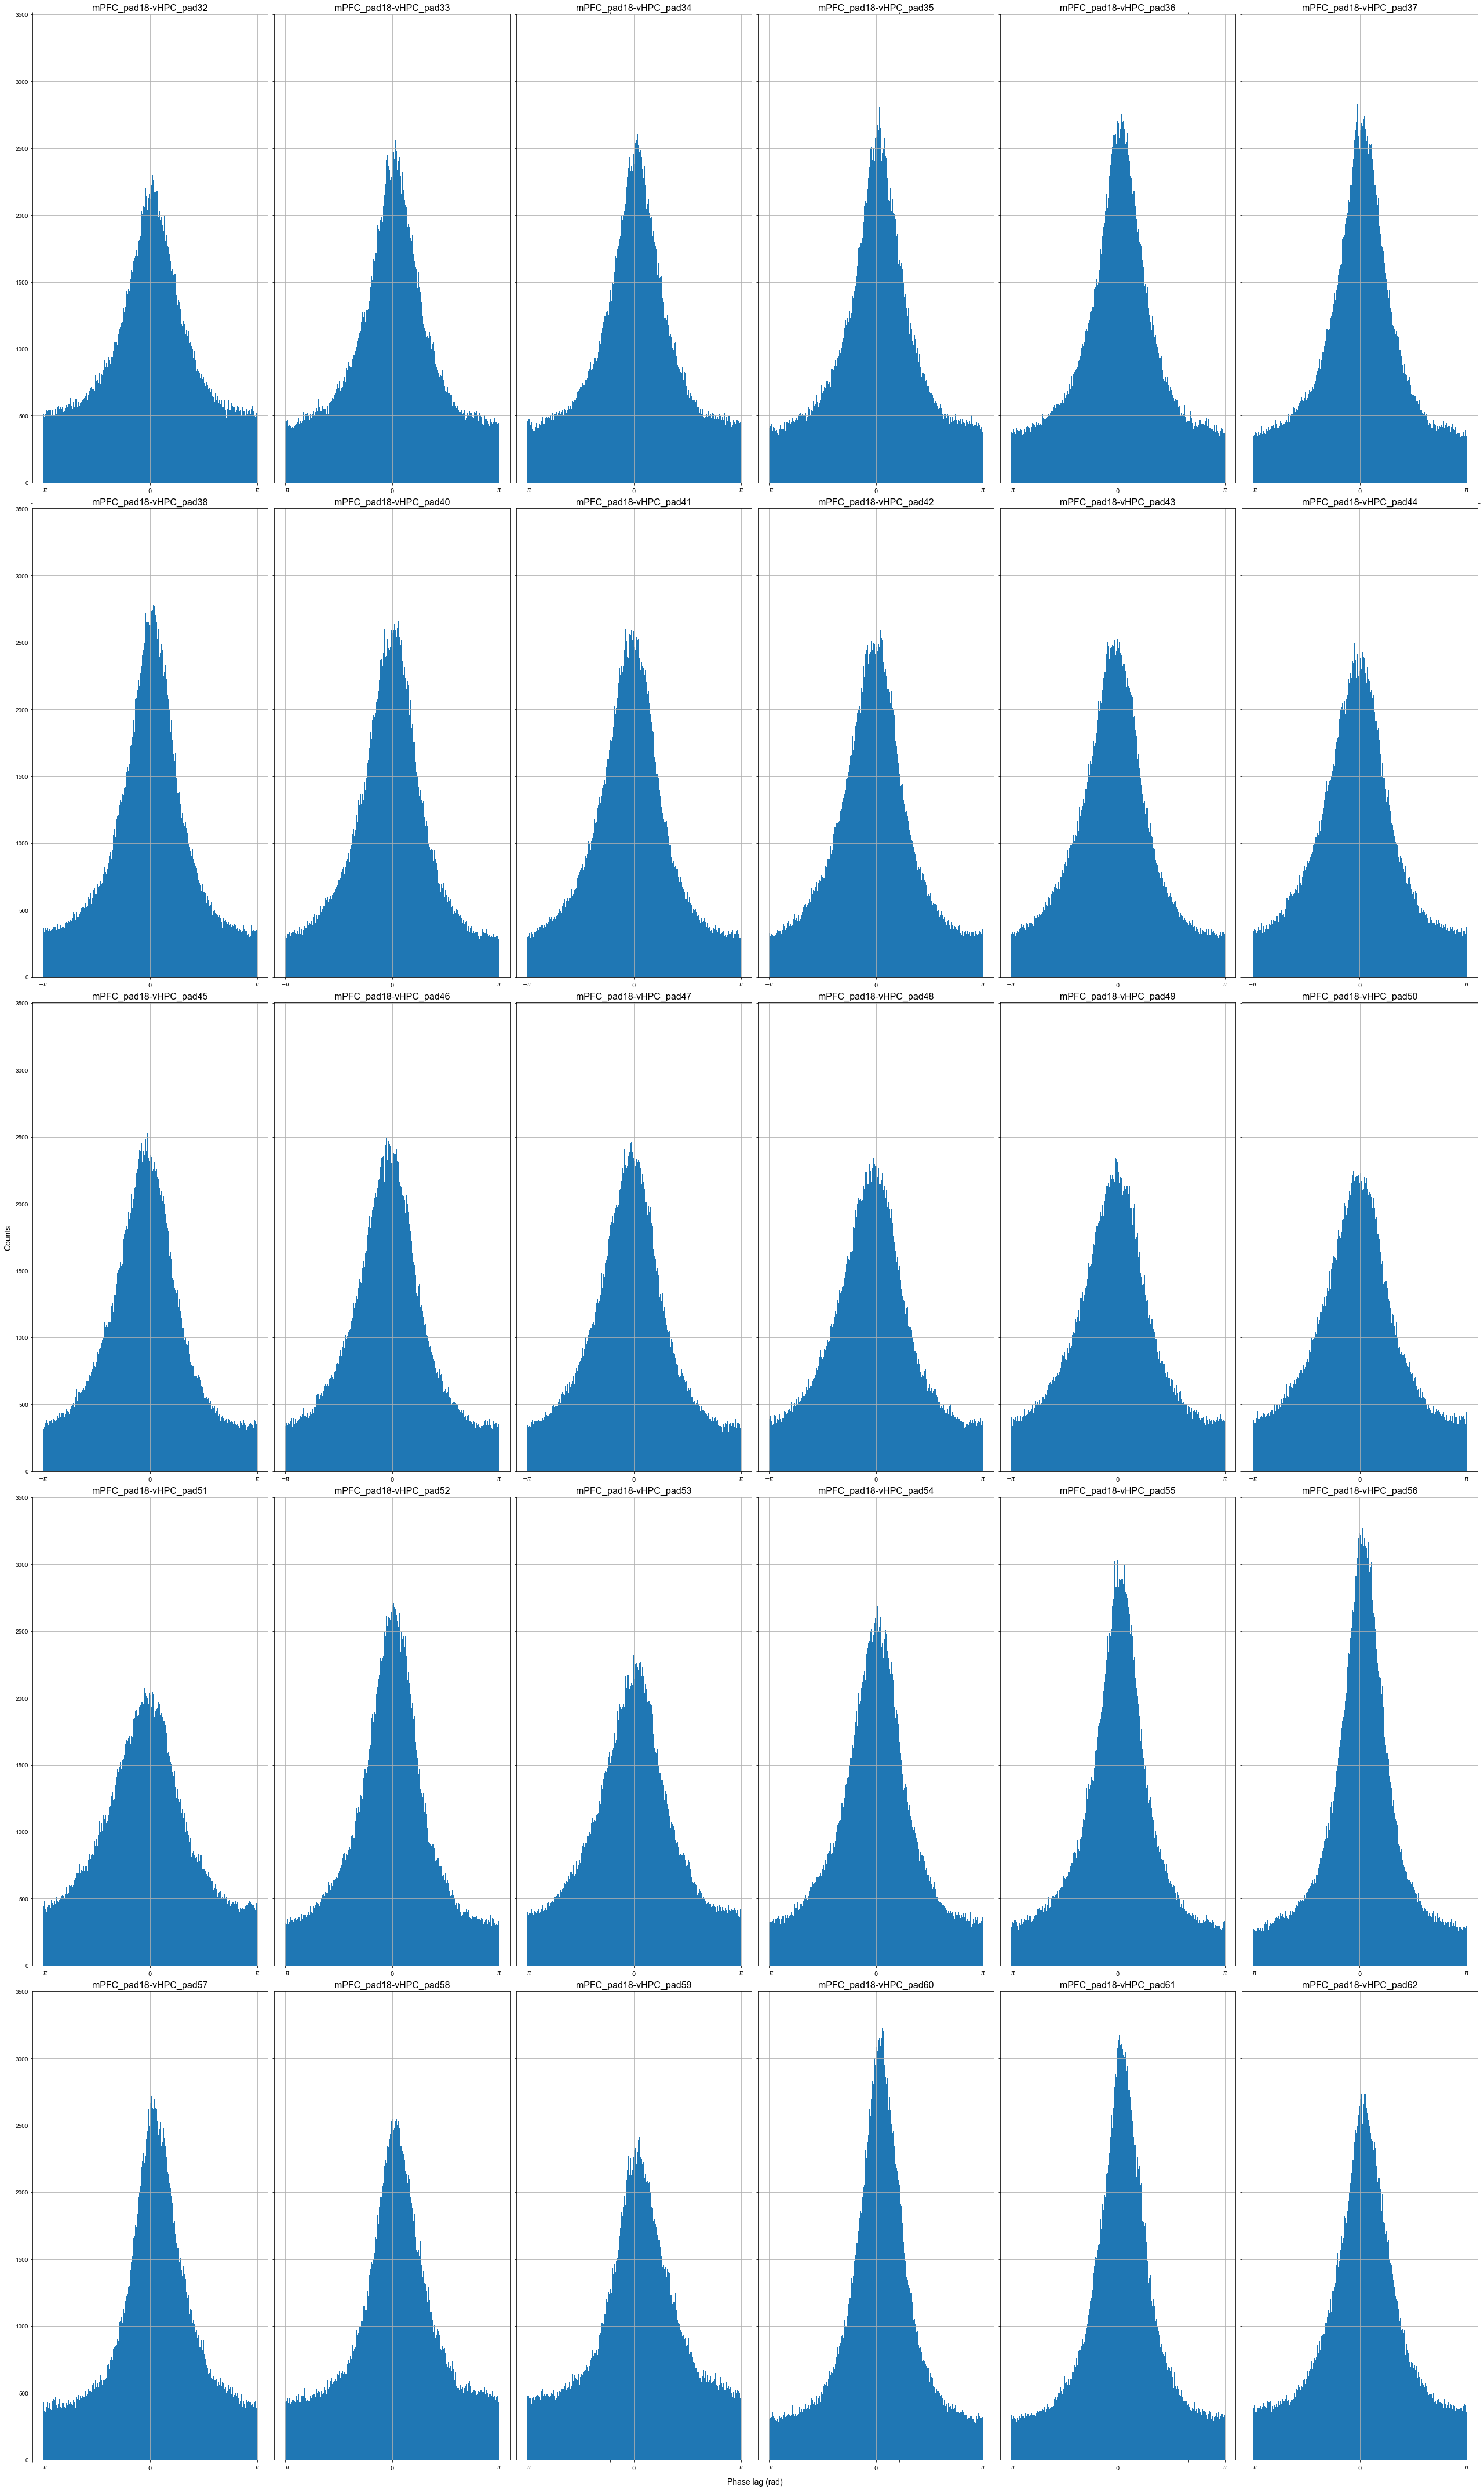

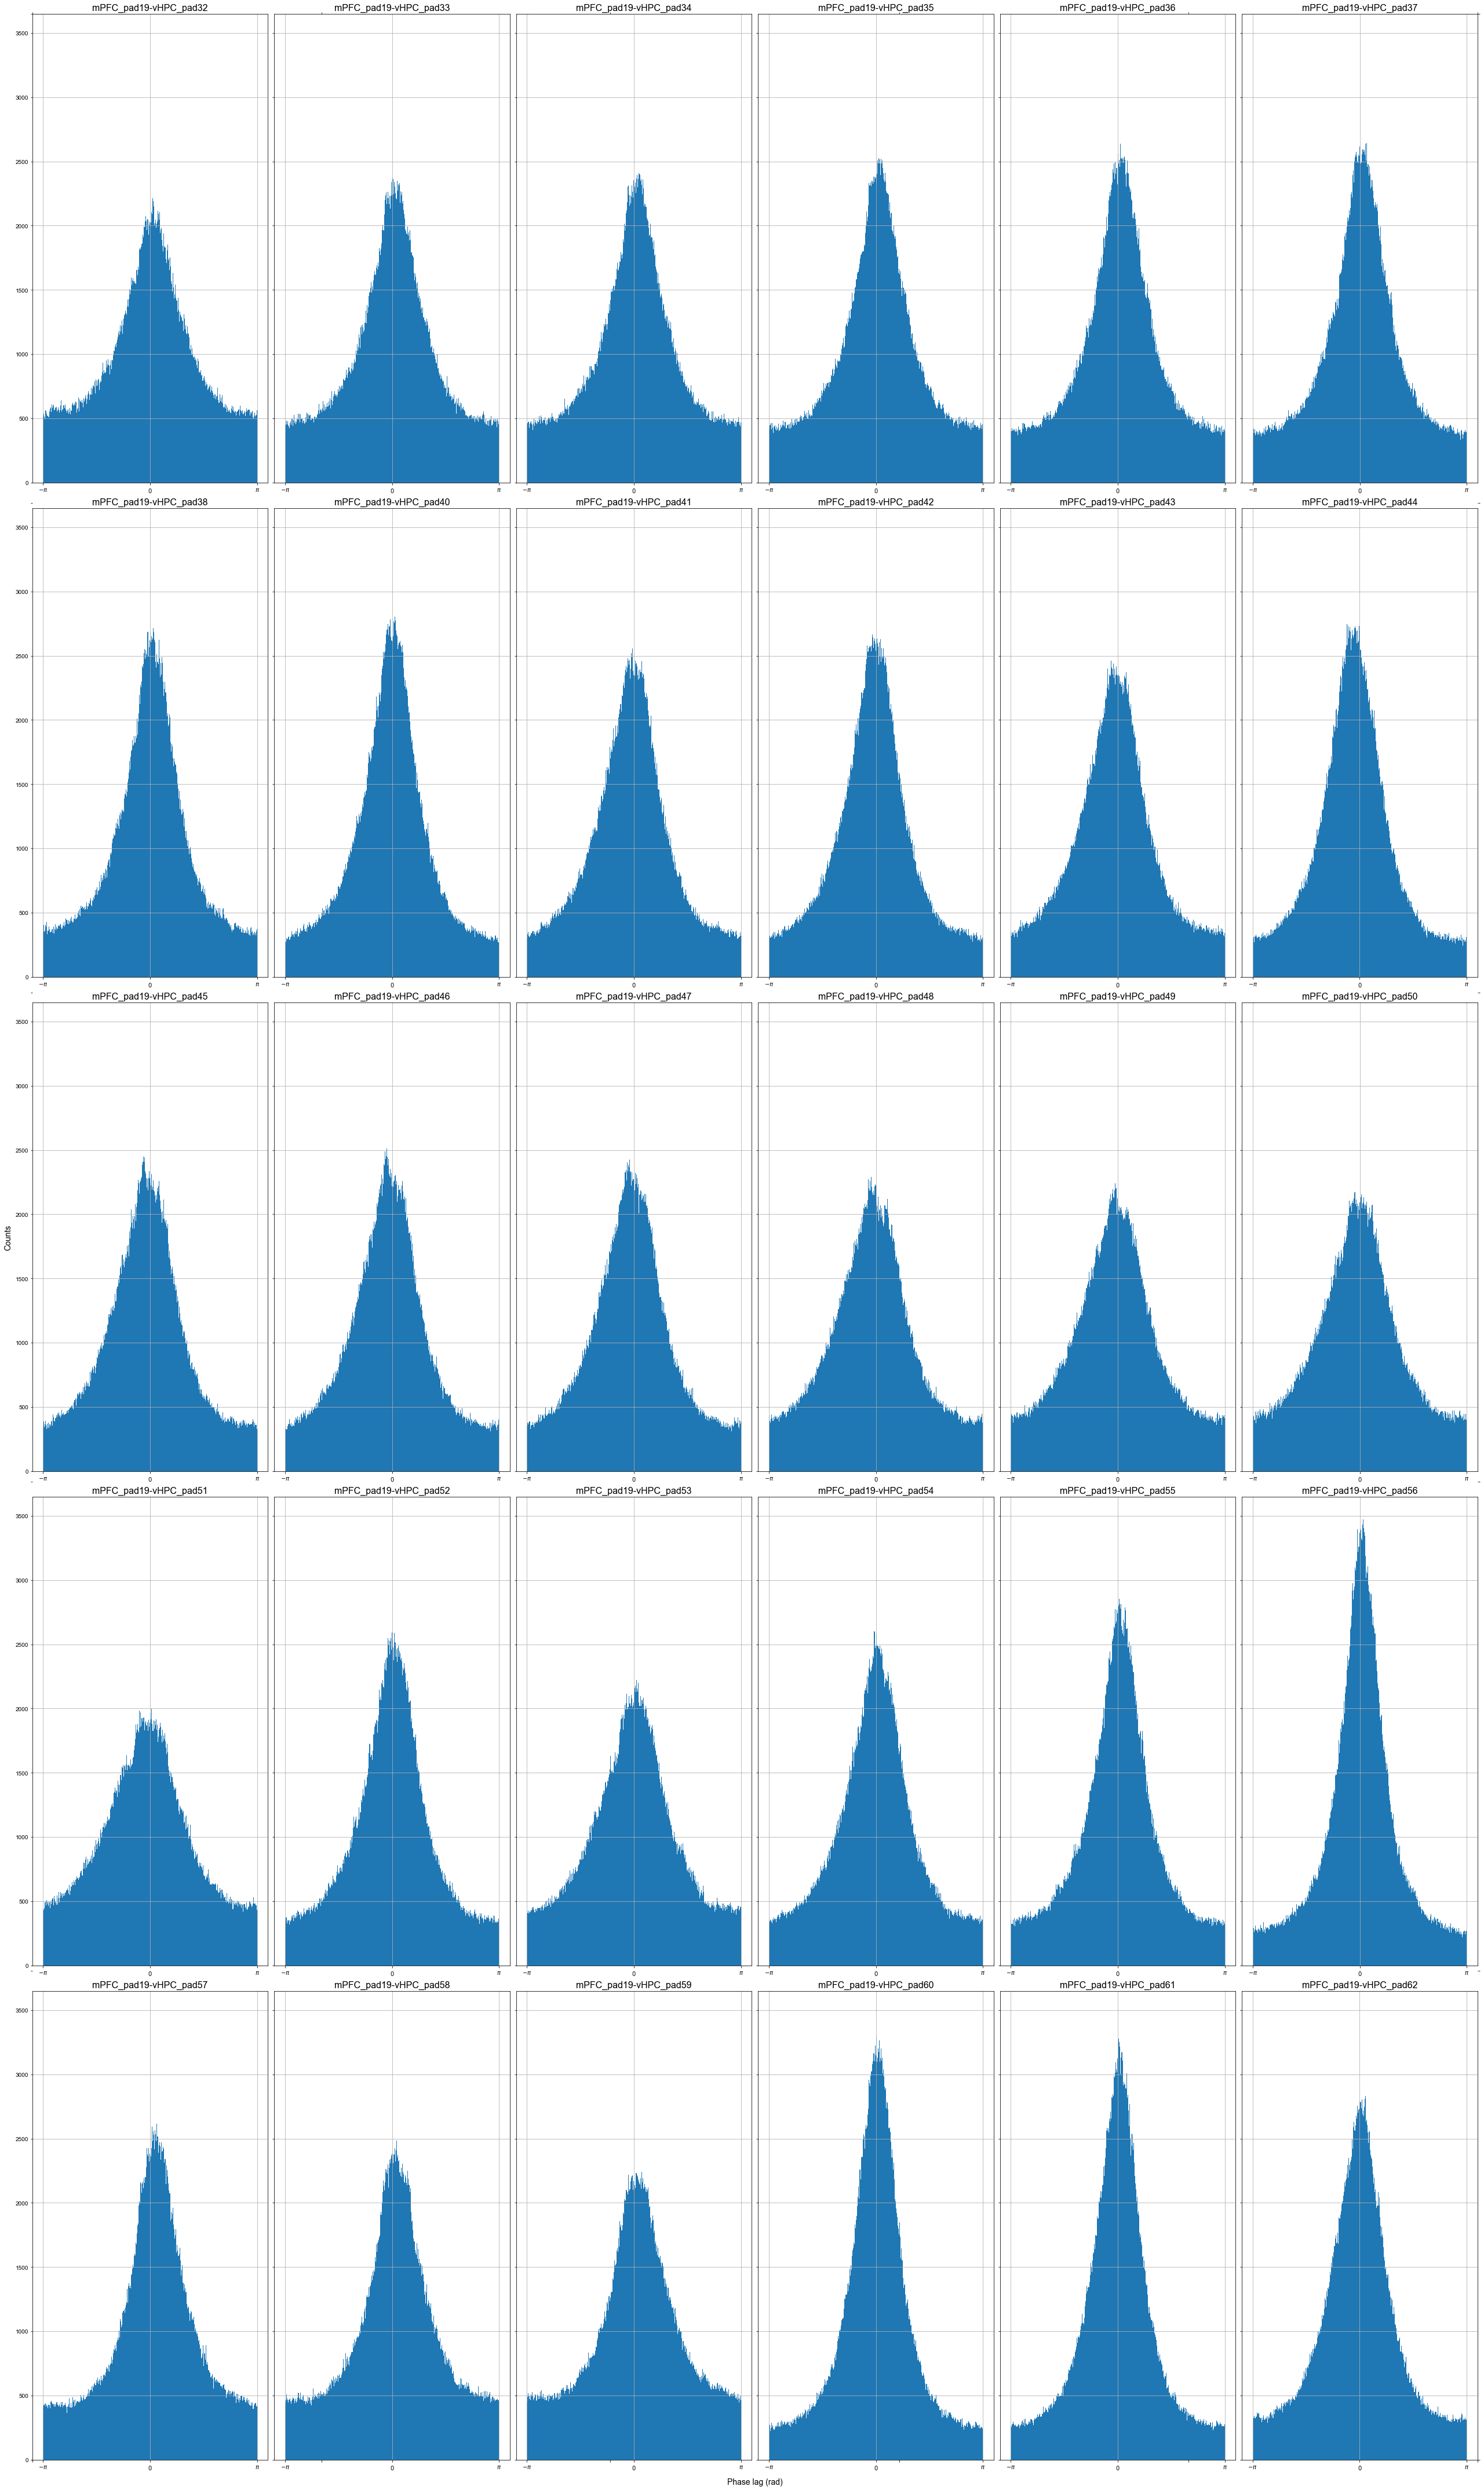

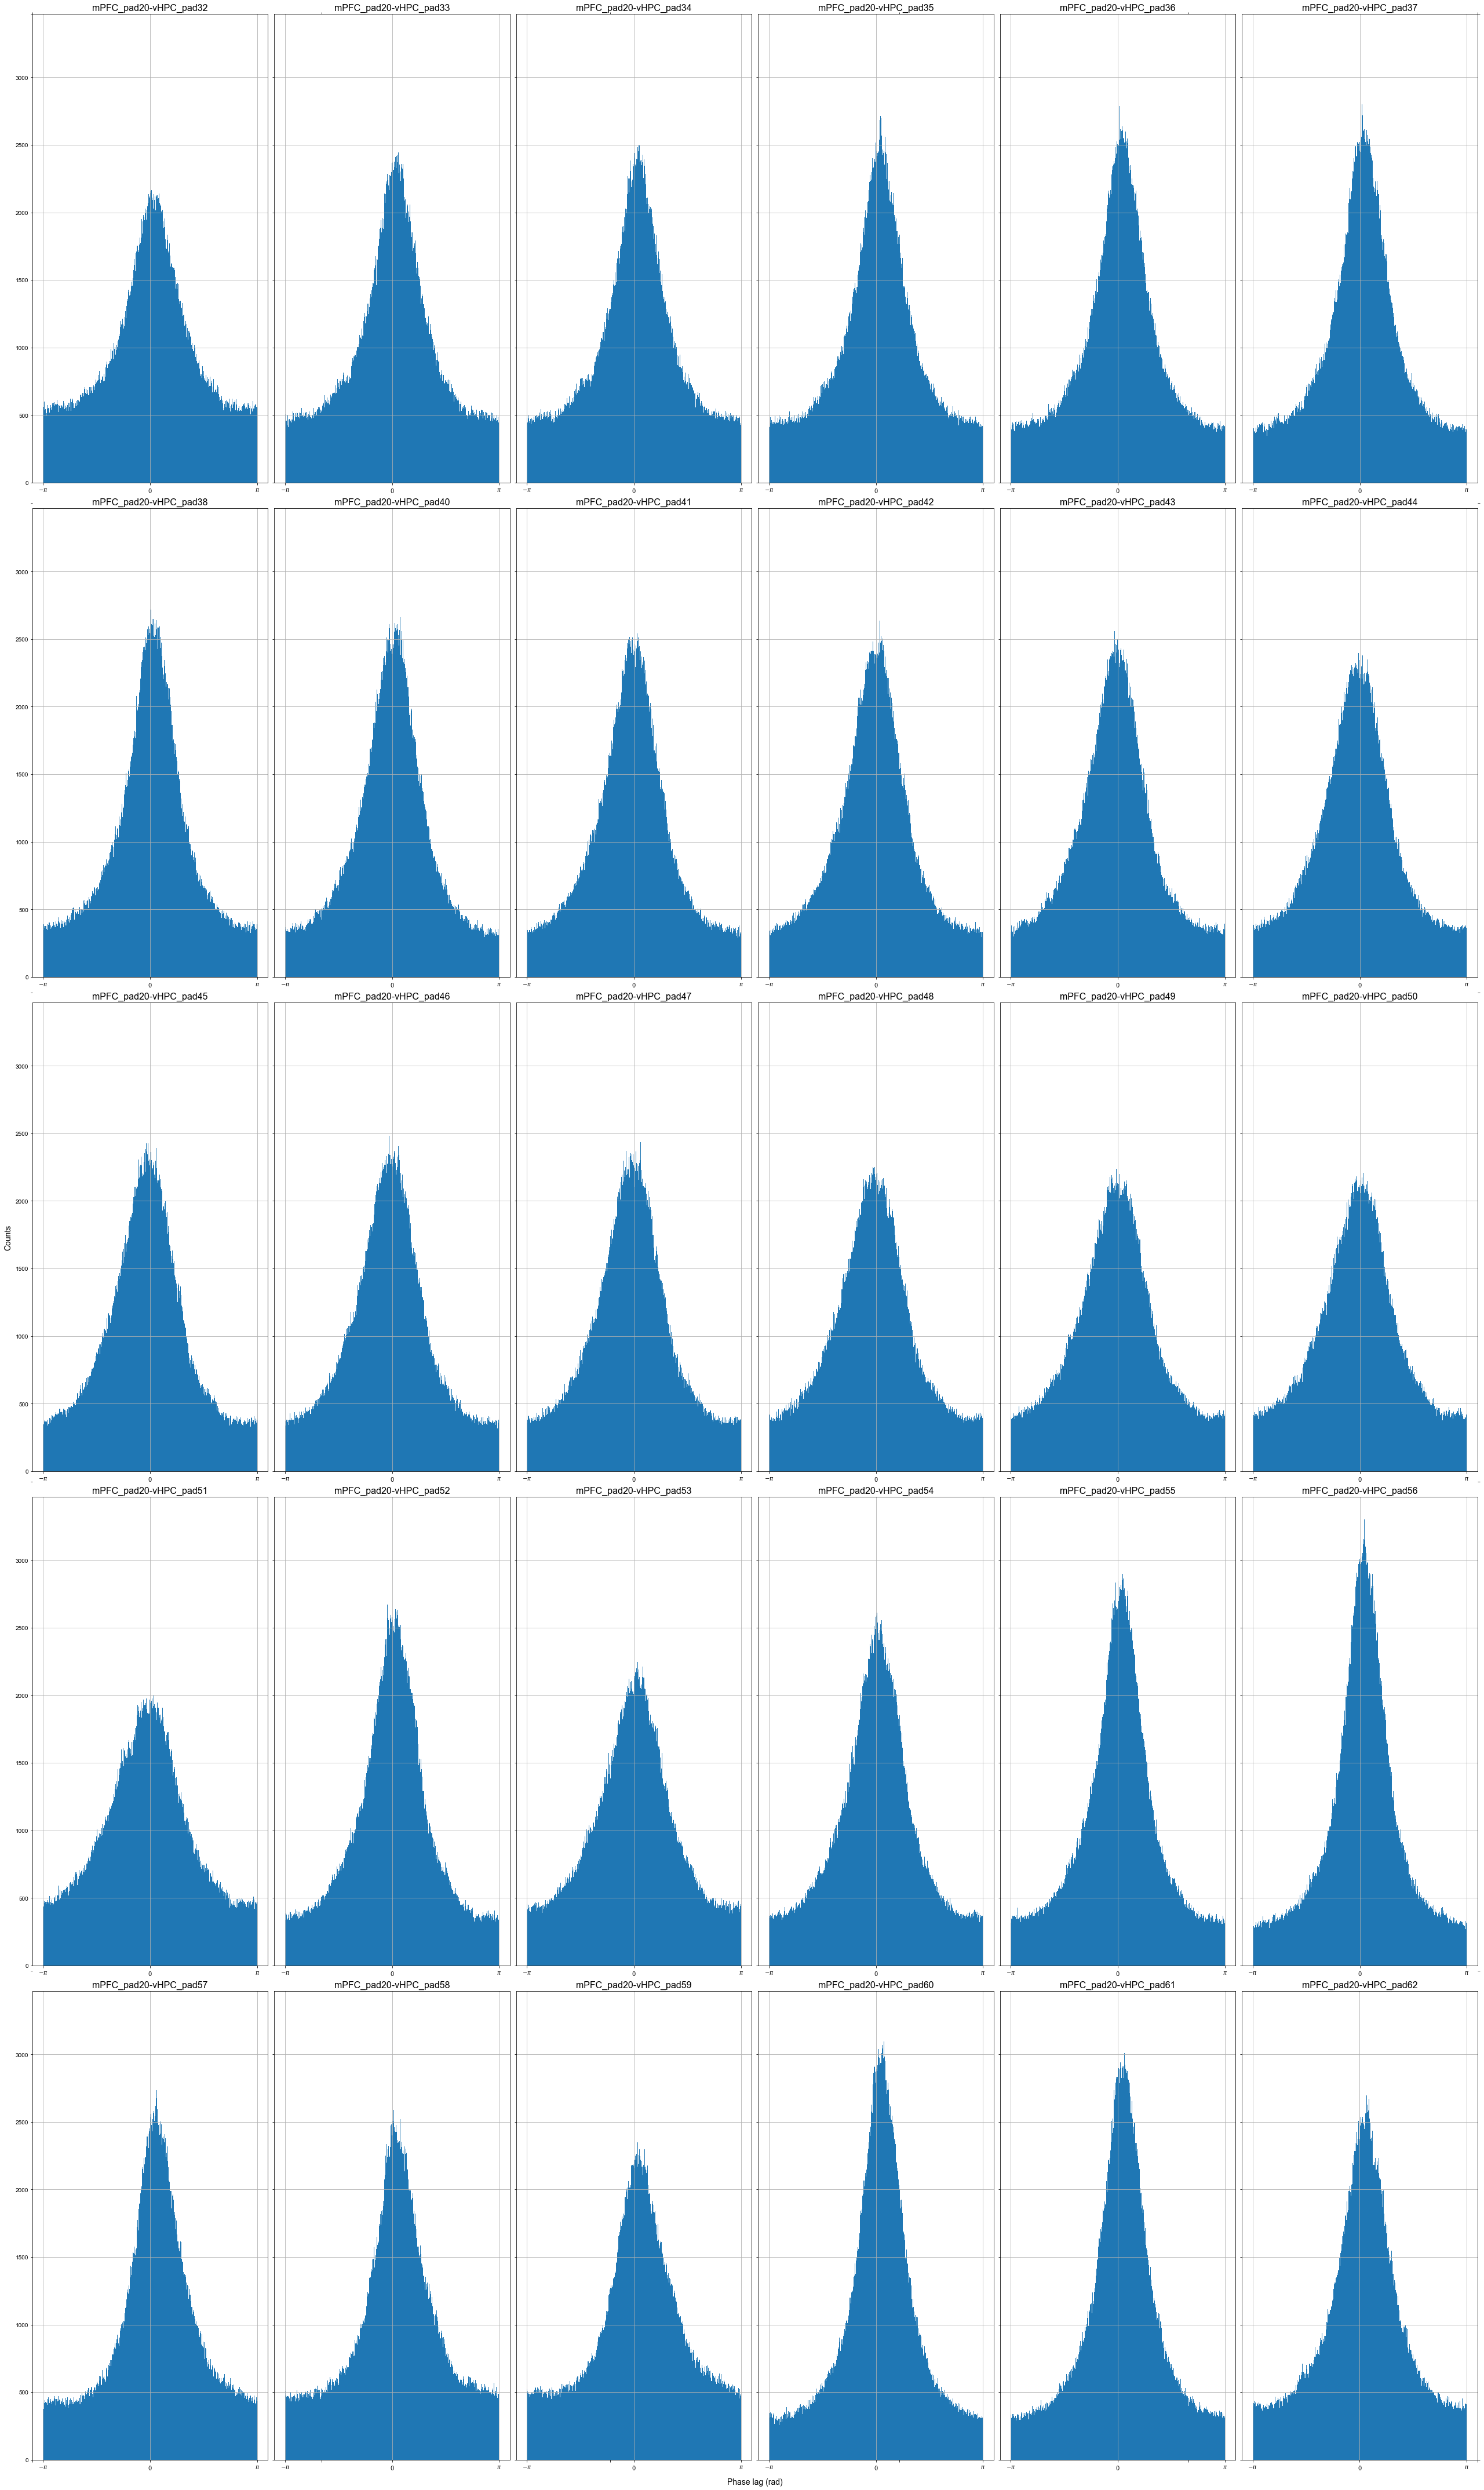

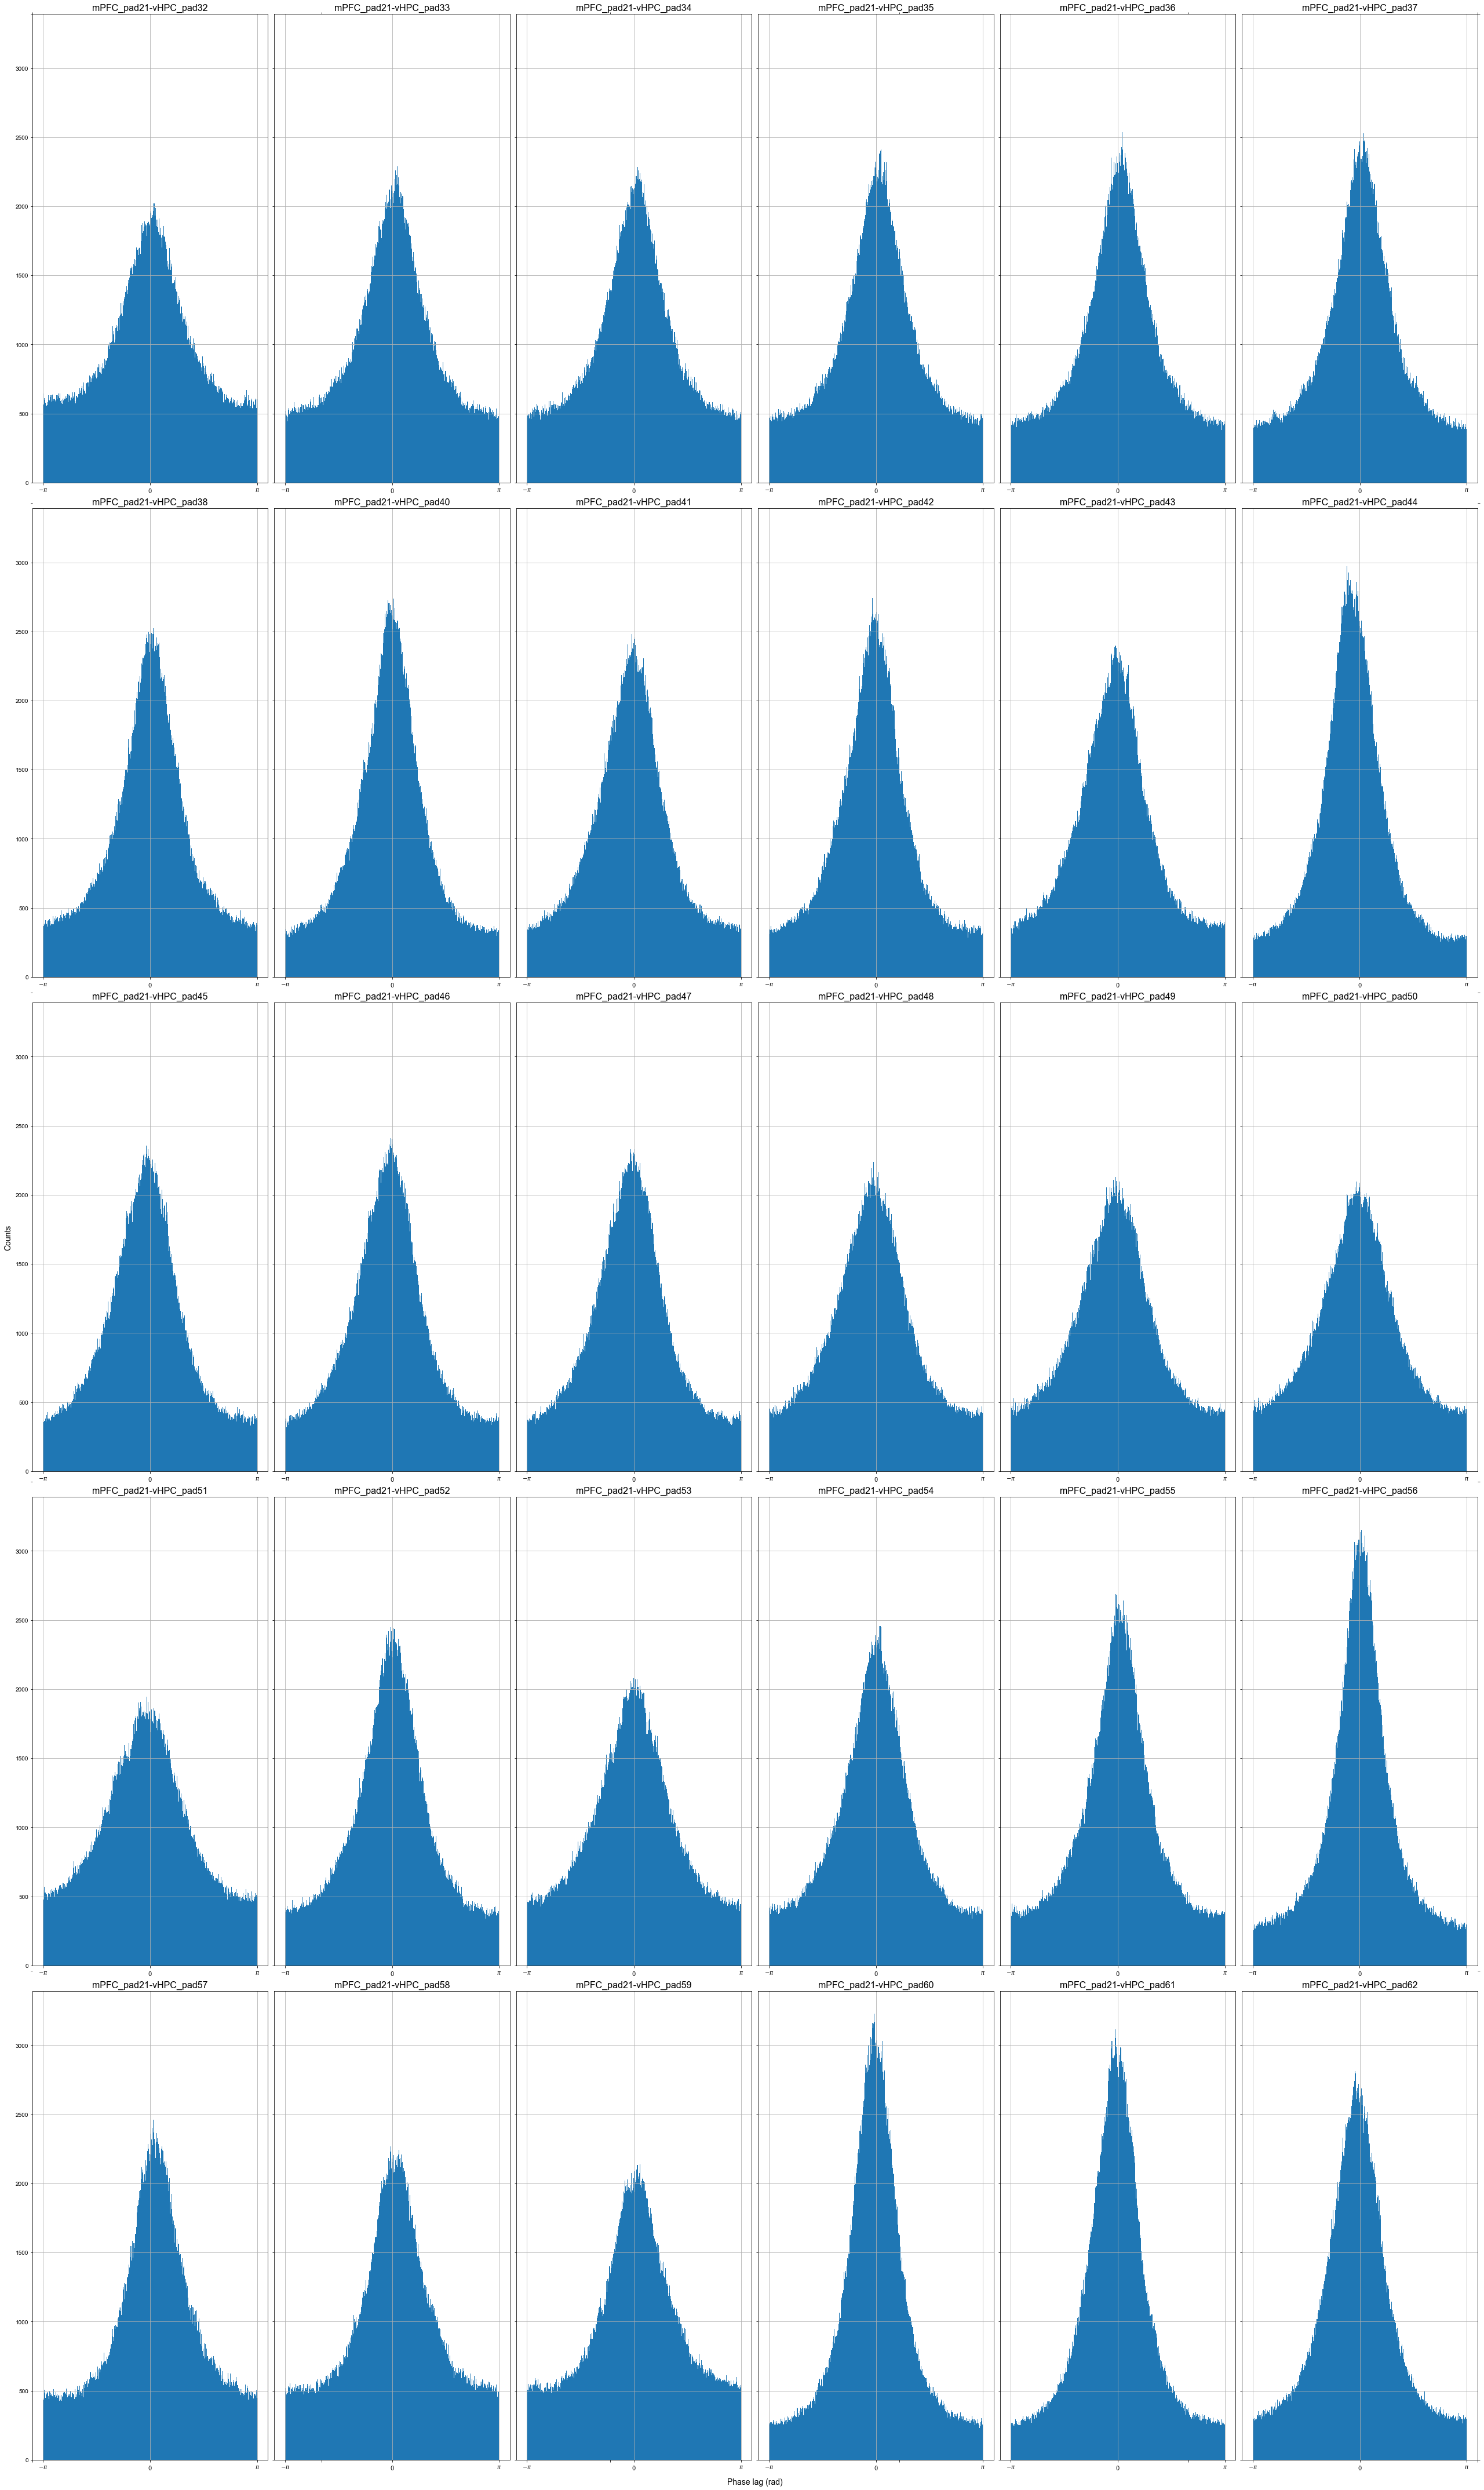

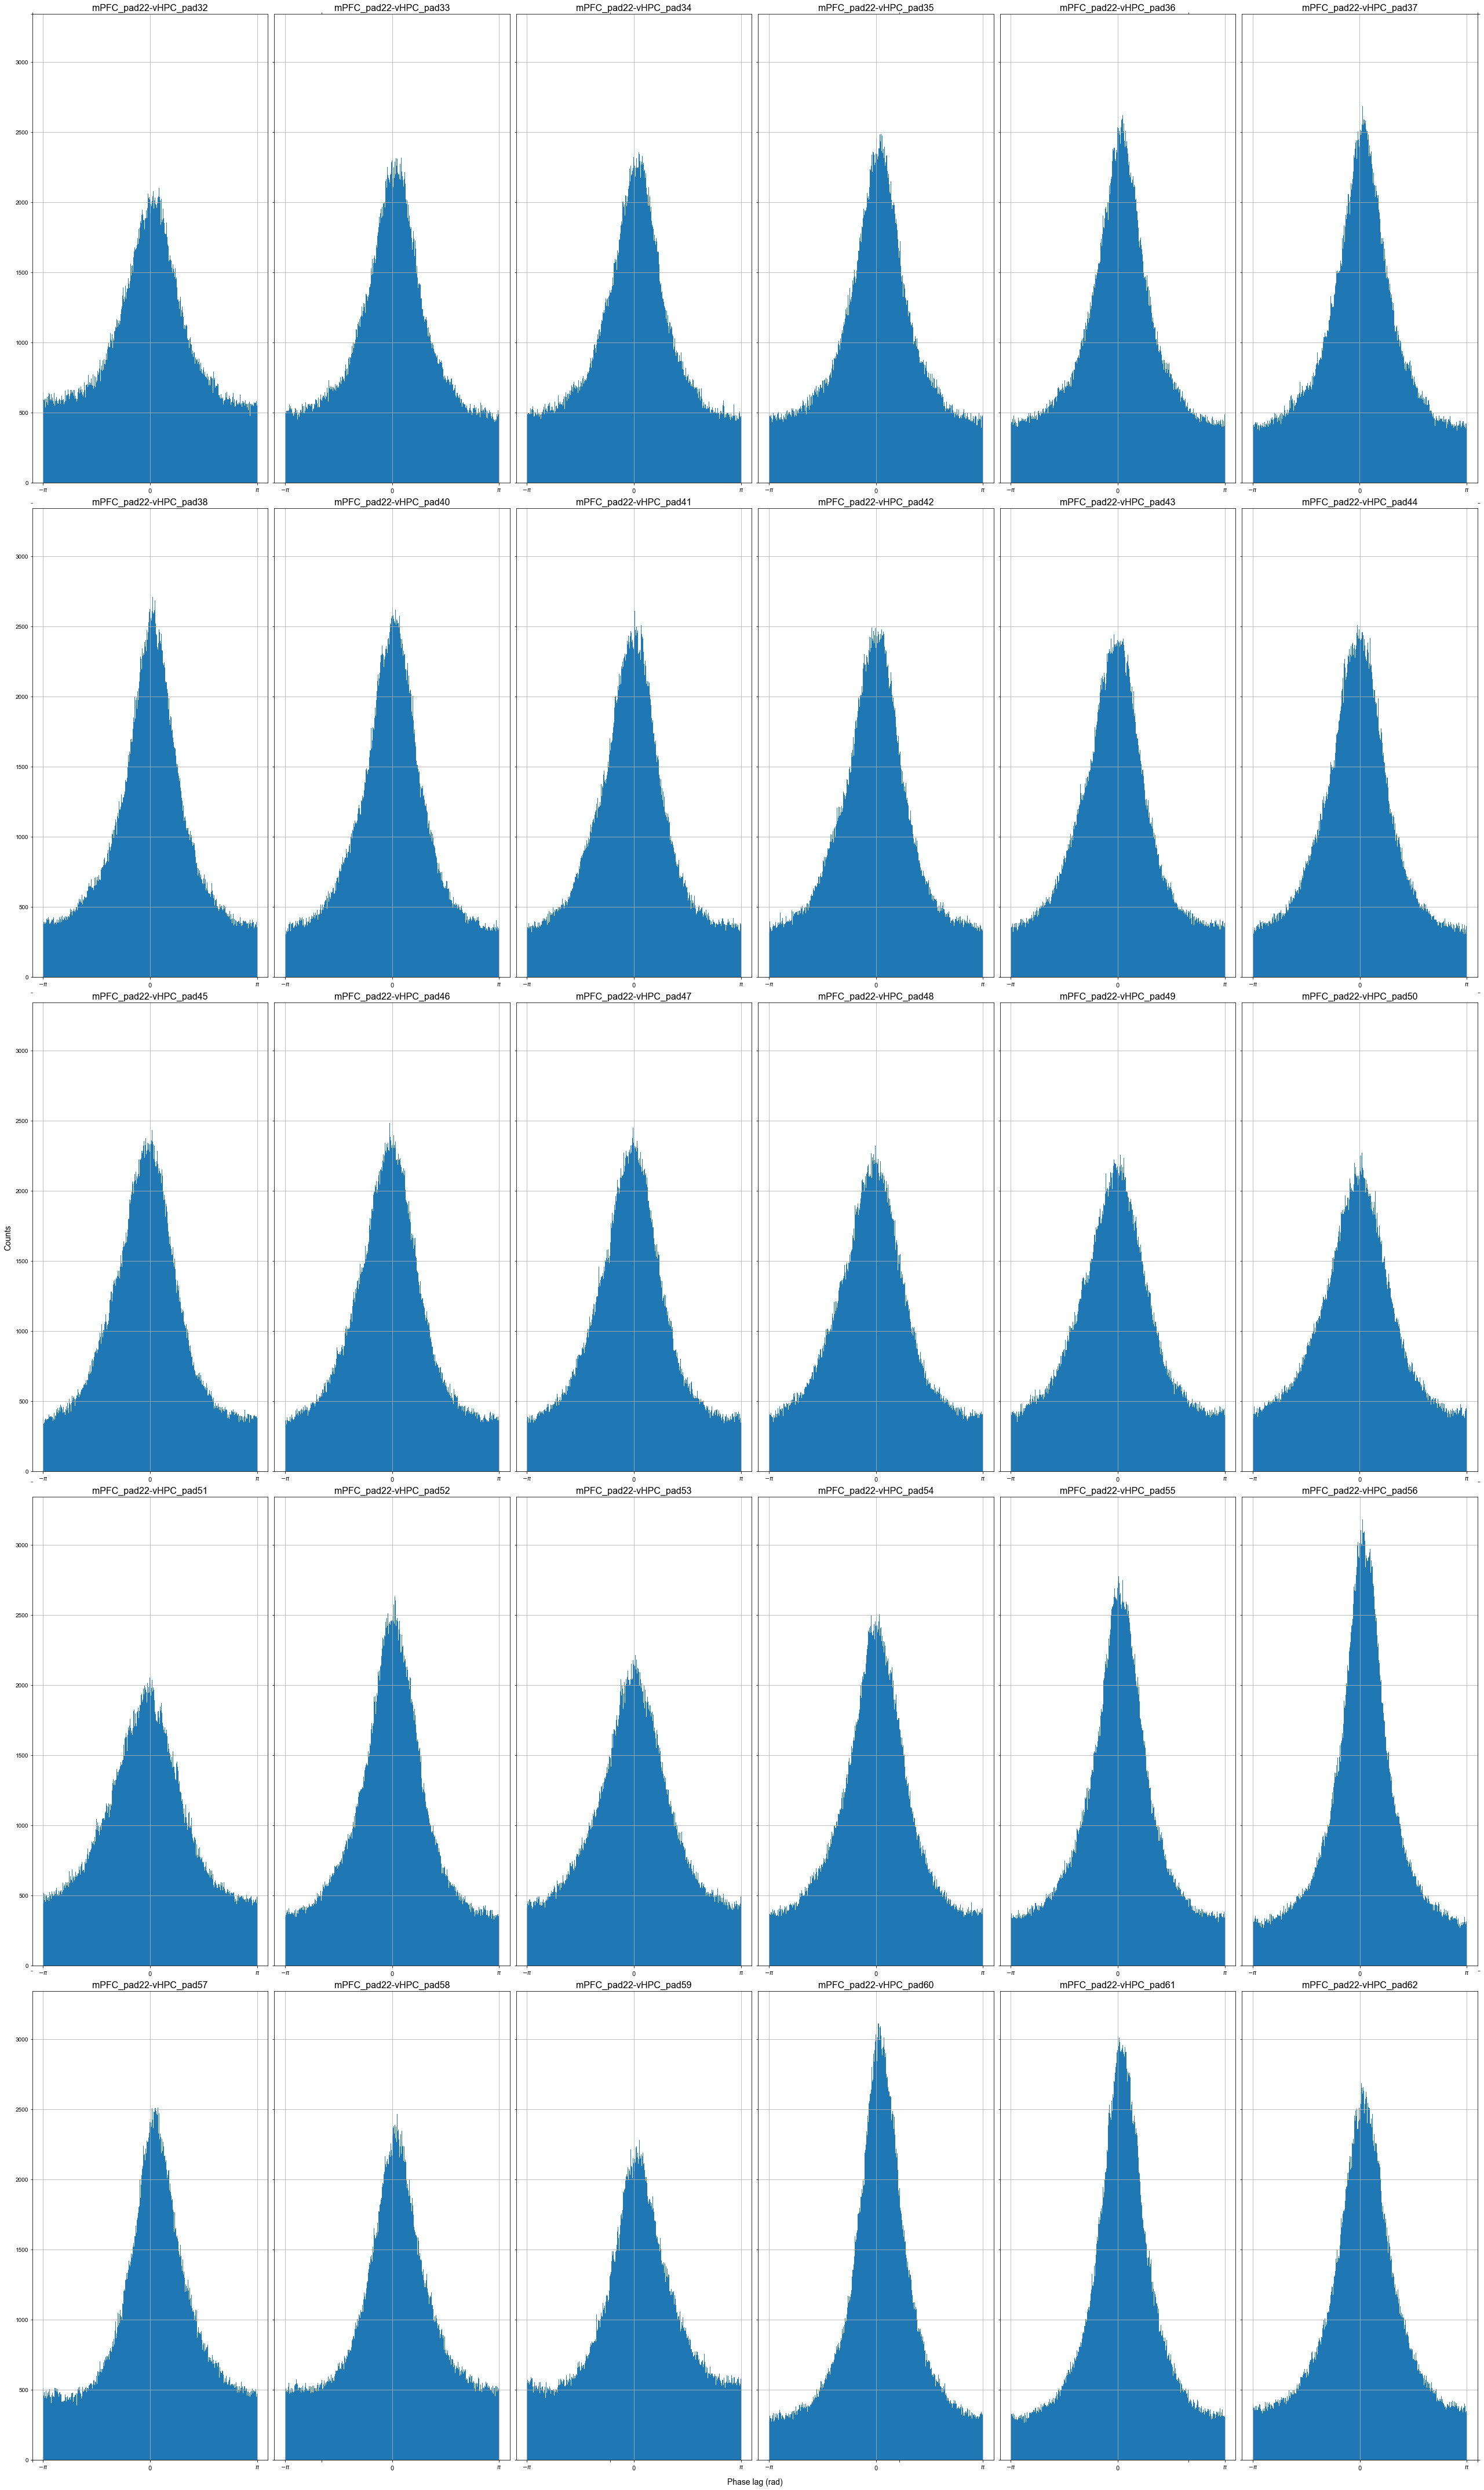

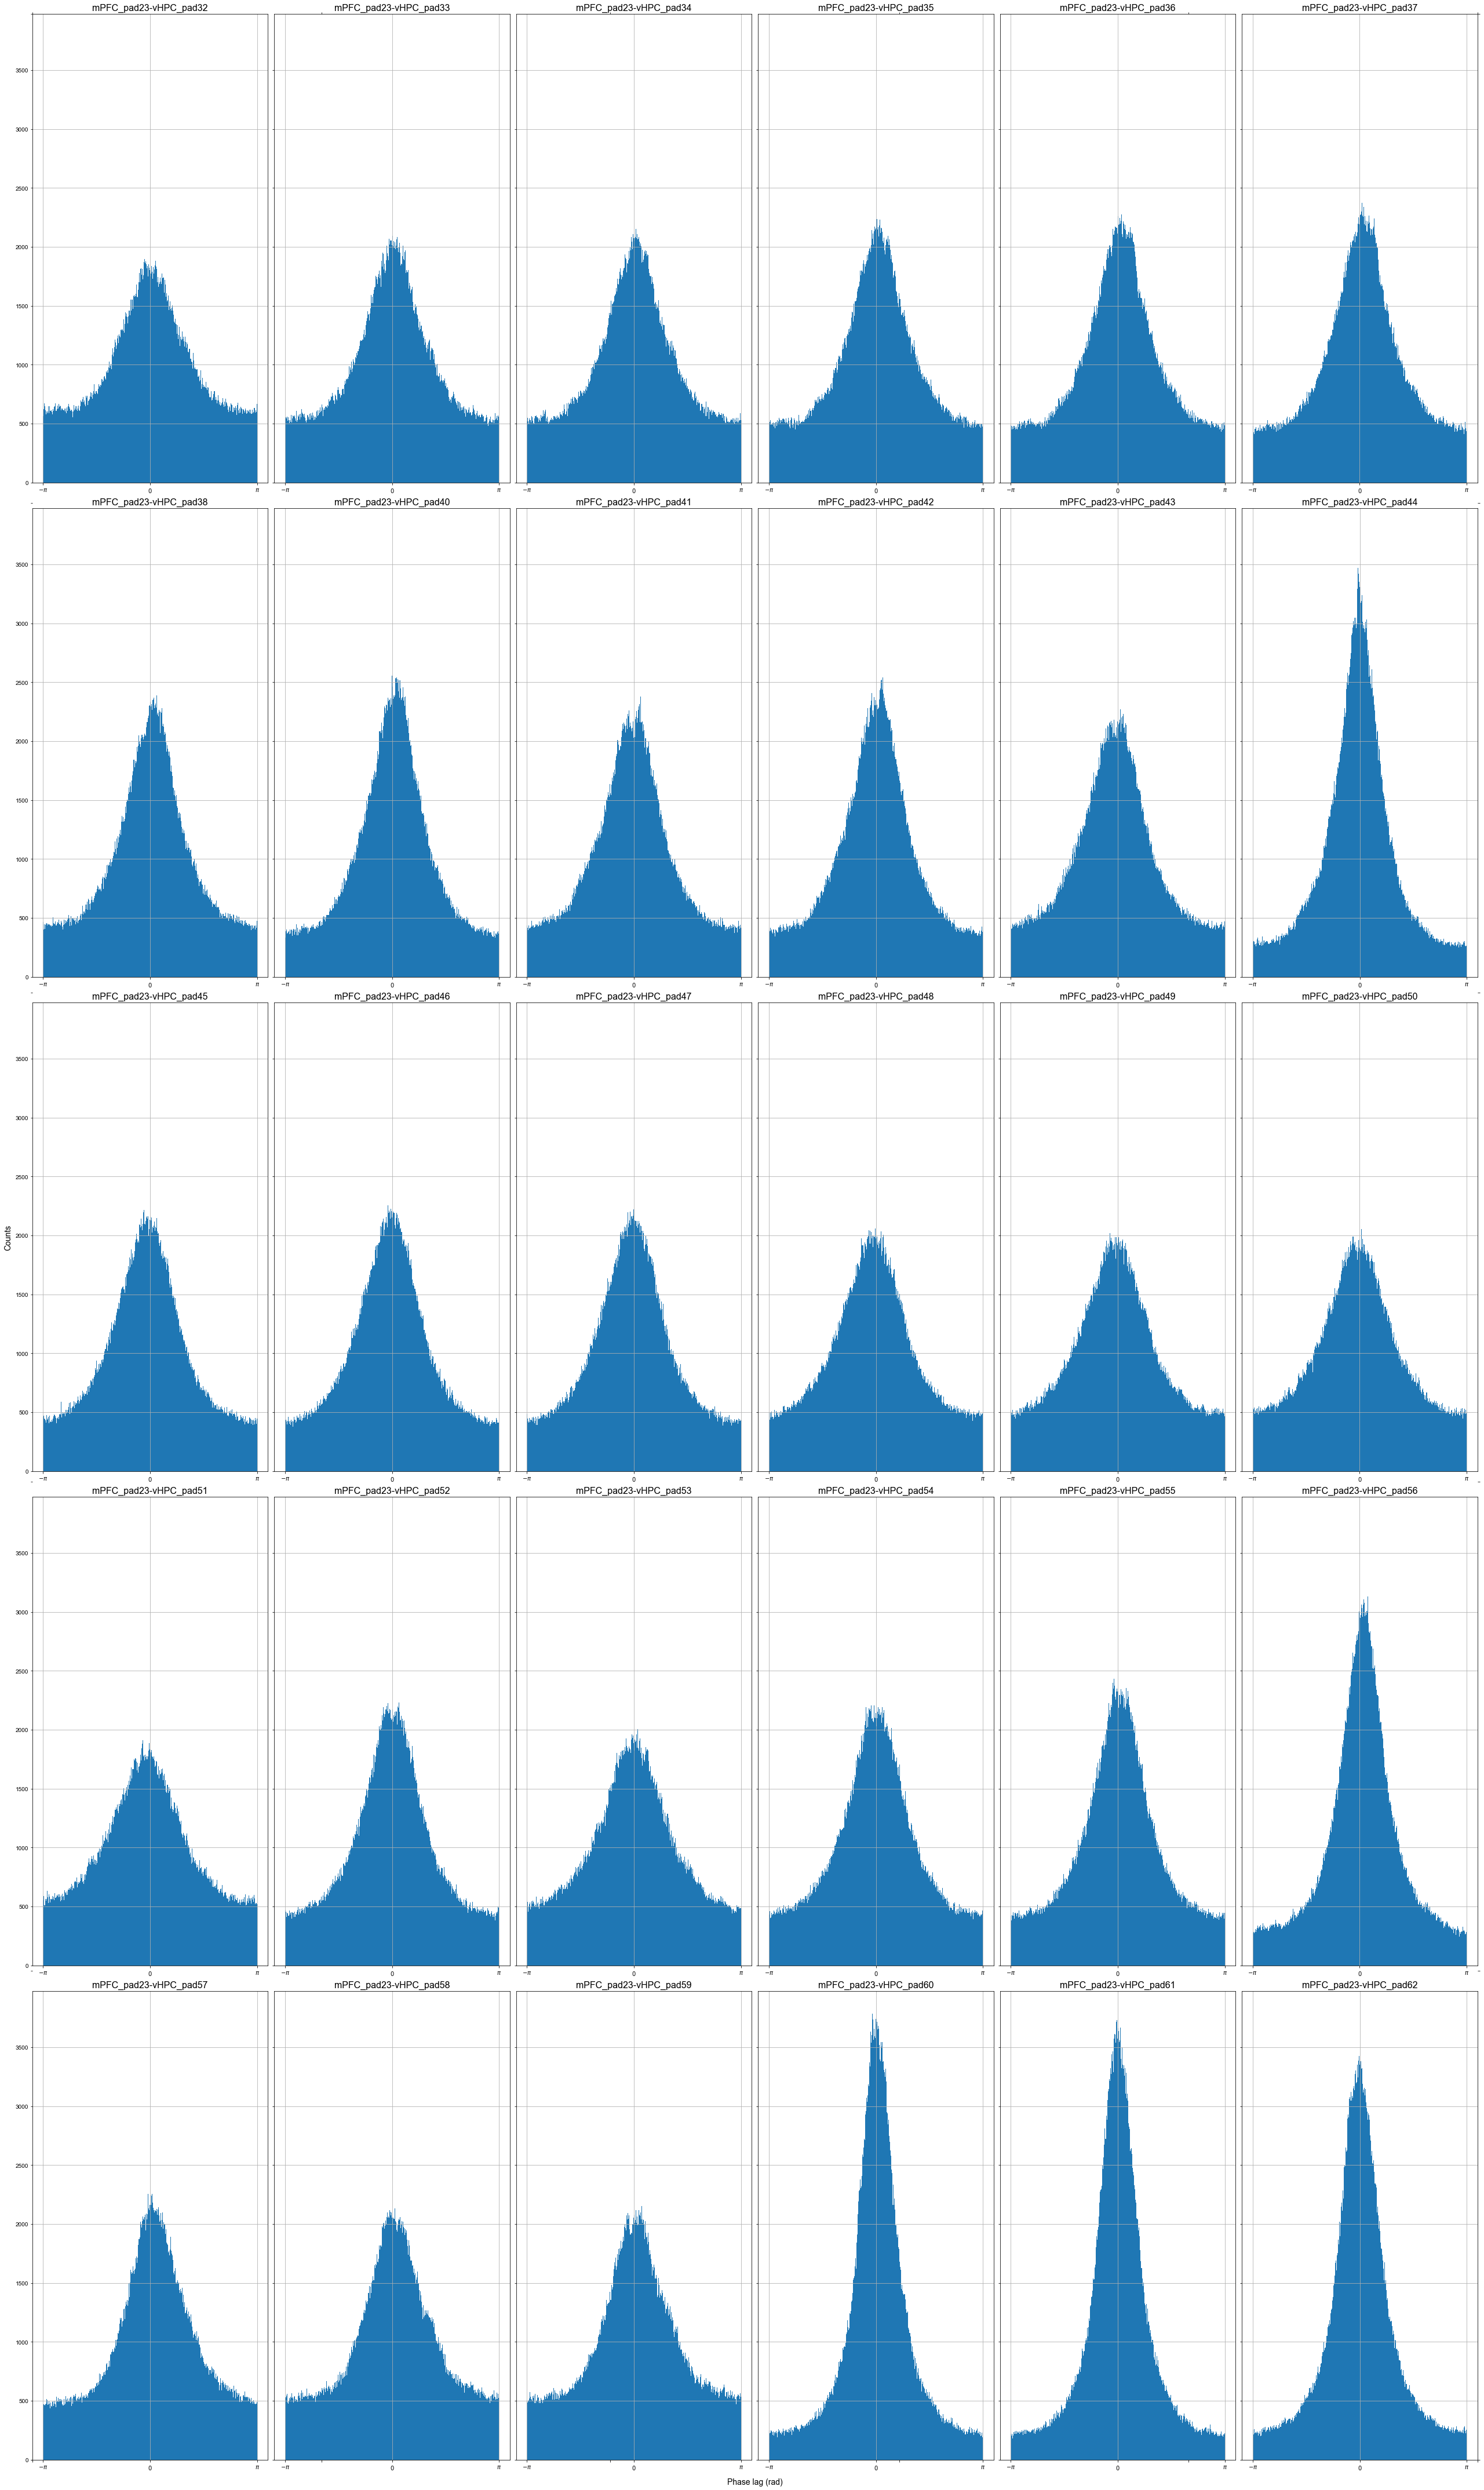

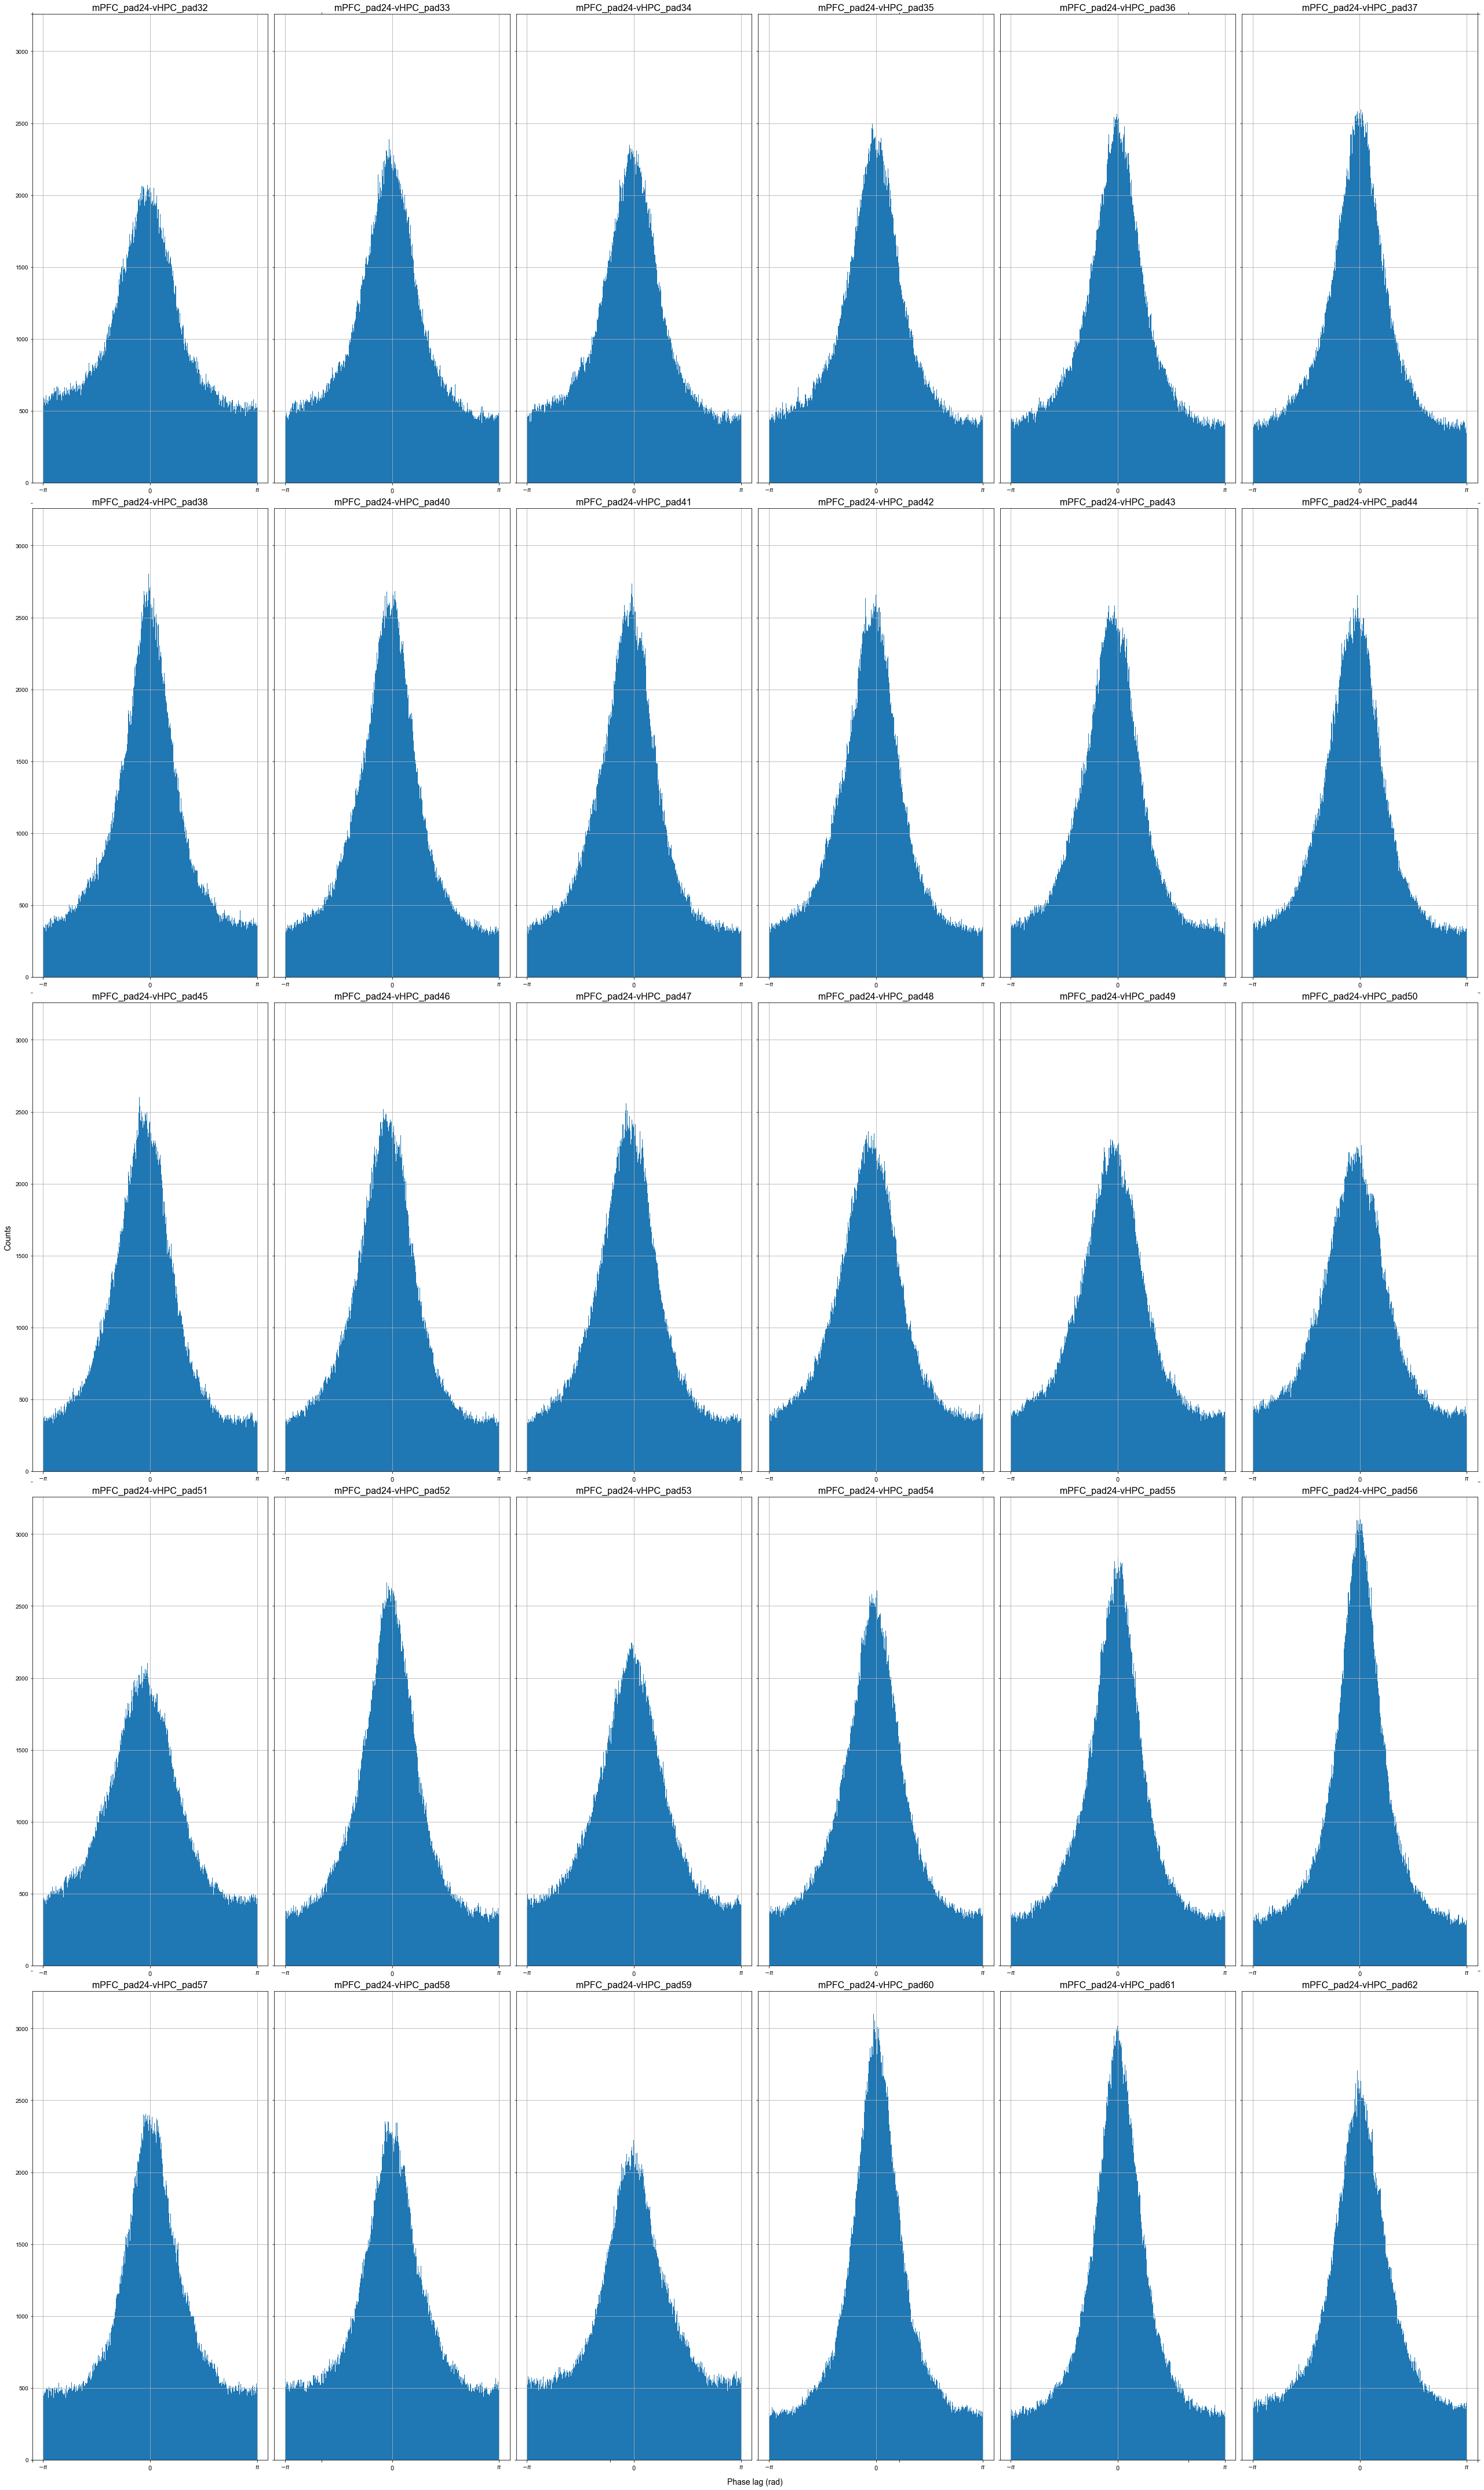

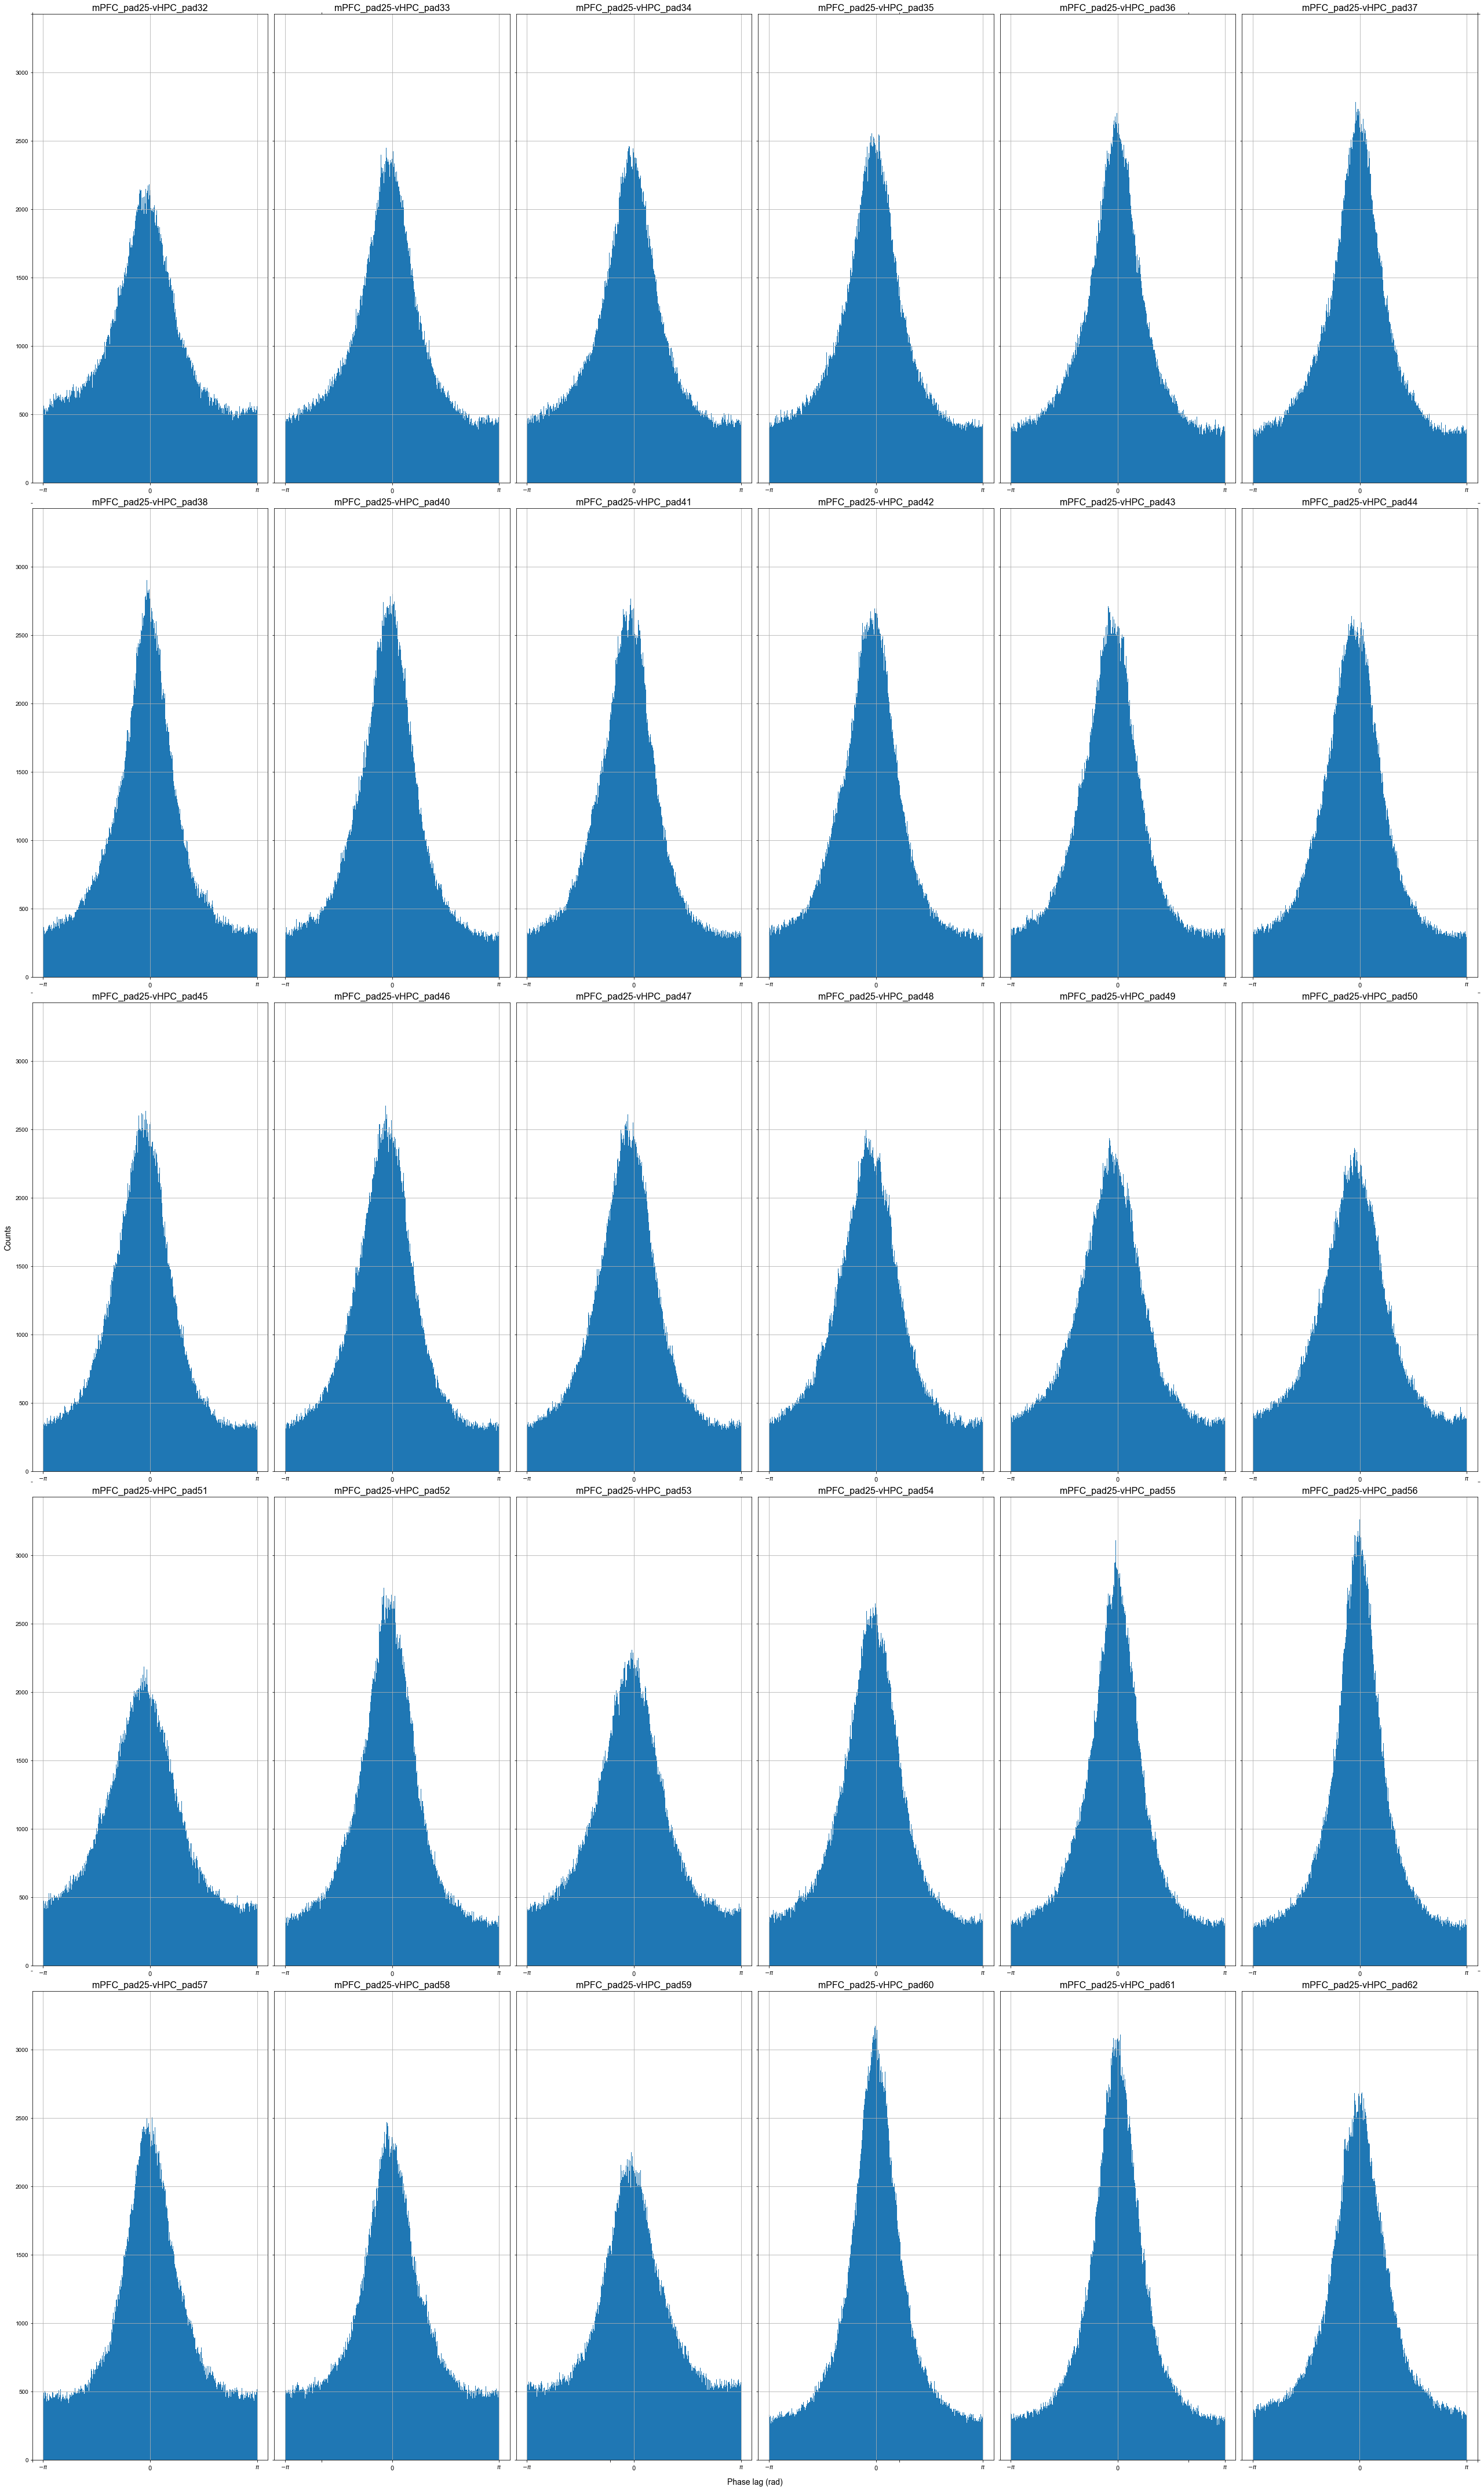

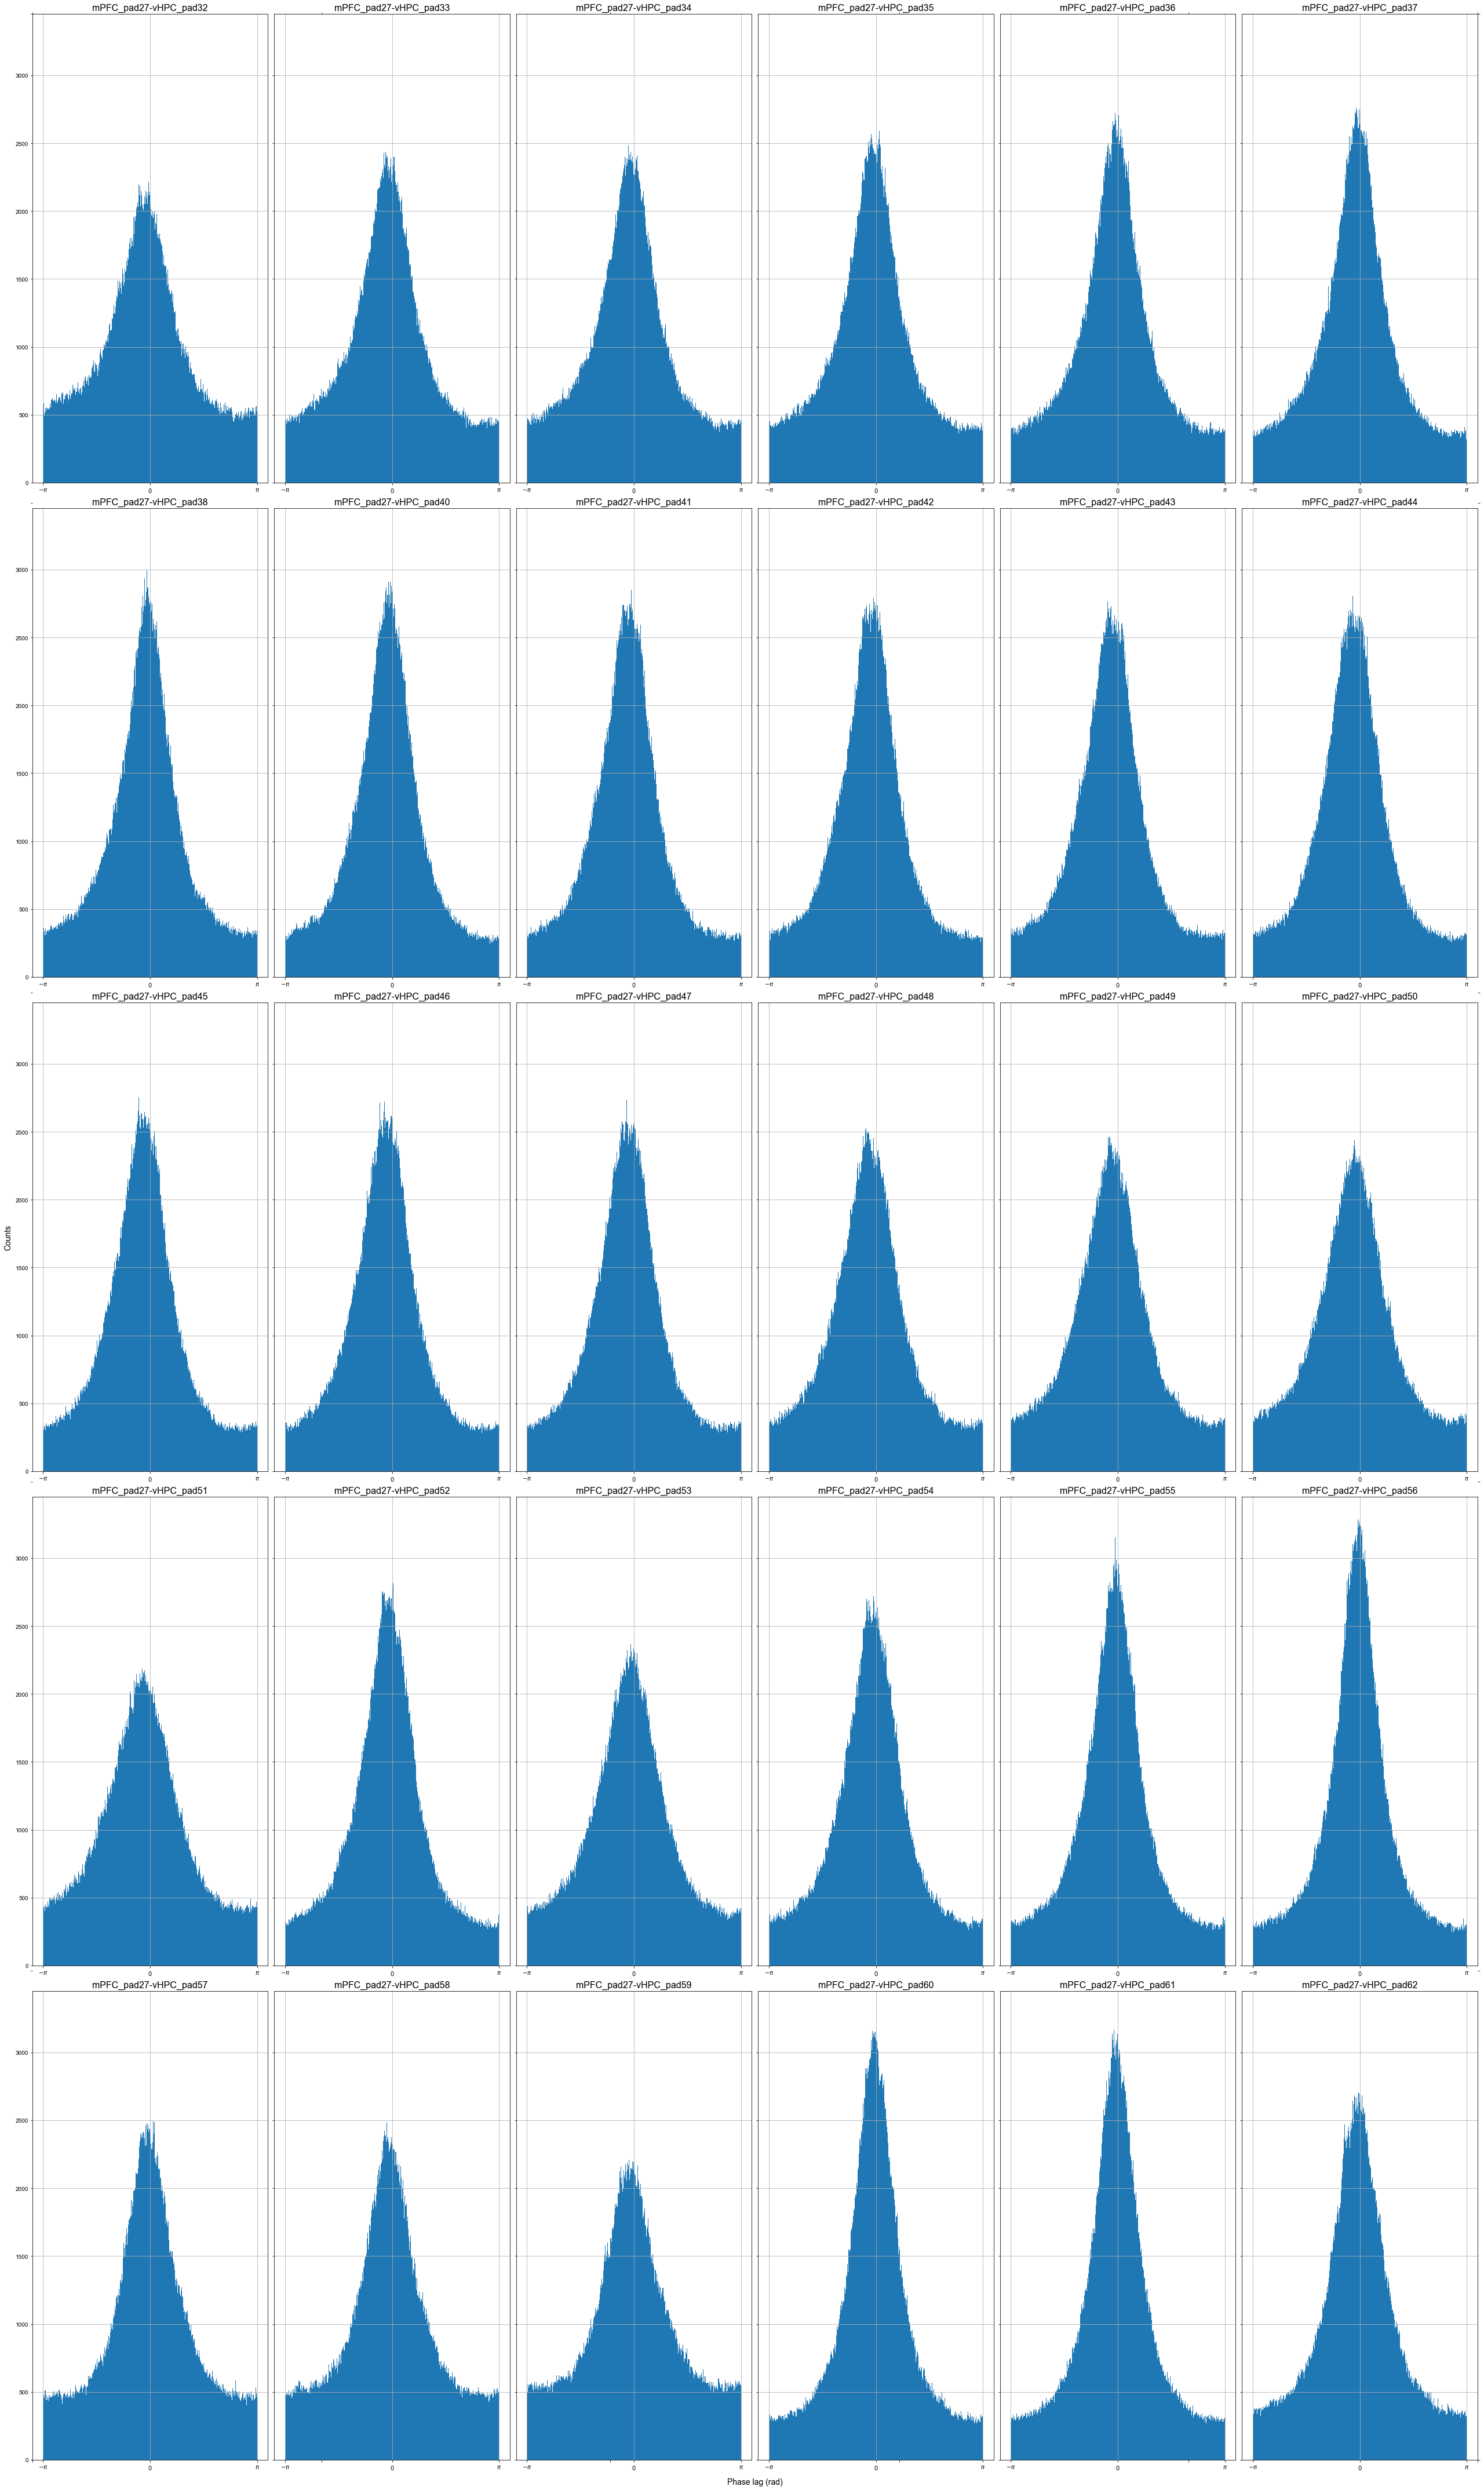

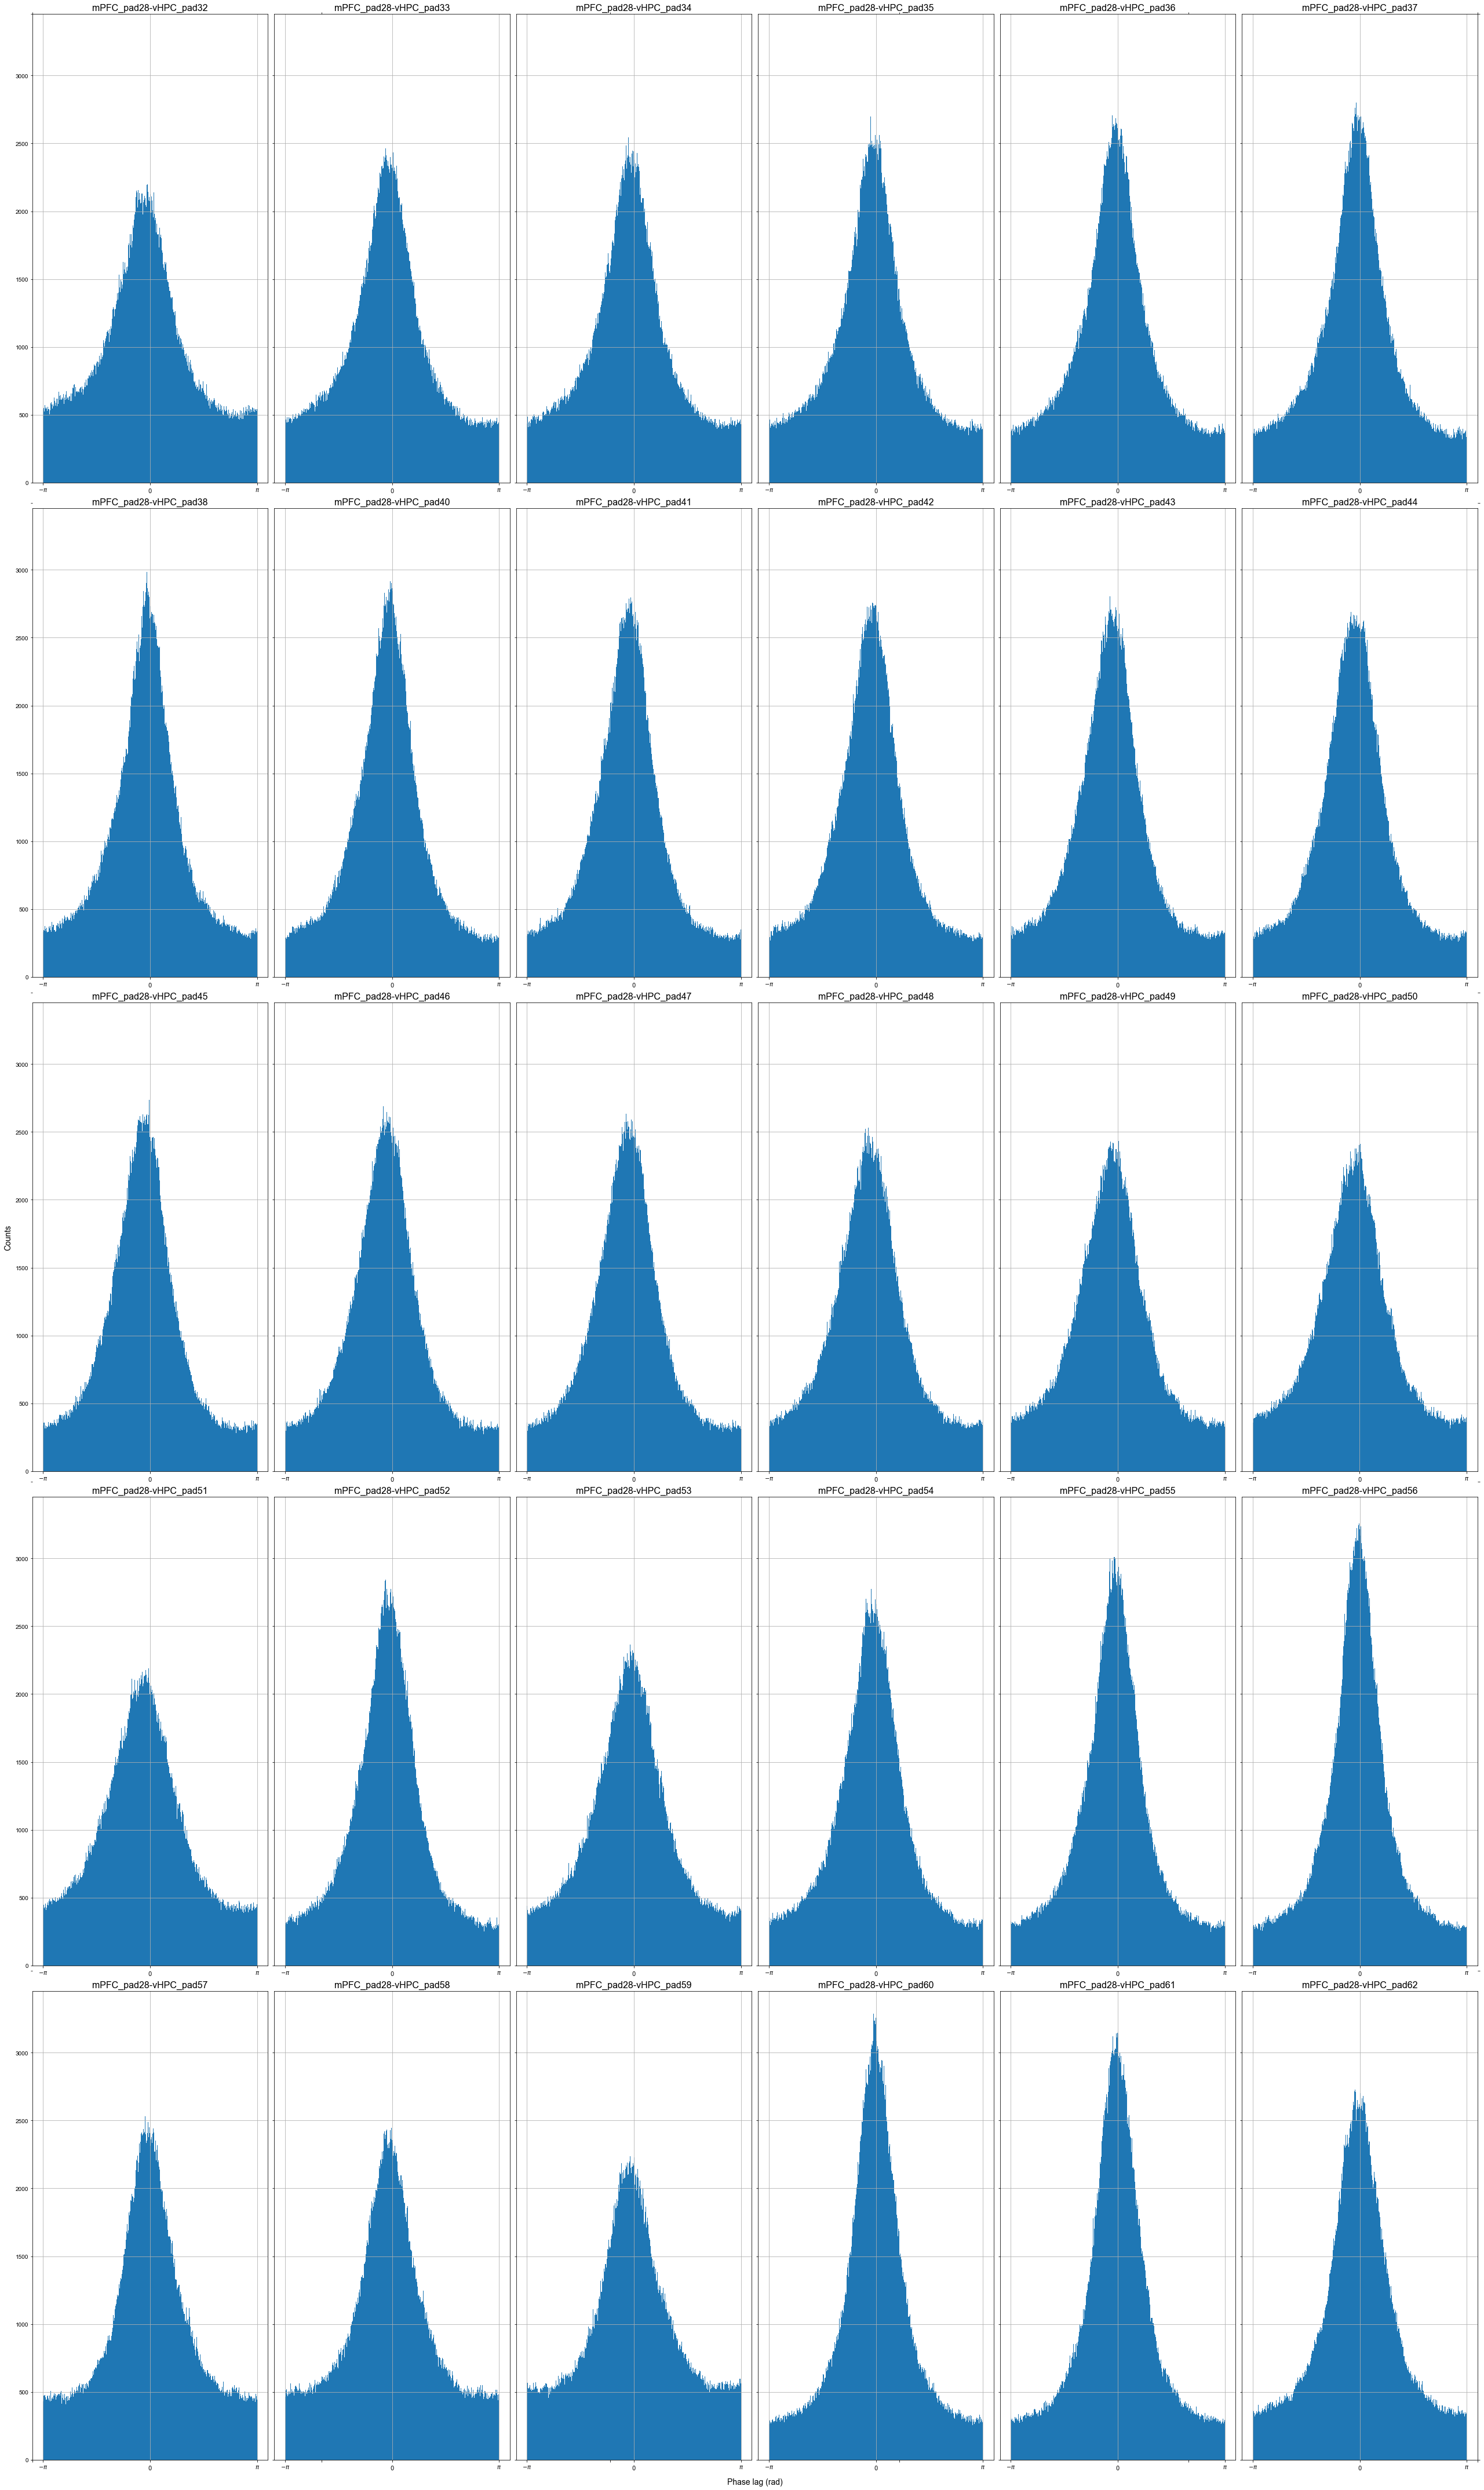

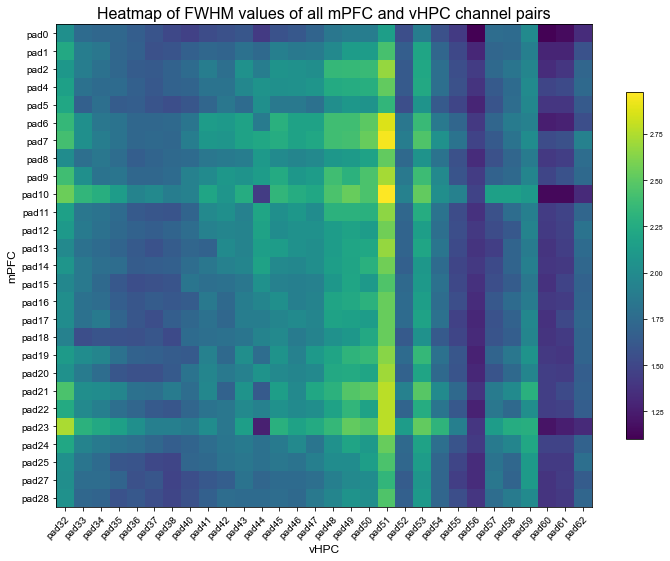

In [5]:
plotting.plot_phase_coh_pairs(dataset, animal, session, savedir='./phase_coh_plots/', band='theta',
                              srate=f_ephys, tstart=behavior_trigger, twin=behavior_window_duration)